# Jupyter Notebook Using Python 3 with code and analysis

## Importing relevant libraries

In [15]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.graphics import tsaplots
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statistics
from matplotlib import pyplot

In [16]:
from math import sqrt

## Importing Dataset

In [17]:
df= pd.read_csv("GlobalLandTemperaturesByCity.csv")

### Peeking at the dataset

In [18]:
df.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

### finding number of instances

In [19]:

df.AverageTemperature.count()

8235082

### finding the min temp recorded

In [20]:

df.loc[df['AverageTemperature'].idxmin()]

dt                               1979-02-01
AverageTemperature                  -42.704
AverageTemperatureUncertainty         0.972
City                                Norilsk
Country                              Russia
Latitude                             69.92N
Longitude                            88.83E
Name: 5308640, dtype: object

#### finding the max temp recorded

In [21]:

df.loc[df['AverageTemperature'].idxmax()]

dt                               1761-07-01
AverageTemperature                   39.651
AverageTemperatureUncertainty         4.316
City                                 Warqla
Country                             Algeria
Latitude                             31.35N
Longitude                             5.65E
Name: 8148236, dtype: object

## checking the datatypes

In [22]:

df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

## conversion to datetime format to allow analysis and maniputlation

In [23]:

df['dt'] = df['dt'].apply(pd.to_datetime)

## checking types again

In [24]:

df.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

## Changing the index to the date

In [25]:
df= df.set_index('dt')

## taking the slice from 1870 onwards because due to the releative industries the progression is more representative

In [26]:

df=df['1870-01-01':]
df

AverageTemperature  AverageTemperatureUncertainty    City  \
dt                                                                      
1870-01-01               0.406                          1.237   Århus   
1870-02-01              -4.221                          1.444   Århus   
1870-03-01               0.457                          0.790   Århus   
1870-04-01               6.420                          0.804   Århus   
1870-05-01              10.416                          0.857   Århus   
1870-06-01              14.141                          1.142   Århus   
1870-07-01              17.131                          0.715   Århus   
1870-08-01              16.565                          0.607   Århus   
1870-09-01              12.147                          0.541   Århus   
1870-10-01               6.830                          0.852   Århus   
1870-11-01               4.259                          1.446   Århus   
1870-12-01              -3.877                          1.372   Århus   
1871-01-01              -3.297                          1.196   Århus   
1871-02-01              -4.222                          1.494   Århus   
1871-03-01               3.519                          1.046   Århus   
1871-04-01               3.855                          0.954   Århus   
1871-05-01               9.349                          0.652   Århus   
1871-06-01              13.926                          0.612   Århus   
1871-07-01              16.482                          0.376   Århus   
1871-08-01              16.713                          0.576   Århus   
1871-09-01              11.562                          0.348   Århus   
1871-10-01               6.688                          0.818   Århus   
1871-11-01               1.037                          0.757   Århus   
1871-12-01              -0.729                          0.866   Århus   
1872-01-01               1.708                          1.812   Århus   
1872-02-01               1.152                          1.366   Århus   
1872-03-01               2.345                          0.685   Århus   
1872-04-01               6.695                          1.487   Århus   
1872-05-01              11.182                          0.605   Århus   
1872-06-01              15.727                          0.807   Århus   
...                        ...                            ...     ...   
2011-04-01              12.554                          0.153  Zwolle   
2011-05-01              14.066                          0.149  Zwolle   
2011-06-01              16.273                          0.267  Zwolle   
2011-07-01              16.020                          0.179  Zwolle   
2011-08-01              16.975                          0.139  Zwolle   
2011-09-01              15.788                          0.109  Zwolle   
2011-10-01              11.337                          0.221  Zwolle   
2011-11-01               6.990                          0.097  Zwolle   
2011-12-01               5.722                          0.261  Zwolle   
2012-01-01               4.348                          0.293  Zwolle   
2012-02-01               0.376                          0.290  Zwolle   
2012-03-01               7.863                          0.135  Zwolle   
2012-04-01               8.101                          0.168  Zwolle   
2012-05-01              14.169                          0.191  Zwolle   
2012-06-01              14.702                          0.342  Zwolle   
2012-07-01              17.329                          0.287  Zwolle   
2012-08-01              18.588                          0.224  Zwolle   
2012-09-01              14.333                          0.207  Zwolle   
2012-10-01              10.358                          0.208  Zwolle   
2012-11-01               6.469                          0.189  Zwolle   
2012-12-01               4.303                          0.341  Zwolle   
2013-01-01               1.479                          0.217  Zwolle 

## identifying whether or not there are any missing values

In [27]:

nan_rows = df[df.isnull().any(1)]
nan_rows.count()

AverageTemperature                   0
AverageTemperatureUncertainty        0
City                             30386
Country                          30386
Latitude                         30386
Longitude                        30386
dtype: int64

## removing the number of missing values because as the target variable is missing we do not require those points

In [28]:

df= df.dropna()

In [29]:
#recheck 
nan_rows.count()

AverageTemperature                   0
AverageTemperatureUncertainty        0
City                             30386
Country                          30386
Latitude                         30386
Longitude                        30386
dtype: int64

In [30]:
df

AverageTemperature  AverageTemperatureUncertainty    City  \
dt                                                                      
1870-01-01               0.406                          1.237   Århus   
1870-02-01              -4.221                          1.444   Århus   
1870-03-01               0.457                          0.790   Århus   
1870-04-01               6.420                          0.804   Århus   
1870-05-01              10.416                          0.857   Århus   
1870-06-01              14.141                          1.142   Århus   
1870-07-01              17.131                          0.715   Århus   
1870-08-01              16.565                          0.607   Århus   
1870-09-01              12.147                          0.541   Århus   
1870-10-01               6.830                          0.852   Århus   
1870-11-01               4.259                          1.446   Århus   
1870-12-01              -3.877                          1.372   Århus   
1871-01-01              -3.297                          1.196   Århus   
1871-02-01              -4.222                          1.494   Århus   
1871-03-01               3.519                          1.046   Århus   
1871-04-01               3.855                          0.954   Århus   
1871-05-01               9.349                          0.652   Århus   
1871-06-01              13.926                          0.612   Århus   
1871-07-01              16.482                          0.376   Århus   
1871-08-01              16.713                          0.576   Århus   
1871-09-01              11.562                          0.348   Århus   
1871-10-01               6.688                          0.818   Århus   
1871-11-01               1.037                          0.757   Århus   
1871-12-01              -0.729                          0.866   Århus   
1872-01-01               1.708                          1.812   Århus   
1872-02-01               1.152                          1.366   Århus   
1872-03-01               2.345                          0.685   Århus   
1872-04-01               6.695                          1.487   Århus   
1872-05-01              11.182                          0.605   Århus   
1872-06-01              15.727                          0.807   Århus   
...                        ...                            ...     ...   
2011-03-01               5.917                          0.167  Zwolle   
2011-04-01              12.554                          0.153  Zwolle   
2011-05-01              14.066                          0.149  Zwolle   
2011-06-01              16.273                          0.267  Zwolle   
2011-07-01              16.020                          0.179  Zwolle   
2011-08-01              16.975                          0.139  Zwolle   
2011-09-01              15.788                          0.109  Zwolle   
2011-10-01              11.337                          0.221  Zwolle   
2011-11-01               6.990                          0.097  Zwolle   
2011-12-01               5.722                          0.261  Zwolle   
2012-01-01               4.348                          0.293  Zwolle   
2012-02-01               0.376                          0.290  Zwolle   
2012-03-01               7.863                          0.135  Zwolle   
2012-04-01               8.101                          0.168  Zwolle   
2012-05-01              14.169                          0.191  Zwolle   
2012-06-01              14.702                          0.342  Zwolle   
2012-07-01              17.329                          0.287  Zwolle   
2012-08-01              18.588                          0.224  Zwolle   
2012-09-01              14.333                          0.207  Zwolle   
2012-10-01              10.358                          0.208  Zwolle   
2012-11-01               6.469                          0.189  Zwolle   
2012-12-01               4.303                          0.341  Zwolle 

## resample the whole dataset to get the yearly trend overall as an observation as a whole

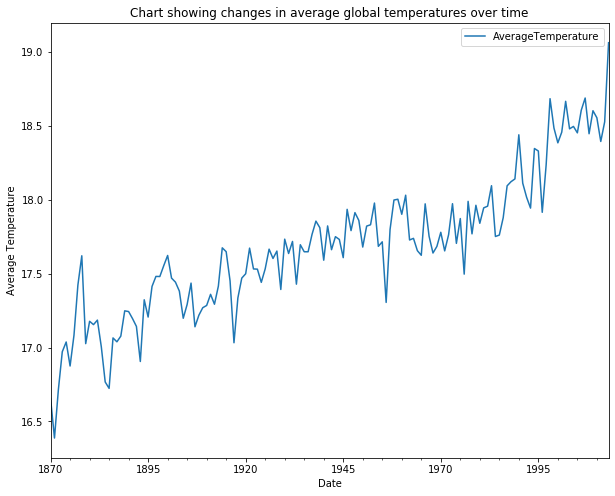

In [809]:

dfres1 = df.resample('AS')
yearly = dfres1.mean()
yearly[['AverageTemperature']].plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Chart showing changes in average global temperatures over time')
plt.savefig("images/averageglobaltemperature.jpeg")
# the line shows no stationarity but confirms linearity

In [807]:
avg1=df.groupby('Country').describe()
avg1.to_csv('averages.csv', index=True)
avg1

AverageTemperature                                \
                                      count       mean        std     min   
Country                                                                     
Afghanistan                         13792.0  13.955107   9.442124  -8.192   
Albania                              5172.0  15.677672   5.874165   3.134   
Algeria                              8620.0  17.916280   7.454535   3.064   
Angola                              10077.0  21.774131   2.648581  14.897   
Argentina                           55168.0  16.993414   5.886464  -1.460   
Armenia                              5172.0   8.609976   8.815962  -9.627   
Australia                           24058.0  16.881409   5.037653   2.720   
Austria                              8620.0   6.430358   7.507559 -12.260   
Azerbaijan                           1724.0  11.352003   8.578227  -5.911   
Bahamas                              1725.0  24.911037   2.826611  17.527   
Bahrain                              1724.0  25.954825   6.976681  12.017   
Bangladesh                          32756.0  25.238165   4.119179  12.275   
Belarus                             13792.0   6.327694   9.069429 -18.537   
Belgium                             12068.0   9.890072   5.906819  -7.720   
Benin                               10014.0  27.003973   1.695216  21.928   
Bolivia                             10344.0  11.412993   3.704791   1.823   
Bosnia And Herzegovina               8620.0  10.584059   7.708446  -8.255   
Botswana                             1719.0  19.035204   4.713080   8.612   
Brazil                             375250.0  22.050661   3.498687   9.591   
Bulgaria                            12068.0  10.749710   7.873460  -9.363   
Burkina Faso                         3364.0  27.875476   1.909471  22.834   
Burma                               34480.0  26.174629   2.726646  15.270   
Burundi                              1642.0  20.818284   0.730758  18.546   
Cambodia                             1724.0  27.013776   1.376817  22.470   
Cameroon                            25140.0  24.649268   2.399517  19.534   
Canada                              43125.0   5.142532  10.404664 -31.825   
Central African Republic             1680.0  24.969851   0.928426  22.785   
Chad                                 3360.0  27.204759   2.018876  22.187   
Chile                               41374.0  11.827599   4.762208  -3.816   
China                              655120.0  12.877897  11.670677 -34.940   
...                                     ...        ...        ...     ...   
South Africa                        85953.0  16.399298   4.293577   4.354   
South Korea                          1724.0  10.797299   9.877916  -8.992   
Spain                               86200.0  14.647317   6.235910  -0.442   
Sri Lanka                           15516.0  26.891334   1.482473  23.628   
Sudan                               16690.0  28.107161   2.933720  18.508   
Suriname                             1716.0  26.511966   0.834809  23.647   
Swaziland                            1719.0  21.243297   3.187855  14.101   
Sweden                               8620.0   5.872664   7.348629 -14.334   
Switzerland                          8620.0   7.694340   6.723399  -9.497   
Syria                               12068.0  18.292320   6.939224   1.086   
Taiwan                              51720.0  21.776785   4.637488  10.475   
Tajikistan                           3448.0   8.950459   9.584292 -12.948   
Tanzania                            25374.0  22.657630   2.342056  15.322   
Thailand                            36204.0  26.847108   1.975952  17.650   
Togo                                 3338.0  26.675892   1.454888  22.200   
Tunisia                              8620.0  18.943203   6.259393   7.084   
Turkey                              87924.0  13.188211   8.148255 -15.353   
Turkmenistan                         5172.0  14.482544  10.577843 -12.376   
Uganda               

In [33]:
df[['Longitude', 'Latitude']]

Longitude Latitude
dt                           
1870-01-01    10.33E   57.05N
1870-02-01    10.33E   57.05N
1870-03-01    10.33E   57.05N
1870-04-01    10.33E   57.05N
1870-05-01    10.33E   57.05N
1870-06-01    10.33E   57.05N
1870-07-01    10.33E   57.05N
1870-08-01    10.33E   57.05N
1870-09-01    10.33E   57.05N
1870-10-01    10.33E   57.05N
1870-11-01    10.33E   57.05N
1870-12-01    10.33E   57.05N
1871-01-01    10.33E   57.05N
1871-02-01    10.33E   57.05N
1871-03-01    10.33E   57.05N
1871-04-01    10.33E   57.05N
1871-05-01    10.33E   57.05N
1871-06-01    10.33E   57.05N
1871-07-01    10.33E   57.05N
1871-08-01    10.33E   57.05N
1871-09-01    10.33E   57.05N
1871-10-01    10.33E   57.05N
1871-11-01    10.33E   57.05N
1871-12-01    10.33E   57.05N
1872-01-01    10.33E   57.05N
1872-02-01    10.33E   57.05N
1872-03-01    10.33E   57.05N
1872-04-01    10.33E   57.05N
1872-05-01    10.33E   57.05N
1872-06-01    10.33E   57.05N
...              ...      ...
2011-03-01     5.26E   52.24N
2011-04-01     5.26E   52.24N
2011-05-01     5.26E   52.24N
2011-06-01     5.26E   52.24N
2011-07-01     5.26E   52.24N
2011-08-01     5.26E   52.24N
2011-09-01     5.26E   52.24N
2011-10-01     5.26E   52.24N
2011-11-01     5.26E   52.24N
2011-12-01     5.26E   52.24N
2012-01-01     5.26E   52.24N
2012-02-01     5.26E   52.24N
2012-03-01     5.26E   52.24N
2012-04-01     5.26E   52.24N
2012-05-01     5.26E   52.24N
2012-06-01     5.26E   52.24N
2012-07-01     5.26E   52.24N
2012-08-01     5.26E   52.24N
2012-09-01     5.26E   52.24N
2012-10-01     5.26E   52.24N
2012-11-01     5.26E   52.24N
2012-12-01     5.26E   52.24N
2013-01-01     5.26E   52.24N
2013-02-01     5.26E   52.24N
2013-03-01     5.26E   52.24N
2013-04-01     5.26E   52.24N
2013-05-01     5.26E   52.24N
2013-06-01     5.26E   52.24N
2013-07-01     5.26E   52.24N
2013-08-01     5.26E   52.24N

[6021067 rows x 2 columns]

## checking correlations

In [34]:

df2=df[['AverageTemperature', 'AverageTemperatureUncertainty','Longitude', 'Latitude']]
df2['Latitude'] = pd.to_numeric(df2['Latitude'].str.replace(r'[N,S]',''))
df2['Longitude'] = pd.to_numeric(df2['Longitude'].str.replace(r'[E,W]',''))


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [35]:
df2

AverageTemperature  AverageTemperatureUncertainty  Longitude  \
dt                                                                         
1870-01-01               0.406                          1.237      10.33   
1870-02-01              -4.221                          1.444      10.33   
1870-03-01               0.457                          0.790      10.33   
1870-04-01               6.420                          0.804      10.33   
1870-05-01              10.416                          0.857      10.33   
1870-06-01              14.141                          1.142      10.33   
1870-07-01              17.131                          0.715      10.33   
1870-08-01              16.565                          0.607      10.33   
1870-09-01              12.147                          0.541      10.33   
1870-10-01               6.830                          0.852      10.33   
1870-11-01               4.259                          1.446      10.33   
1870-12-01              -3.877                          1.372      10.33   
1871-01-01              -3.297                          1.196      10.33   
1871-02-01              -4.222                          1.494      10.33   
1871-03-01               3.519                          1.046      10.33   
1871-04-01               3.855                          0.954      10.33   
1871-05-01               9.349                          0.652      10.33   
1871-06-01              13.926                          0.612      10.33   
1871-07-01              16.482                          0.376      10.33   
1871-08-01              16.713                          0.576      10.33   
1871-09-01              11.562                          0.348      10.33   
1871-10-01               6.688                          0.818      10.33   
1871-11-01               1.037                          0.757      10.33   
1871-12-01              -0.729                          0.866      10.33   
1872-01-01               1.708                          1.812      10.33   
1872-02-01               1.152                          1.366      10.33   
1872-03-01               2.345                          0.685      10.33   
1872-04-01               6.695                          1.487      10.33   
1872-05-01              11.182                          0.605      10.33   
1872-06-01              15.727                          0.807      10.33   
...                        ...                            ...        ...   
2011-03-01               5.917                          0.167       5.26   
2011-04-01              12.554                          0.153       5.26   
2011-05-01              14.066                          0.149       5.26   
2011-06-01              16.273                          0.267       5.26   
2011-07-01              16.020                          0.179       5.26   
2011-08-01              16.975                          0.139       5.26   
2011-09-01              15.788                          0.109       5.26   
2011-10-01              11.337                          0.221       5.26   
2011-11-01               6.990                          0.097       5.26   
2011-12-01               5.722                          0.261       5.26   
2012-01-01               4.348                          0.293       5.26   
2012-02-01               0.376                          0.290       5.26   
2012-03-01               7.863                          0.135       5.26   
2012-04-01               8.101                          0.168       5.26   
2012-05-01              14.169                          0.191       5.26   
2012-06-01              14.702                          0.342       5.26   
2012-07-01              17.329                          0.287       5.26   
2012-08-01              18.588                          0.224       5.26   
2012-09-01              14.333                          0.207       5.26   
2012-10-01              10.358                          0.20

In [36]:
np.corrcoef(df['AverageTemperature'],df2['Latitude'])[1,0]

-0.6686662613391109

In [37]:
np.corrcoef(df['AverageTemperature'],df['AverageTemperatureUncertainty'])[1,0]

-0.06480681362388918

In [38]:
np.corrcoef(df2['Latitude'],df['AverageTemperatureUncertainty'])[1,0]

-0.08995596884590952

In [810]:
np.corrcoef(df['AverageTemperature'],df2['Longitude'])[1,0]

0.07174540425286098

In [811]:
np.corrcoef(df2['Longitude'],df['AverageTemperatureUncertainty'])[1,0]

-0.0052325441137999465

## there is minimal correlation apart from average temperature and latitude however there would be some sort of logical relationship seen because of equatorial climates

## test for multicolinearity

In [41]:

X1 = sm.tools.add_constant(df2)
Series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range (X1.shape[1])], index=X1.columns)  
display(Series_before)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                            32.524739
AverageTemperature                1.869569
AverageTemperatureUncertainty     1.038763
Longitude                         1.035822
Latitude                          1.925990
dtype: float64

## as we can see aside from the constant being generated there is no multicolinearity as defined by 10 or even 5 therefore we can proceed with the multiple linear regression as there are no clear and obvious outliers as observed from the plotted graphs

### addressing the stationarity - it is not required for MLR only multicolinearily and linearity

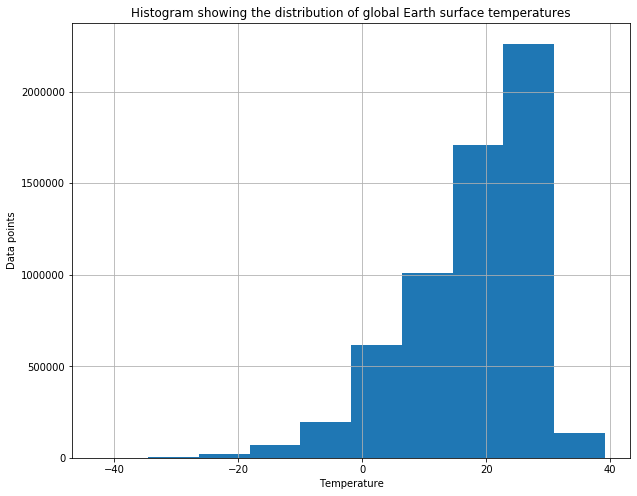

In [814]:
# not quite normally distributed
df['AverageTemperature'].hist()
plt.xlabel('Temperature')
plt.ylabel('Data points')
plt.title('Histogram showing the distribution of global Earth surface temperatures')
plt.savefig("images/averageglobaltemperaturehistogram.jpeg")

## getting all the countries so that we can gauge it based on the continent

In [45]:

df.Country.unique()
#159

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

## assigning countries to their continent as separate dataframes

In [47]:
Africa = df[df['Country'].isin(["Zambia","Nigeria", "Côte D'Ivoire", "Ghana", "Ethiopia", "Morocco", "South Africa",
                      "Egypt", "Algeria", "Madagascar", "Tanzania", "Tunisia", "Benin", "Eritrea", "Cameroon", "Mali", "Congo (Democratic Republic Of The)",
                      "Central African Republic", "Equatorial Guinea", "Mozambique", "Angola", "Somalia", "Guinea Bissau",
                      "Malawi", "Burkina Faso", "Congo", "Gambia", "Burundi", "Zimbabwe", "Guinea", "Senegal", "Kenya",
                      "Sierra Leone", "Botswana", "Uganda", "Dijibouti", "Rwanda", "Togo","Gabon", "Swaziland",
                      "Niger", "Lesotho", "Liberia", "Chad", "Mauritania", "Mauritius", "Namibia", "Reunion"])]

In [48]:
Europe = df[df['Country'].isin(["Denmark", "Spain", "Germany", "Russia", "United Kingdom", "France", "Netherlands",
                                "Portugal", "Italy","Belgium","Romania","Greece", "Moldova", "Switzerland", "Norway",
                                "Poland","Ukraine", "Slovakia","Czech Republic","Hungary","Ireland", "Latvia", "Albania",
                                "Finland","Sweden", "Austria", "Armenia", "Macedonia","Cyprus","Slovenia","Iceland",
                                "Croatia", "Estonia", "Georgia", "Boznia and Herzegovina", "Belarus","Serbia","Bulgaria"])]

In [49]:
South_America = df[df['Country'].isin([ "Venezuela", "Burma", "Brazil", "Ecuador", "Chile", "El Salvador",
                                       "Peru", "Columbia", "Paraguay", "Argentina", "Bolivia", "Guyana", "Uruguay",
                                       "Suriname"])]

In [50]:
North_America = df[df['Country'].isin(["Canada", "United States", "Mexico", "Cuba", "Haiti", "Puerto Rico", "Nicaragua",
                                       "Honduras", "Guatemala", "Jamaica", "Bahamas", "Panama", "Costa Rica"])]

In [51]:
Asia = df[df['Country'].isin(["Turkey", "Kazakhstan", "China", "Iran", "Saudi Arabia", "Japan", "India", "United Arab Emirates",
                              "Yemen", "Indonesia", "Pakistan", "Libya", "Burma","Syria", "Malaysia", "Uzbekistan", "Philippines", "Turkmenistan",
                              "Israel", "Vietnam", "Iraq", "Afghanistan", "Azerbaijan", "Thailand", "Bangladesh", "Lebanon",
                              "Nepal", "Sri Lanka", "Qatar", "Tajikistan", "Jordan", "Sudan", "Bahrain","Cambodia", "Oman",
                              "South Korea", "Hong Kong", "Singapore"])]

In [52]:
Oceania = df[df['Country'].isin(["Australia", "New Zealand", "Papua New Guinea"])]

## conversion of the latitude and longitude

In [54]:
Africa = Africa.drop(['City', 'Country'], axis = 1)
Africa ['Latitude'] = pd.to_numeric(Africa['Latitude'].str.replace(r'[N,S]',''))
Africa['Longitude'] = pd.to_numeric(Africa['Longitude'].str.replace(r'[E,W]',''))

In [55]:
Asia = Asia.drop(['City', 'Country'], axis = 1)
Asia ['Latitude'] = pd.to_numeric(Asia['Latitude'].str.replace(r'[N,S]',''))
Asia['Longitude'] = pd.to_numeric(Asia['Longitude'].str.replace(r'[E,W]',''))

In [56]:
Europe = Europe.drop(['City', 'Country'], axis = 1)
Europe ['Latitude'] = pd.to_numeric(Europe['Latitude'].str.replace(r'[N,S]',''))
Europe['Longitude'] = pd.to_numeric(Europe['Longitude'].str.replace(r'[E,W]',''))

In [57]:
North_America = North_America.drop(['City', 'Country'], axis = 1)
North_America ['Latitude'] = pd.to_numeric(North_America['Latitude'].str.replace(r'[N,S]',''))
North_America['Longitude'] = pd.to_numeric(North_America['Longitude'].str.replace(r'[E,W]',''))

In [58]:
South_America = South_America.drop(['City', 'Country'], axis = 1)
South_America ['Latitude'] = pd.to_numeric(South_America['Latitude'].str.replace(r'[N,S]',''))
South_America['Longitude'] = pd.to_numeric(South_America['Longitude'].str.replace(r'[E,W]',''))

In [59]:
Oceania = Oceania.drop(['City', 'Country'], axis = 1)
Oceania ['Latitude'] = pd.to_numeric(Oceania['Latitude'].str.replace(r'[N,S]',''))
Oceania['Longitude'] = pd.to_numeric(Oceania['Longitude'].str.replace(r'[E,W]',''))

## for the first MLR model the continent with one of the greatest number of countries and greatest variabilities will be used which is therefore Africa a baseline model will be used which uses 30% of data to be kept as testing  the metrics that we will measure are R2, AIC using ordinary least squares method the residuals will be analysed to see the variance

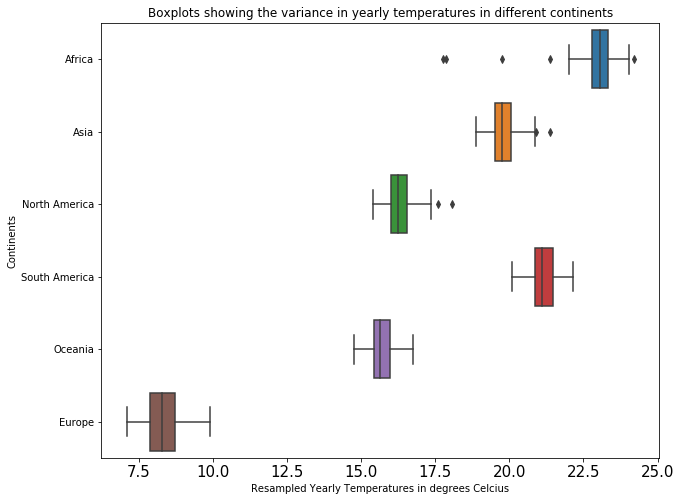

In [967]:
plotting = [resampledAfrica.AverageTemperature, resampledAsia.AverageTemperature, resampledNorth.AverageTemperature, 
           resampledSouth.AverageTemperature, resampledOceania.AverageTemperature, resampledEurope.AverageTemperature]
ax = sns.boxplot(data=plotting, orient='h')
plt.yticks([0, 1, 2, 3,4,5], ['Africa', 'Asia', 'North America', 'South America', 'Oceania', 'Europe'])
plt.rc('xtick', labelsize=8) 

plt.xlabel('Resampled Yearly Temperatures in degrees Celcius')
plt.title('Boxplots showing the variance in yearly temperatures in different continents')
plt.ylabel('Continents')
plt.savefig("images/boxplots.jpeg")

# Generating the MLR model for Africa

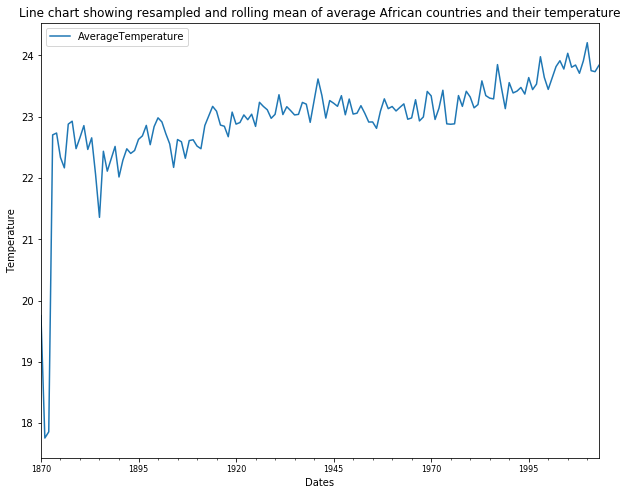

In [1329]:
# resampling to get the yearly average temperature in Africa
Africa_resampled = Africa.resample('AS')
resampledAfrica= Africa_resampled.mean()
resampledAfrica[['AverageTemperature']].plot(kind='line')
plt.ylabel('Temperature')
plt.xlabel('Dates')
plt.title('Line chart showing resampled and rolling mean of average African countries and their temperature')
plt.savefig("images/resampledAfrica.jpeg")

In [1330]:

X= resampledAfrica.drop('AverageTemperature', axis=1)
Y= resampledAfrica[['AverageTemperature']]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3, random_state=1)
regression_model = LinearRegression(fit_intercept=True, normalize=True)
regression_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [1331]:
print('intercept is')
regression_model.intercept_[0]


intercept is


30.364635316150025

In [1332]:
print('coefficients are')
regression_model.coef_[0]

coefficients are


array([-1.08472502, -0.23055679, -0.1757667 ])

## given the longitude and latitude and temp uncertainty we can now estimate the yearly temperature

In [1334]:
#quick prediction
y_predict = regression_model.predict(X_test)
y_predict

array([[23.39538773],
       [23.36144026],
       [23.39343479],
       [22.99972747],
       [23.0770049 ],
       [22.6969452 ],
       [22.79797882],
       [22.7441508 ],
       [23.36696254],
       [23.39232916],
       [22.15729774],
       [22.79175362],
       [23.29173696],
       [23.32696452],
       [23.15190268],
       [22.76425321],
       [23.06280141],
       [23.27754951],
       [22.72069678],
       [23.10027448],
       [22.95787517],
       [22.4913134 ],
       [23.33963617],
       [23.40864329],
       [23.34462265],
       [23.38934617],
       [23.35264971],
       [22.92410241],
       [22.74194976],
       [22.87376208],
       [23.41458692],
       [23.37302184],
       [22.85175727],
       [22.83685873],
       [23.12834345],
       [23.30897981],
       [23.38578825],
       [23.3947868 ],
       [22.81248774],
       [22.80206633],
       [23.25303288],
       [22.88325925],
       [22.89474388],
       [23.41252974]])

In [1335]:
# using the Ordinary Least Squares Method
X2=add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()
est

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


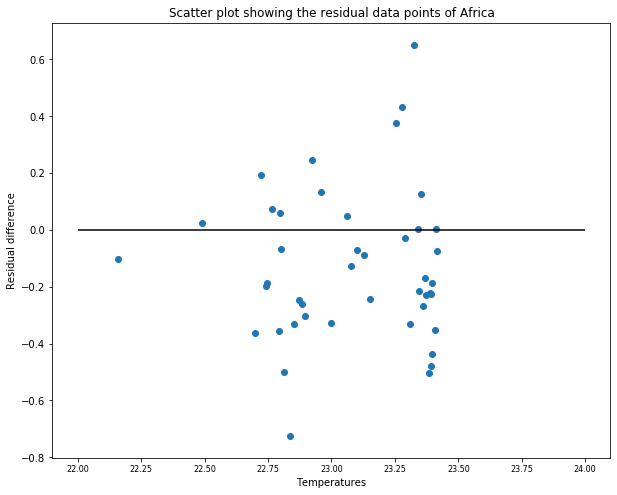

In [1336]:
resid = Y_test - y_predict
resid = pd.Series(resid['AverageTemperature'])
plt.scatter(y_predict, resid)
plt.ylabel('Residual difference')
plt.xlabel('Temperatures')
plt.title('Scatter plot showing the residual data points of Africa')
plt.hlines(0,22,24)
plt.savefig("images/AfricaResidMLR.jpeg")


In [1337]:
white_test = diag.het_white(est.resid,  est.model.exog)
white_test
# white test shows we have to fail to reject the null hypothesis and the variances are equal

(2.211285759383804, 0.987668722685223, 0.23220175279378114, 0.989288505358724)

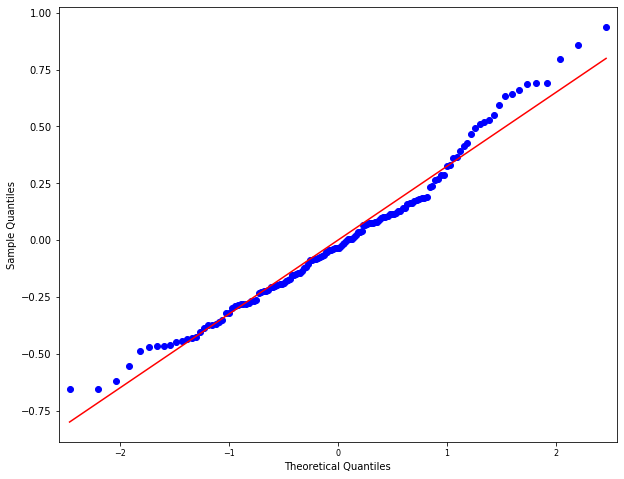

5.445027145217157e-14

In [1338]:
import pylab
sm.qqplot(est.resid, line = 's')
pylab.show()
#shows that the data is relatively normally distributed
mean_resid = sum(est.resid)/len(est.resid)
mean_resid 
# not quite 0 but very close to it due to the errors in play too

In [1339]:
model_mse = mean_squared_error(Y_test, y_predict)
rmse = math.sqrt(model_mse)
rmse

0.29345387015304486

In [1340]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     AverageTemperature   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     245.1
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           1.65e-55
Time:                        21:19:52   Log-Likelihood:                -42.236
No. Observations:                 144   AIC:                             92.47
Df Residuals:                     140   BIC:                             104.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            29.9874      0.569     52.711      0.000      28.863      31.112
AverageTemperatureUncertainty    -1.1024      0.106    -10.391      0.000      -1.312      -0.893
Latitude                         -0.2322      0.020    -11.423      0.000      -0.272      -0.192
Longitude                        -0.1559      0.037     -4.223      0.000      -0.229      -0.083
==============================================================================
Omnibus:                        6.965   Durbin-Watson:                   0.688
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                6.896
Skew:                           0.534   Prob(JB):                       0.0318
Kurtosis:                       3.082   Cond. No.                         496.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

KeyError: 0

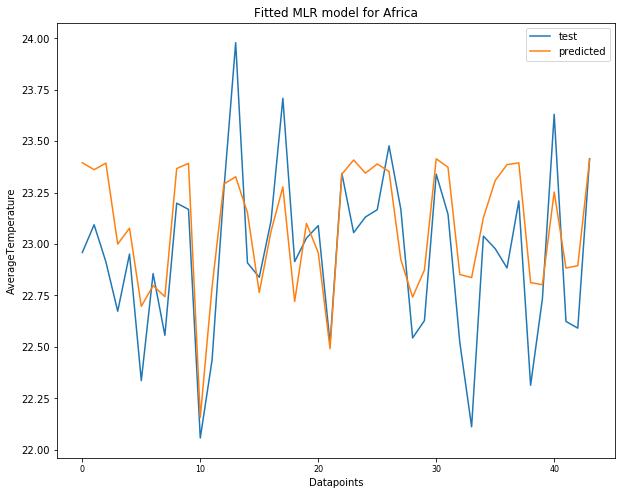

In [1354]:
plt.plot(Y_test.values, label = 'test')
plt.plot(y_predict, label = 'predicted')
plt.title('Fitted MLR model for Africa')
plt.xlabel('Datapoints')
plt.ylabel('AverageTemperature')
plt.legend()
plt.savefig("images/AfricaMLR.jpeg")

### shows that potentially longitude can be removed but the P value is not high enough to suggest there is a significant effect

# MLR for Oceania

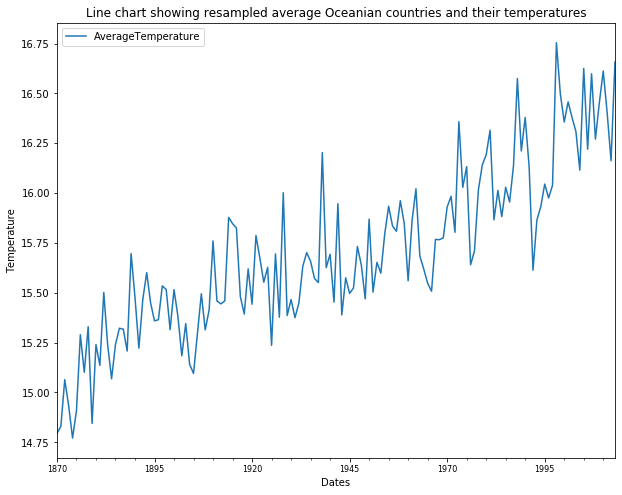

In [1355]:
Oceanian = Oceania.resample('AS')
resampledOceania = Oceanian.mean()
resampledOceania[['AverageTemperature']].plot(kind='line')
plt.ylabel('Temperature')
plt.xlabel('Dates')
plt.title('Line chart showing resampled average Oceanian countries and their temperatures')
plt.savefig("images/resampledOceania.jpeg")

In [1356]:

X= resampledOceania.drop('AverageTemperature', axis=1)
Y= resampledOceania[['AverageTemperature']]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3, random_state=1)
regression_model = LinearRegression(normalize=True)
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [1357]:
print('intercept is')
regression_model.intercept_[0]


intercept is


25.88360946051285

In [1358]:

print('coefficients are')
regression_model.coef_[0]

coefficients are


array([-1.42619696,  0.27314961, -0.1197297 ])

In [1359]:
y_predict = regression_model.predict(X_test)
y_predict
X2=add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


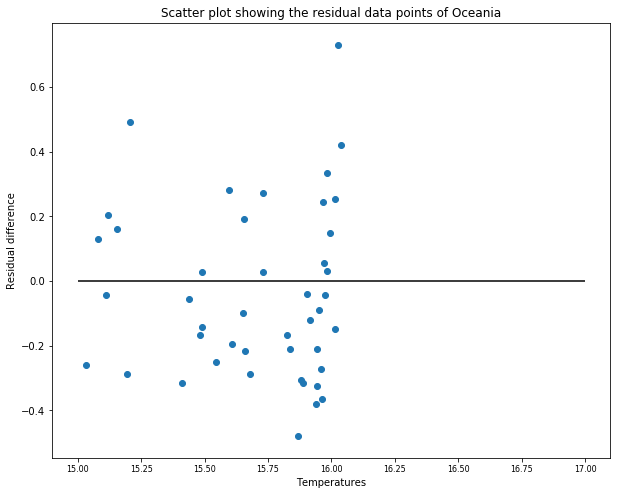

In [1360]:
resid = Y_test - y_predict
resid = pd.Series(resid['AverageTemperature'])
plt.scatter(y_predict, resid)
plt.ylabel('Residual difference')
plt.xlabel('Temperatures')
plt.title('Scatter plot showing the residual data points of Oceania')
plt.hlines(0,15,17)
plt.savefig("images/OceaniaResidMLR.jpeg")



##  majority of the stacked residuals shown give way to errors centred around the 0 therefore a lot of the variation can be explained however there are instances that range very far out. this could be due to the diversity and the vastness of the continent

In [1361]:
_,pval, _, fval = diag.het_white(est.resid,  est.model.exog)
print(pval*100, fval*100)
#p val is over 5 which is the signifcant value

5.123926511000654 4.843148824439896


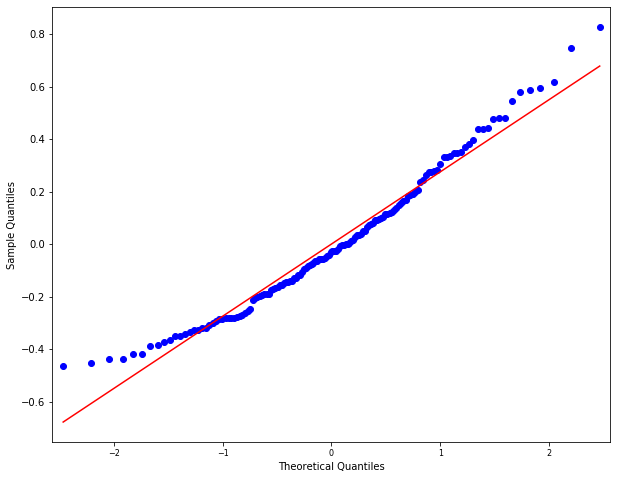

2.9702166652138356e-13

In [1362]:
import pylab
sm.qqplot(est.resid, line = 's')
pylab.show()
#shows that the data is relatively normally distributed
mean_resid = sum(est.resid)/len(est.resid)
mean_resid 

In [1363]:
model_mse = mean_squared_error(Y_test, y_predict)
rmse = math.sqrt(model_mse)
rmse

0.2644152804268192

In [1364]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     AverageTemperature   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     63.18
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           6.84e-26
Time:                        21:28:43   Log-Likelihood:                -18.599
No. Observations:                 144   AIC:                             45.20
Df Residuals:                     140   BIC:                             57.08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            33.3830     11.335      2.945      0.004      10.973      55.793
AverageTemperatureUncertainty    -1.3763      0.132    -10.423      0.000      -1.637      -1.115
Latitude                          0.2777      0.157      1.772      0.079      -0.032       0.587
Longitude                        -0.1688      0.096     -1.750      0.082      -0.360       0.022
==============================================================================
Omnibus:                        7.797   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.182
Skew:                           0.579   Prob(JB):                       0.0167
Kurtosis:                       2.856   Cond. No.                     7.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

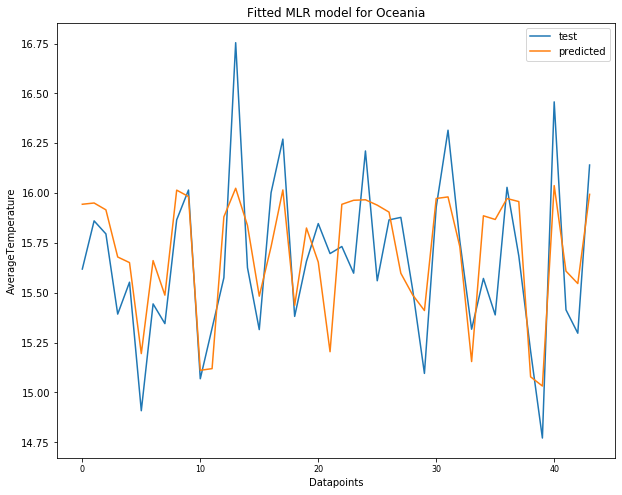

In [1368]:
plt.plot(Y_test.values, label = 'test')

plt.plot(y_predict, label = 'predicted')
plt.title('Fitted MLR model for Oceania')
plt.xlabel('Datapoints')
plt.ylabel('AverageTemperature')
plt.legend()
plt.savefig("images/OceaniaMLR.jpeg")

# MLR tuned model for resampled Asia where tuned 

In [83]:
Asia

AverageTemperature  AverageTemperatureUncertainty  Latitude  \
dt                                                                        
1870-01-01               5.599                          0.786     40.99   
1870-02-01               2.167                          1.350     40.99   
1870-03-01               6.370                          1.107     40.99   
1870-04-01               7.987                          0.964     40.99   
1870-05-01              17.573                          0.949     40.99   
1870-06-01              19.836                          0.588     40.99   
1870-07-01              22.547                          0.624     40.99   
1870-08-01              22.310                          0.600     40.99   
1870-09-01              16.768                          0.868     40.99   
1870-10-01              12.736                          0.889     40.99   
1870-11-01              13.008                          1.316     40.99   
1870-12-01               7.778                          0.792     40.99   
1871-01-01               5.264                          0.967     40.99   
1871-02-01               3.240                          1.192     40.99   
1871-03-01               5.988                          0.998     40.99   
1871-04-01              10.704                          0.728     40.99   
1871-05-01              14.561                          0.977     40.99   
1871-06-01              20.137                          0.969     40.99   
1871-07-01              23.276                          0.616     40.99   
1871-08-01              23.513                          0.654     40.99   
1871-09-01              18.508                          0.429     40.99   
1871-10-01              13.750                          1.008     40.99   
1871-11-01              12.038                          0.833     40.99   
1871-12-01               4.151                          0.757     40.99   
1872-01-01               5.460                          2.096     40.99   
1872-02-01               2.786                          0.719     40.99   
1872-03-01               8.163                          1.259     40.99   
1872-04-01              12.912                          1.990     40.99   
1872-05-01              18.429                          1.291     40.99   
1872-06-01              19.957                          1.273     40.99   
...                        ...                            ...       ...   
2011-03-01              15.692                          0.395     32.95   
2011-04-01              18.913                          0.251     32.95   
2011-05-01              20.464                          1.115     32.95   
2011-06-01              23.883                          0.635     32.95   
2011-07-01              27.118                          0.360     32.95   
2011-08-01              27.640                          0.228     32.95   
2011-09-01              27.305                          0.292     32.95   
2011-10-01              21.709                          0.233     32.95   
2011-11-01              18.997                          0.317     32.95   
2011-12-01              14.346                          0.433     32.95   
2012-01-01              12.369                          0.386     32.95   
2012-02-01              11.158                          0.308     32.95   
2012-03-01              14.635                          0.302     32.95   
2012-04-01              19.457                          0.254     32.95   
2012-05-01              21.483                          0.539     32.95   
2012-06-01              26.065                          0.461     32.95   
2012-07-01              28.370                          0.729     32.95   
2012-08-01              28.845                          1.024     32.95   
2012-09-01              27.248                          0.554     32.95   
2012-10-01              25.194                          0.412     32.95   
2012-11-01              20.637       

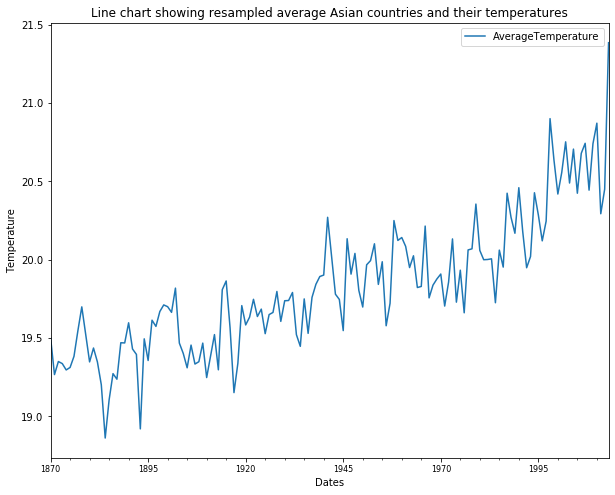

In [1369]:
Asian = Asia.resample('AS')
resampledAsia = Asian.mean()
resampledAsia[['AverageTemperature']].plot(kind='line')
plt.ylabel('Temperature')
plt.xlabel('Dates')
plt.title('Line chart showing resampled average Asian countries and their temperatures')
plt.savefig("images/resampledAsia.jpeg")

In [1370]:
#resampledAsia = resampledAsia.drop('Longitude', axis=1)
X= resampledAsia.drop('AverageTemperature', axis=1)
Y= resampledAsia[['AverageTemperature']]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3, random_state=1)
regression_model = LinearRegression(fit_intercept=True, normalize=True)
regression_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [1371]:
print('intercept is')
regression_model.intercept_[0]


intercept is


15.053893552036314

In [1372]:
print('coefficients are')
regression_model.coef_[0]

coefficients are


array([-1.66401413,  6.23706393, -1.62618983])

In [1373]:
y_predict = regression_model.predict(X_test)
y_predict

array([[20.08183344],
       [20.11207963],
       [20.02651601],
       [19.82474493],
       [19.88337432],
       [19.92583963],
       [19.77440656],
       [19.53216859],
       [20.1288663 ],
       [20.12265001],
       [19.27595175],
       [19.25426145],
       [19.87012103],
       [20.18271889],
       [20.01396242],
       [19.46659142],
       [19.86183284],
       [20.16033949],
       [19.43943814],
       [19.97877453],
       [19.77687697],
       [19.26697959],
       [19.91357661],
       [20.05417344],
       [20.09757012],
       [20.07284176],
       [20.14350883],
       [19.747036  ],
       [19.39196913],
       [19.65317598],
       [20.12207123],
       [20.11598486],
       [19.80856328],
       [19.20384659],
       [19.97768965],
       [19.95444282],
       [20.11511513],
       [20.0775388 ],
       [19.18542974],
       [18.9433967 ],
       [20.13678609],
       [19.78597959],
       [19.66623522],
       [20.13299021]])

In [1374]:
X2=add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


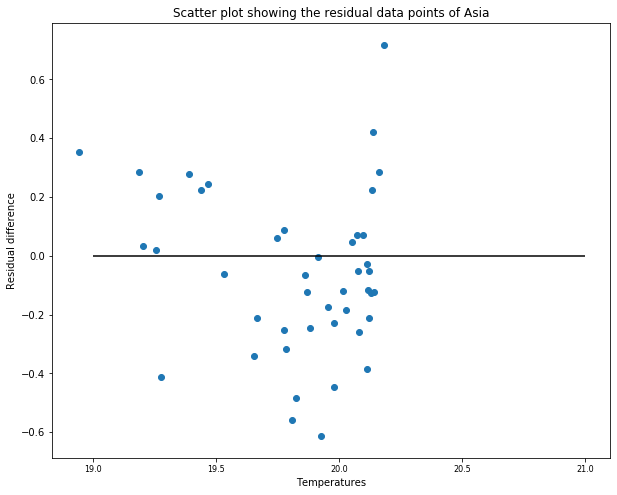

In [1375]:
resid = Y_test - y_predict
resid = pd.Series(resid['AverageTemperature'])
plt.scatter(y_predict, resid)
plt.ylabel('Residual difference')
plt.xlabel('Temperatures')
plt.title('Scatter plot showing the residual data points of Asia')
plt.hlines(0,19,21)
plt.savefig("images/AsiaResidMLR.jpeg")


In [1376]:
_,pval, _, fval = diag.het_white(est.resid,  est.model.exog)
print(pval*100, fval*100)

99.58342469516704 99.64376631777061


## through evidence of whites test we can confirm that there is absence of heteroscedacity

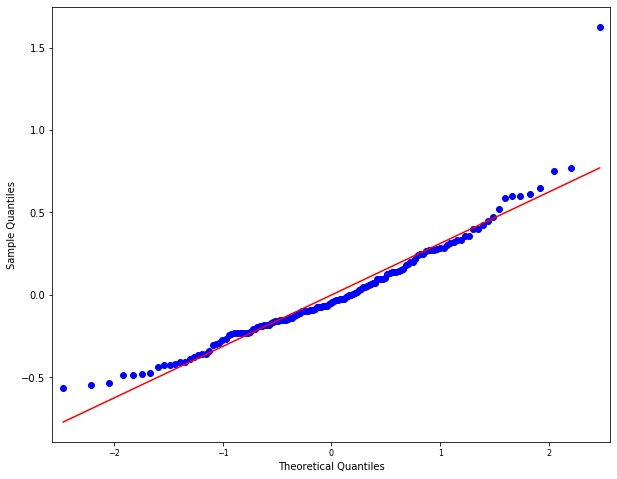

-2.479004655874127e-13

In [1378]:
import pylab
sm.qqplot(est.resid, line = 's')
pylab.show()
#shows that the data is relatively normally distributed
mean_resid = sum(est.resid)/len(est.resid)
mean_resid 

### very good beause it is closer to 0

In [1380]:
model_mse = mean_squared_error(Y_test, y_predict)
rmse = math.sqrt(model_mse)
rmse

0.2791892329586931

In [1381]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     AverageTemperature   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     42.27
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           1.64e-19
Time:                        21:31:03   Log-Likelihood:                -36.977
No. Observations:                 144   AIC:                             81.95
Df Residuals:                     140   BIC:                             93.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.6217     34.086     -0.018      0.985     -68.011      66.767
AverageTemperatureUncertainty    -1.5815      0.153    -10.359      0.000      -1.883      -1.280
Latitude                          5.6125      1.025      5.474      0.000       3.585       7.640
Longitude                        -1.2946      0.412     -3.145      0.002      -2.108      -0.481
==============================================================================
Omnibus:                       45.466   Durbin-Watson:                   0.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.308
Skew:                           1.215   Prob(JB):                     5.06e-29
Kurtosis:                       6.976   Cond. No.                     1.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

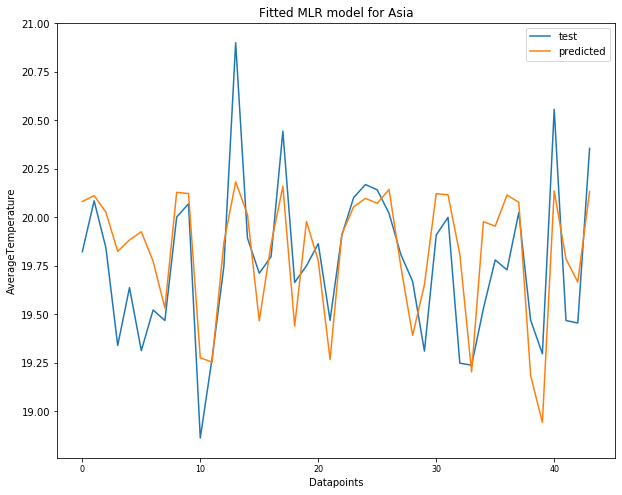

In [1382]:
plt.plot(Y_test.values, label = 'test')
plt.plot(y_predict, label = 'predicted')
plt.title('Fitted MLR model for Asia')
plt.xlabel('Datapoints')
plt.ylabel('AverageTemperature')
plt.legend()
plt.savefig("images/AsiaMLR.jpeg")

# MLR for Europe

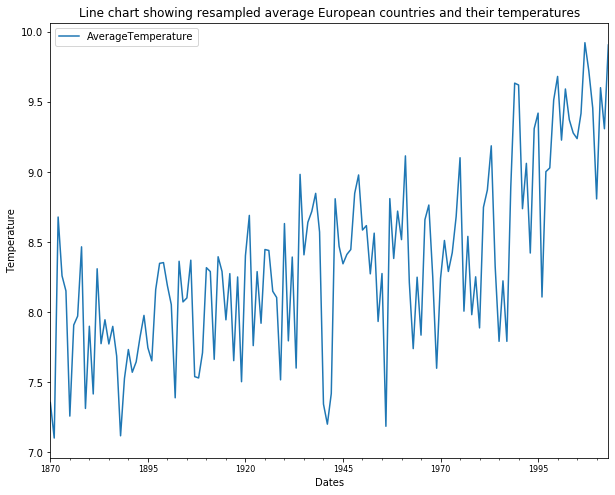

In [1383]:
European = Europe.resample('AS')
resampledEurope = European.mean()
resampledEurope[['AverageTemperature']].plot(kind='line')
plt.ylabel('Temperature')
plt.xlabel('Dates')
plt.title('Line chart showing resampled average European countries and their temperatures')
plt.savefig("images/resampledEurope.jpeg")

In [1384]:
X= resampledEurope.drop('AverageTemperature', axis=1)
Y= resampledEurope[['AverageTemperature']]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3, random_state=1)
regression_model = LinearRegression(fit_intercept=True, normalize=True)
regression_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [1385]:
print('intercept is')
regression_model.intercept_[0]


intercept is


49673226456069.92

In [1386]:
print('coefficients are')
regression_model.coef_[0]

coefficients are


array([-1.36594834e+00, -1.01575378e+12,  3.14318828e+10])

In [1387]:
y_predict = regression_model.predict(X_test)
y_predict

array([[8.5390625],
       [8.5390625],
       [8.484375 ],
       [8.3125   ],
       [8.375    ],
       [7.9453125],
       [8.2890625],
       [8.203125 ],
       [8.6015625],
       [8.5859375],
       [7.984375 ],
       [8.03125  ],
       [8.4609375],
       [8.6171875],
       [8.484375 ],
       [8.2109375],
       [8.4140625],
       [8.625    ],
       [8.1953125],
       [8.421875 ],
       [8.328125 ],
       [8.0625   ],
       [8.4375   ],
       [8.5390625],
       [8.5625   ],
       [8.5234375],
       [8.6015625],
       [8.3046875],
       [8.140625 ],
       [8.2734375],
       [8.5625   ],
       [8.5859375],
       [8.34375  ],
       [8.       ],
       [8.453125 ],
       [8.453125 ],
       [8.5625   ],
       [8.5234375],
       [7.9453125],
       [7.8046875],
       [8.609375 ],
       [8.3125   ],
       [8.296875 ],
       [8.6015625]])

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


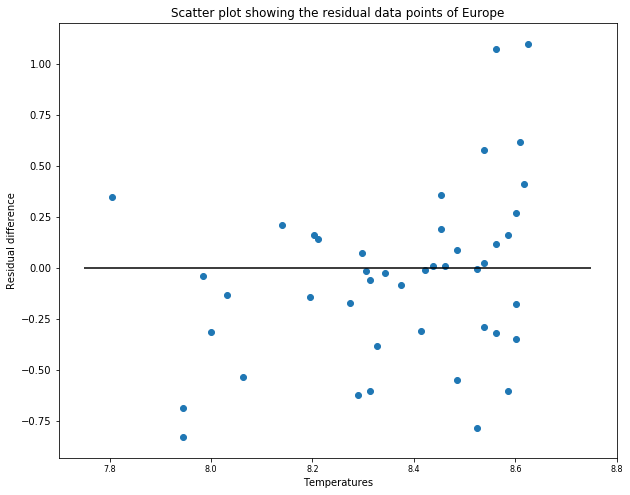

In [1388]:
X2=add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()
resid = Y_test - y_predict
resid = pd.Series(resid['AverageTemperature'])
plt.scatter(y_predict, resid)
plt.hlines(0,7.75,8.75)
plt.ylabel('Residual difference')
plt.xlabel('Temperatures')
plt.title('Scatter plot showing the residual data points of Europe')
plt.savefig("images/EuropeResidMLR.jpeg")

In [1389]:
_,pval, _, fval = diag.het_white(est.resid,  est.model.exog)
print(pval*100, fval*100)

0.022339780513294827 0.01431443190122556


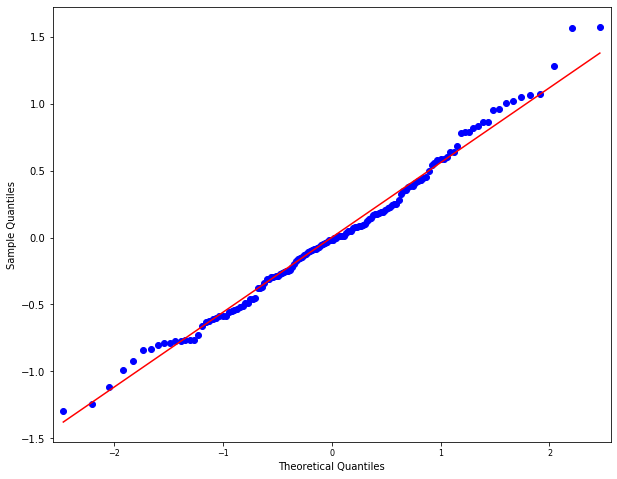

-1.3175263349454428e-12

In [1390]:
sm.qqplot(est.resid, line = 's')
pylab.show()
#shows that the data is relatively normally distributed
mean_resid = sum(est.resid)/len(est.resid)
mean_resid 

In [1391]:
model_mse = mean_squared_error(Y_test, y_predict)
rmse = math.sqrt(model_mse)
rmse

0.42570944427289825

In [1392]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     AverageTemperature   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     22.40
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           3.56e-09
Time:                        21:31:46   Log-Likelihood:                -120.79
No. Observations:                 144   AIC:                             247.6
Df Residuals:                     141   BIC:                             256.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.1283      0.338     -0.379      0.705      -0.797       0.540
AverageTemperatureUncertainty    -1.5263      0.237     -6.438      0.000      -1.995      -1.058
Latitude                         -5.8649     15.486     -0.379      0.705     -36.480      24.750
Longitude                        13.2124     33.832      0.391      0.697     -53.671      80.095
==============================================================================
Omnibus:                        2.428   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                2.281
Skew:                           0.308   Prob(JB):                        0.320
Kurtosis:                       2.964   Cond. No.                     2.08e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.95e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

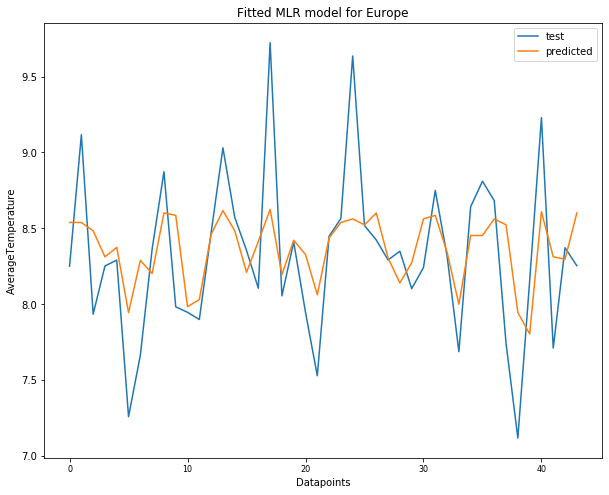

In [1393]:
plt.plot(Y_test.values, label = 'test')
plt.plot(y_predict, label = 'predicted')
plt.title('Fitted MLR model for Europe')
plt.xlabel('Datapoints')
plt.ylabel('AverageTemperature')
plt.legend()
plt.savefig("images/EuropeMLR.jpeg")

# MLR for North America

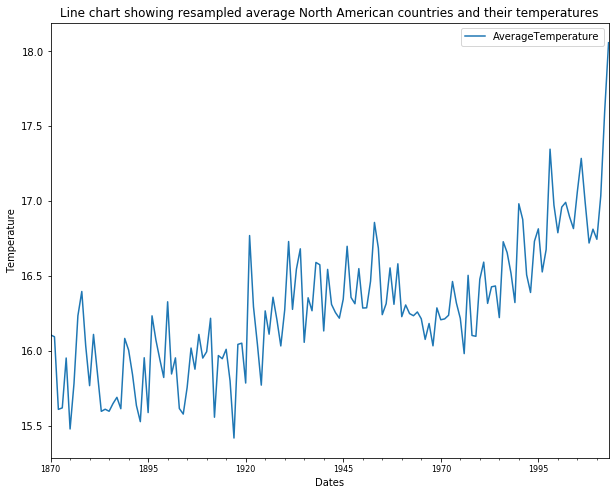

In [1394]:
North_American = North_America.resample('AS')
resampledNorth = North_American.mean()
resampledNorth[['AverageTemperature']].plot(kind='line')
plt.ylabel('Temperature')
plt.xlabel('Dates')
plt.title('Line chart showing resampled average North American countries and their temperatures')
plt.savefig("images/resampledNorthAm.jpeg")

In [1395]:
X= resampledNorth.drop('AverageTemperature', axis=1)
Y= resampledNorth[['AverageTemperature']]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3, random_state=1)
regression_model = LinearRegression(fit_intercept=True, normalize=True)
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [1396]:
print('intercept is')
regression_model.intercept_[0]

intercept is


4798.820313796369

In [1397]:
print('coefficients are')
regression_model.coef_[0]

coefficients are


array([  -0.83990691,  236.84324845, -127.63897476])

In [1398]:
y_predict = regression_model.predict(X_test)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


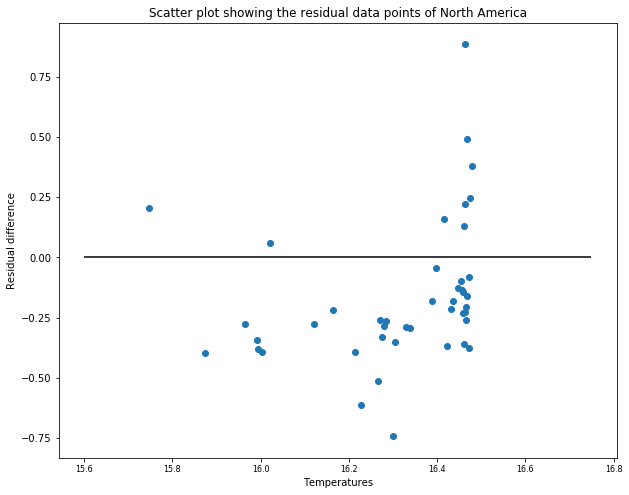

In [1399]:
X2=add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()
resid = Y_test - y_predict
resid = pd.Series(resid['AverageTemperature'])
plt.scatter(y_predict, resid)
plt.hlines(0,15.6,16.75)
plt.ylabel('Residual difference')
plt.xlabel('Temperatures')
plt.title('Scatter plot showing the residual data points of North America')
plt.savefig("images/NorthAmResidMLR.jpeg")

In [1400]:
_,pval, _, fval = diag.het_white(est.resid,  est.model.exog)
print(pval*100, fval*100)

65.48571792483145 66.644943256195


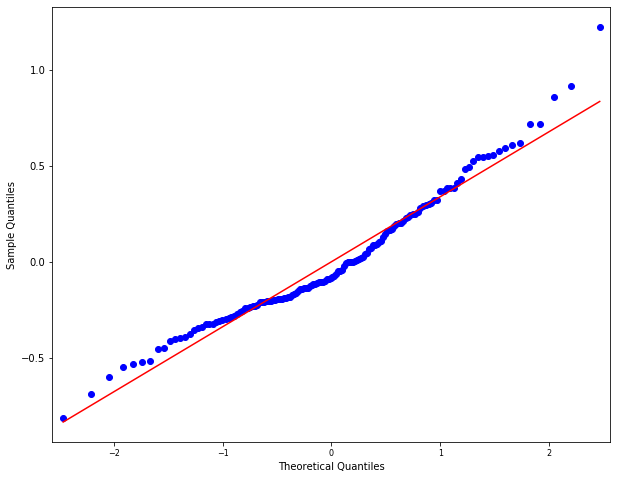

2.7112065678933404e-11

In [1401]:
sm.qqplot(est.resid, line = 's')
pylab.show()
#shows that the data is relatively normally distributed
mean_resid = sum(est.resid)/len(est.resid)
mean_resid 

In [1402]:
model_mse = mean_squared_error(Y_test, y_predict)
rmse = math.sqrt(model_mse)
rmse

0.3348766227248591

In [1403]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     AverageTemperature   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     32.45
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           5.49e-16
Time:                        21:32:30   Log-Likelihood:                -48.892
No. Observations:                 144   AIC:                             105.8
Df Residuals:                     140   BIC:                             117.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          5086.5542   1056.006      4.817      0.000    2998.773    7174.335
AverageTemperatureUncertainty    -0.9357      0.115     -8.102      0.000      -1.164      -0.707
Latitude                        242.2600     47.245      5.128      0.000     148.855     335.665
Longitude                      -132.4080     26.080     -5.077      0.000    -183.970     -80.846
==============================================================================
Omnibus:                       12.374   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.967
Skew:                           0.669   Prob(JB):                      0.00153
Kurtosis:                       3.609   Cond. No.                     3.74e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

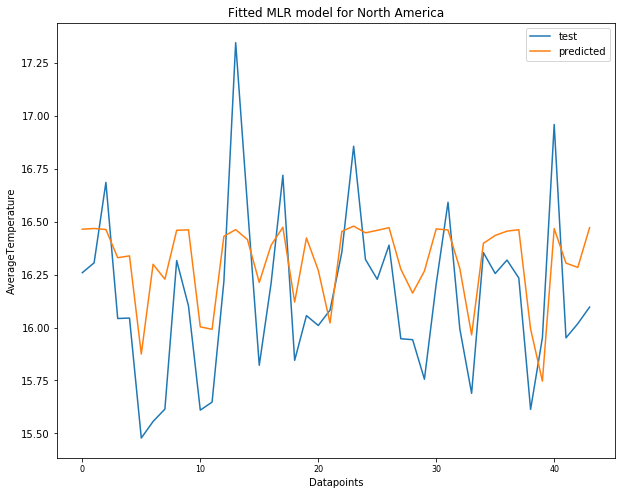

In [1404]:
plt.plot(Y_test.values, label = 'test')
plt.plot(y_predict, label = 'predicted')
plt.title('Fitted MLR model for North America')
plt.xlabel('Datapoints')
plt.ylabel('AverageTemperature')
plt.legend()
plt.savefig("images/NorthAMMLR.jpeg")

# MLR for South America

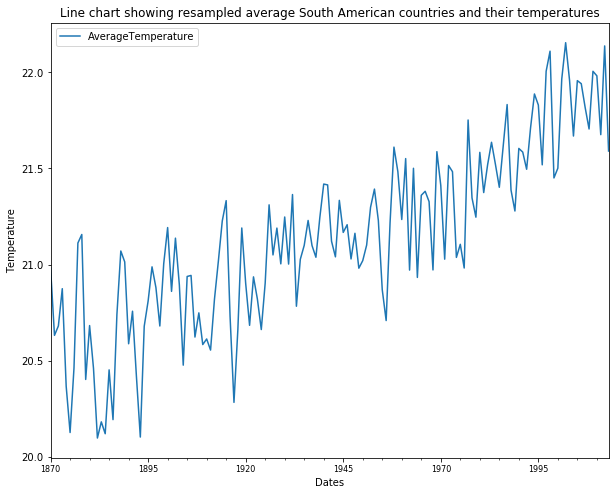

In [1405]:
South_American = South_America.resample('AS')
resampledSouth = South_American.mean()
resampledSouth[['AverageTemperature']].plot(kind='line')
plt.ylabel('Temperature')
plt.xlabel('Dates')
plt.title('Line chart showing resampled average South American countries and their temperatures')
plt.savefig("images/resampledSouthAm.jpeg")

In [1406]:
X= resampledSouth.drop('AverageTemperature', axis=1)
Y= resampledSouth[['AverageTemperature']]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3, random_state=1)
regression_model = LinearRegression(fit_intercept=True, normalize=True)
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [1407]:
print('coefficients are')
regression_model.coef_[0]

coefficients are


array([-1.53583682,  0.25276317, -0.2377984 ])

In [1408]:
print('intercept is')
regression_model.intercept_[0]


intercept is


30.995693604808185

In [1409]:
y_predict = regression_model.predict(X_test)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


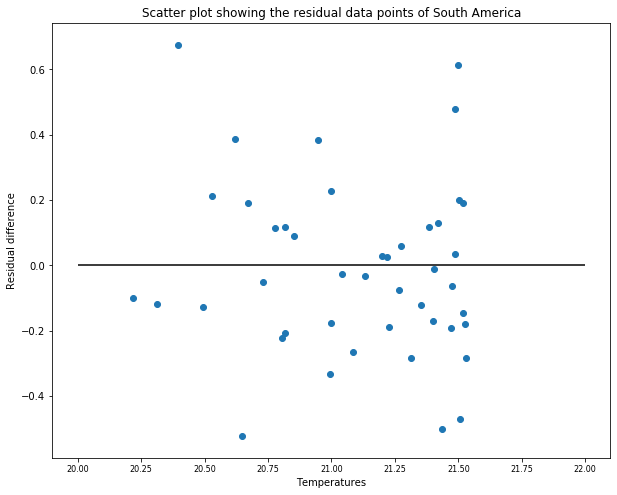

In [1410]:
X2=add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()
resid = Y_test - y_predict
resid = pd.Series(resid['AverageTemperature'])
plt.scatter(y_predict, resid)
plt.hlines(0,20,22)
plt.ylabel('Residual difference')
plt.xlabel('Temperatures')
plt.title('Scatter plot showing the residual data points of South America')
plt.savefig("images/SouthAmResidMLR.jpeg")

In [1411]:
_,pval, _, fval = diag.het_white(est.resid,  est.model.exog)
print(pval*100, fval*100)

31.43253861578322 32.1465475705483


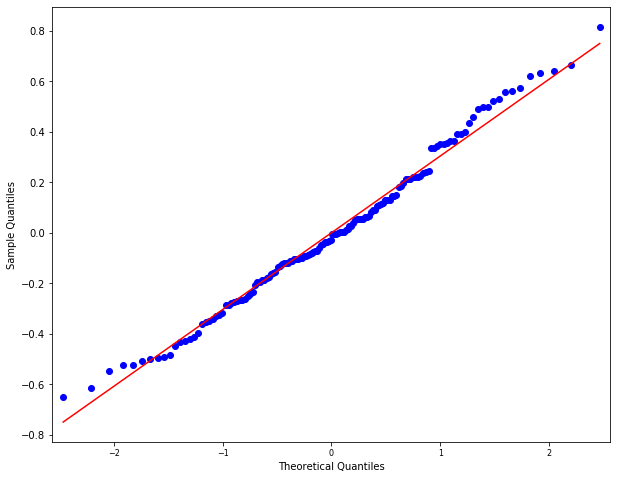

7.944262531762231e-14

In [1412]:
sm.qqplot(est.resid, line = 's')
pylab.show()
#shows that the data is relatively normally distributed
mean_resid = sum(est.resid)/len(est.resid)
mean_resid 

In [1413]:
model_mse = mean_squared_error(Y_test, y_predict)
rmse = math.sqrt(model_mse)
rmse

0.26412479040915504

In [1414]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     AverageTemperature   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     62.86
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           8.36e-26
Time:                        21:33:06   Log-Likelihood:                -33.046
No. Observations:                 144   AIC:                             74.09
Df Residuals:                     140   BIC:                             85.97
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            35.4661      8.328      4.259      0.000      19.001      51.931
AverageTemperatureUncertainty    -1.4253      0.142    -10.057      0.000      -1.706      -1.145
Latitude                          0.1697      0.102      1.659      0.099      -0.032       0.372
Longitude                        -0.2888      0.121     -2.378      0.019      -0.529      -0.049
==============================================================================
Omnibus:                        2.334   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.311   Jarque-Bera (JB):                2.338
Skew:                           0.262   Prob(JB):                        0.311
Kurtosis:                       2.660   Cond. No.                     1.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

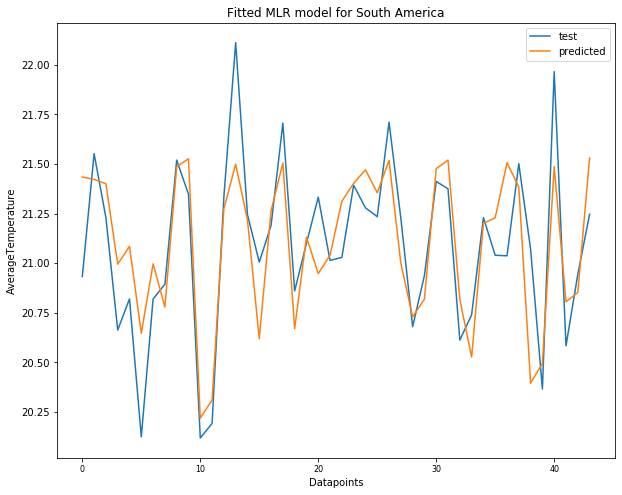

In [1415]:
plt.plot(Y_test.values, label = 'test')
plt.plot(y_predict, label = 'predicted')
plt.title('Fitted MLR model for South America')
plt.xlabel('Datapoints')
plt.ylabel('AverageTemperature')
plt.legend()
plt.savefig("images/SouthAMMLR.jpeg")

## Percentage changes in temperature over time:

In [1323]:
tempchangeAf = resampledAfrica.AverageTemperature[143]/resampledAfrica.AverageTemperature[0]
print('Temperature change for Africa :', (tempchangeAf-1)*100, '%') 

Temperature change for Africa : 2.1390810801318105 %


In [1324]:
tempchangeO = resampledOceania.AverageTemperature[143]/resampledOceania.AverageTemperature[0]
print('Temperature change for Oceania :', (tempchangeO-1)*100, '%') 

Temperature change for Oceania : 4.5675662656589955 %


In [1325]:
tempchangeE = resampledEurope.AverageTemperature[143]/resampledEurope.AverageTemperature[0]
print('Temperature change for Europe :', (tempchangeE-1)*100, '%') 

Temperature change for Europe : 20.218823928386787 %


In [1326]:
tempchangeA = resampledAsia.AverageTemperature[143]/resampledAsia.AverageTemperature[0]
print('Temperature change for Asia :', (tempchangeA-1)*100, '%') 

Temperature change for Asia : 7.412872812484039 %


In [1327]:
tempchangeN = resampledNorth.AverageTemperature[143]/resampledNorth.AverageTemperature[0]
print('Temperature change for North America :', (tempchangeN-1)*100, '%') 

Temperature change for North America : 11.417077549055211 %


In [1328]:

tempchangeS = resampledSouth.AverageTemperature[143]/resampledSouth.AverageTemperature[0]
print('Temperature change for South America :', (tempchangeS-1)*100, '%') 

Temperature change for South America : 0.8371804328241028 %


# ARIMA MODELS

## ARIMA for Africa

## do not need to decompose it because there is unlikely to be much seasonality within the years predicted need to remove non-stationarity we will look 1870 - 2013 is our gap so we will again take the last 30% as test so 43 to test and 100 to train 

# Using differenced Rolling Average Values for Africa due to stationarity

In [681]:
# Africa

# first collect the rolling mean information that is required to smooth
# then get the data which will have to be differenced to form the stationary set
# using the adfuller test determine if the value meets the criteria of being below the 5% critical values
# plot the Acf for the MA term and the PAcf for the AR term
# the d term can be ignored because we have already differenced the data
# plot the whole lot of data that is being observed to see whether there are any problems with the AIC, BIC and
# check if the significance values are under 5% for the P value
# observe the residuals and check its distribution


dt
1870-01-01   NaN
1871-01-01   NaN
1872-01-01   NaN
1873-01-01   NaN
1874-01-01   NaN
Freq: AS-JAN, Name: AverageTemperature, dtype: float64


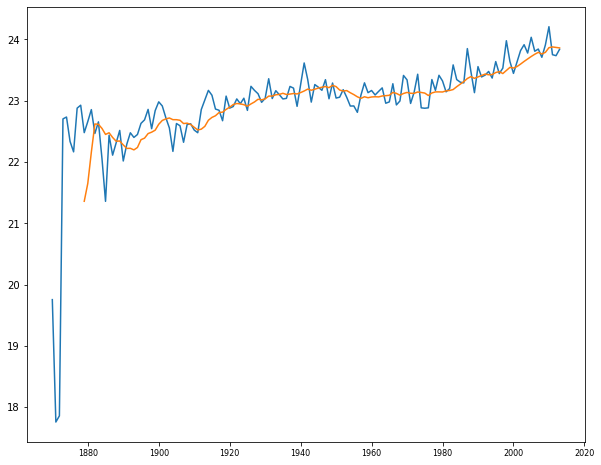

In [1416]:
rolling = Africatemp.rolling(window=10)
rolling_mean = rolling.mean()
print(rolling_mean.head(5))
# plot original and transformed dataset
plt.plot(Africatemp)
plt.plot(rolling_mean)
plt.show()

In [683]:
rolling_mean_diff = rolling_mean.diff(periods=1)




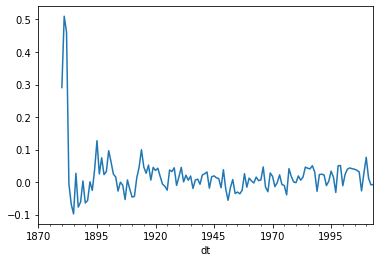

In [684]:
rolling_mean_diff.plot()






In [1131]:
rolling_mean_diff.dropna(inplace=True)
result = adfuller(rolling_mean_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.596590
p-value: 0.000131
Critical Values:
	1%: -3.486
	5%: -2.886
	10%: -2.580


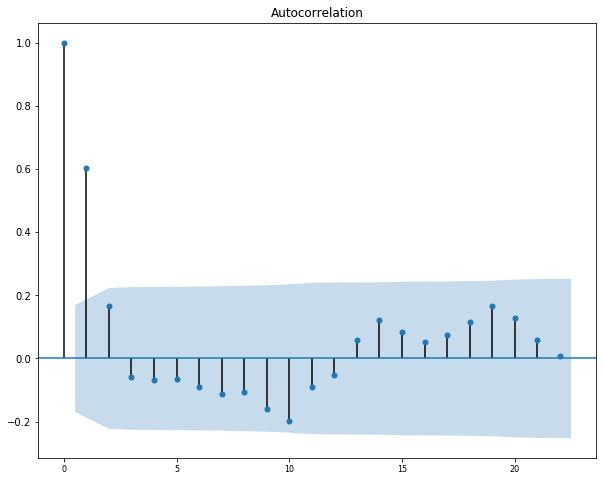

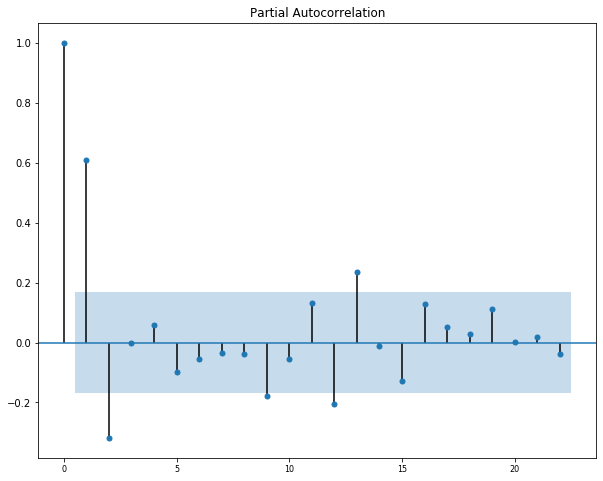

In [1132]:
plot_acf(rolling_mean_diff)
plot_pacf(rolling_mean_diff)
plt.show()

## because of the rolling mean introduced of 10 years this means 10 years of data will be missing from the original data, therefore 30% of the dataset for testing will be from the year 1973 onwards

                              ARMA Model Results                              
Dep. Variable:     AverageTemperature   No. Observations:                   93
Model:                     ARMA(1, 1)   Log Likelihood                 127.451
Method:                       css-mle   S.D. of innovations              0.061
Date:                Thu, 19 Sep 2019   AIC                           -246.901
Time:                        22:46:45   BIC                           -236.771
Sample:                    01-01-1880   HQIC                          -242.811
                         - 01-01-1972                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0215      0.017      1.288      0.201      -0.011       0.054
ar.L1.AverageTemperature     0.4987      0.129      3.861      0.000       0.246       0.

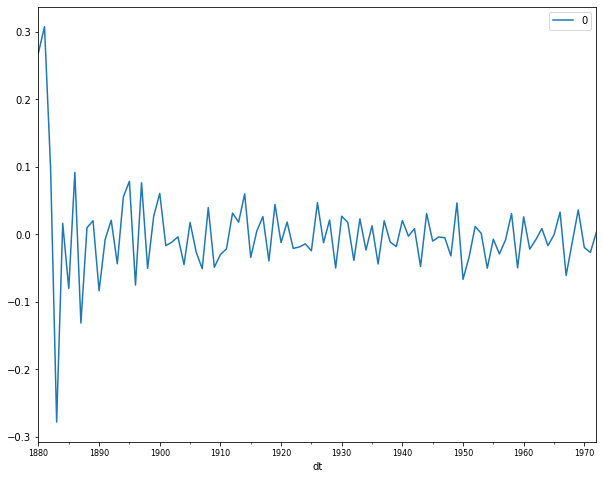

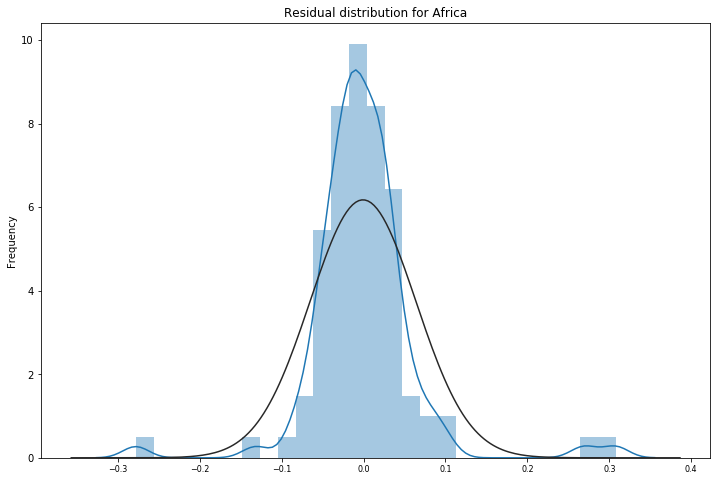

In [1133]:


ARIMA1model = ARIMA(rolling_mean_diff[:'1972'], order=(1,0,1)).fit()
print(ARIMA1model.summary())
resid = ARIMA1model.resid
print(normaltest(resid))

res=DataFrame(ARIMA1model.resid)
res.plot()

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0)


plt.ylabel('Frequency')
plt.title('Residual distribution for Africa')
plt.savefig("images/AFRICAARIMA.jpeg")

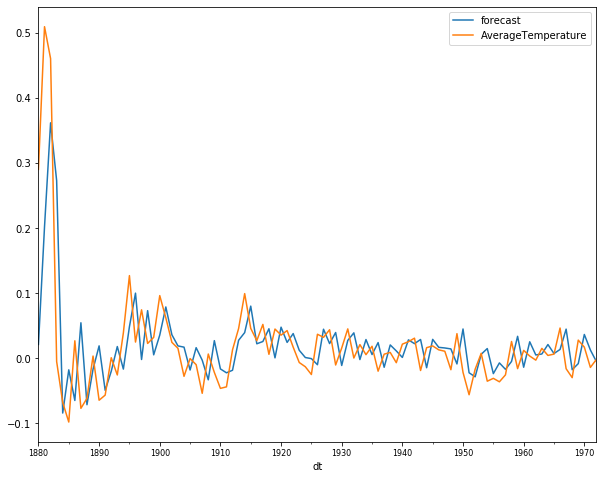

In [1134]:
ARIMA1model.plot_predict(dynamic=False)
plt.show()

In [1135]:
X = rolling_mean_diff.values
training = X[0:92]
train = X[0:92]
test = X[93:]



def StartARIMAForecasting(train, P, D, Q):
    model = ARIMA(train, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction
Actual = [x for x in train]
Predictions = list()
trained = list()
forecasted = list()


for timepoint in range(len(test)):
    ActualValue =  test[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 1,0,1)    
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)
    trained = np.append(train,Predictions)
    forecast=np.empty(89)
    forecast.fill(np.nan)
    forecas = np.append(forecast, Predictions)
    
  
    
    
#Print MSE to see how good the model is



Actual=0.022265, Predicted=-0.005075
Actual=-0.007518, Predicted=0.031181
Actual=-0.010338, Predicted=-0.005717
Actual=-0.039323, Predicted=0.003864
Actual=0.041365, Predicted=-0.023773
Actual=0.017275, Predicted=0.051972
Actual=0.000268, Predicted=0.008385
Actual=-0.001752, Predicted=0.007845
Actual=0.018941, Predicted=0.006216
Actual=0.005992, Predicted=0.023673
Actual=0.015241, Predicted=0.007540
Actual=0.046106, Predicted=0.020121
Actual=0.042585, Predicted=0.041588
Actual=0.040689, Predicted=0.032082
Actual=0.050527, Predicted=0.033611
Actual=0.030837, Predicted=0.041355
Actual=-0.028352, Predicted=0.022827
Actual=0.023370, Predicted=-0.020137
Actual=0.024294, Predicted=0.035694
Actual=0.021884, Predicted=0.019041
Actual=-0.010699, Predicted=0.022251
Actual=0.002475, Predicted=-0.005365
Actual=0.033569, Predicted=0.013833
Actual=0.015198, Predicted=0.033197
Actual=-0.031845, Predicted=0.012220
Actual=0.050195, Predicted=-0.019703
Actual=0.050930, Predicted=0.056825
Actual=-0.01104

In [1136]:
from math import sqrt

In [1137]:
mse = mean_squared_error(test, Predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.030090


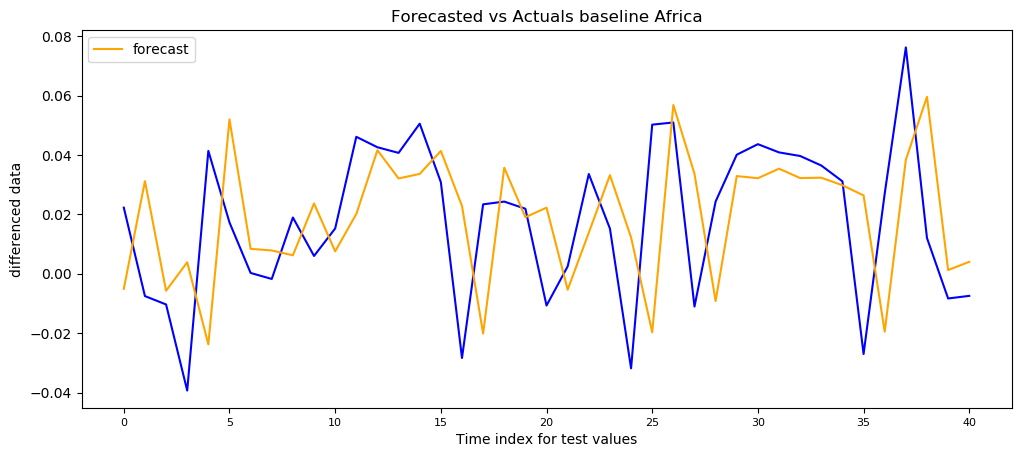

Test RMSE: 0.030


In [1138]:
X = rolling_mean_diff.values


history = [x for x in train]
predictions = list()

for t in range(len(test)):
# fit model
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])

plt.figure(figsize=(12,5), dpi=100)
p1= plt.plot(test, color = 'blue')
p2= plt.plot(predictions, color='orange')
plt.title("Forecasted vs Actuals baseline Africa")
plt.xlabel("Time index for test values")
plt.ylabel("differenced data")
plt.legend(( p2), ['forecast'])

plt.show()

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: overflow encountered in square
  Z_mat, R_mat, T_mat)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-pack

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


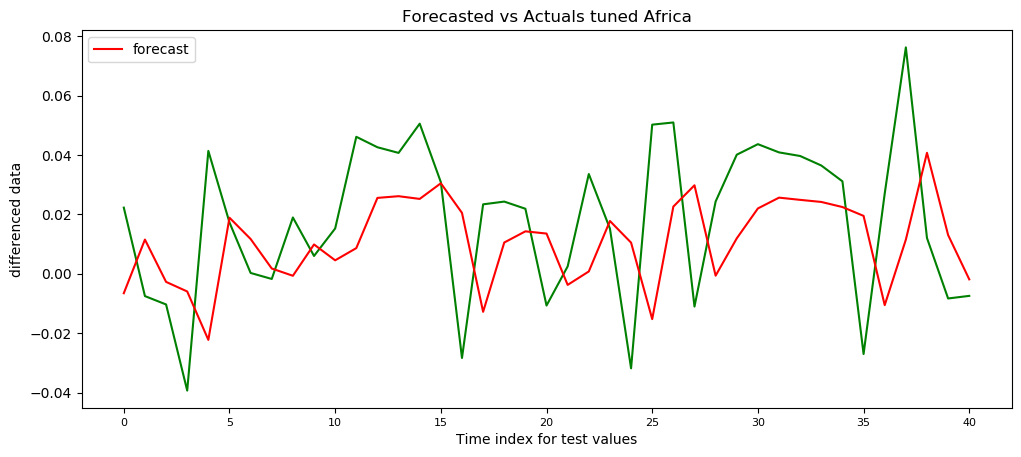

Test RMSE: 0.029


<Figure size 720x576 with 0 Axes>

In [1139]:


history = [x for x in train]
predictions = list()

for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(1,0,1))
	model_fit = model.fit(disp=False, transparams=False, trend='nc')
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat)
	history.append(test[t])

plt.figure(figsize=(12,5), dpi=100)
p1= plt.plot(test, color = 'green')
p2= plt.plot(predictions, color='red')
plt.title("Forecasted vs Actuals tuned Africa")
plt.xlabel("Time index for test values")
plt.ylabel("differenced data")
plt.legend(( p2), ['forecast'])

plt.show()

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.savefig("images/AFRICAMODELARIMA.jpeg")

In [152]:
#addition of parameter trend nc allows a lower test RMSE and therfore will be looked at incoroporated in other models 

# Asia ARIMA

In [1140]:
Asiatemp = resampledAsia['AverageTemperature']

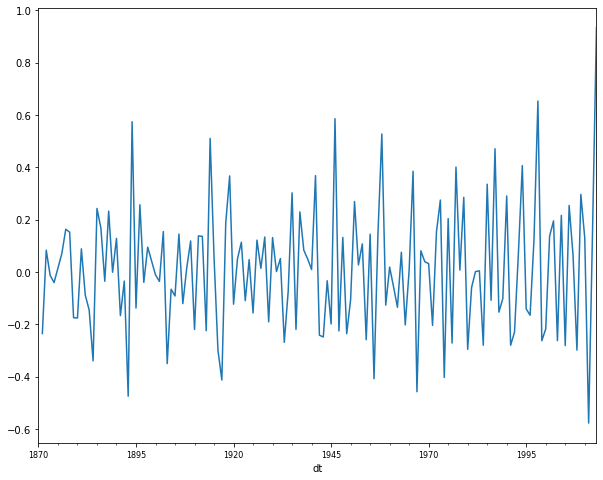

In [1141]:
Asia_diff=Asiatemp.diff(periods=1)
Asia_diff.plot()
# looks rather stationary

In [1142]:
Asia_diff.dropna(inplace=True)
result = adfuller(Asia_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.277239
p-value: 0.000000
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


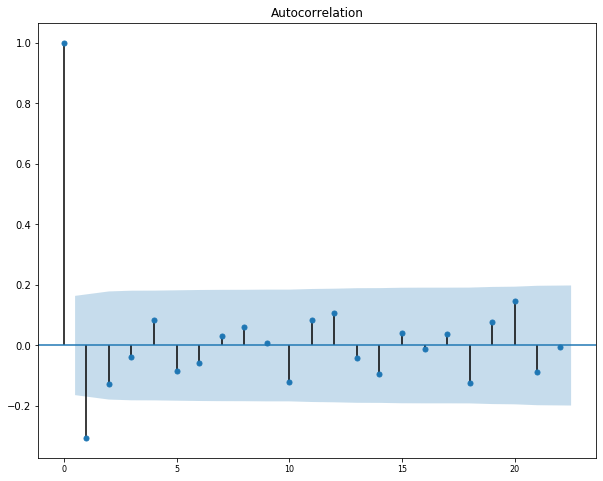

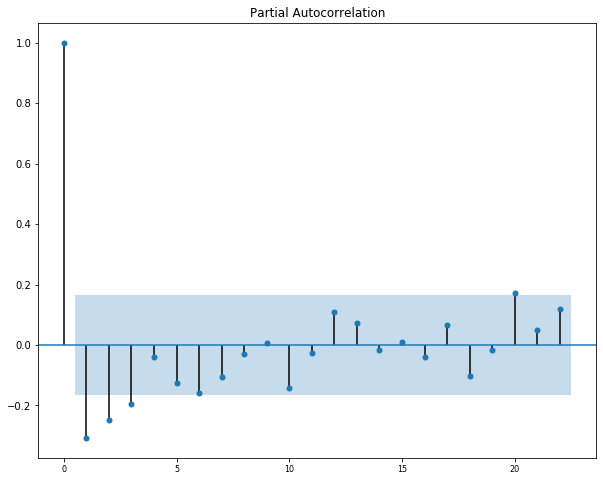

In [1143]:
plot_acf(Asia_diff)
plot_pacf(Asia_diff)
plt.show()

                              ARMA Model Results                              
Dep. Variable:     AverageTemperature   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                  29.920
Method:                       css-mle   S.D. of innovations              0.176
Date:                Thu, 19 Sep 2019   AIC                            -51.841
Time:                        22:47:28   BIC                            -41.420
Sample:                    01-01-1871   HQIC                           -47.624
                         - 01-01-1970                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0073      0.001      7.722      0.000       0.005       0.009
ar.L1.AverageTemperature     0.3715      0.095      3.924      0.000       0.186       0.

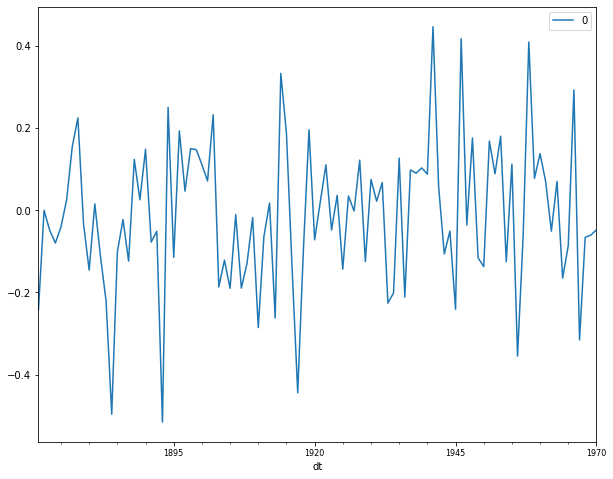

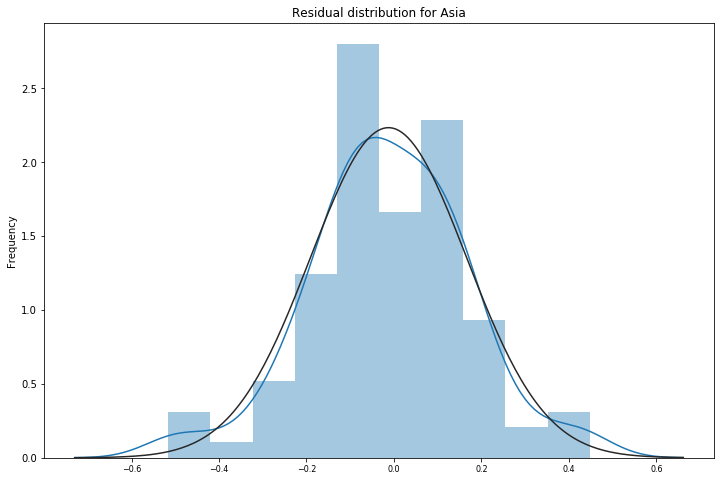

In [1144]:
ARIMA1model = ARIMA(Asia_diff[:'1970'], order=(1,0,1)).fit()
print(ARIMA1model.summary())
resid = ARIMA1model.resid
print(normaltest(resid))

res=DataFrame(ARIMA1model.resid)
res.plot()

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0)

#Now going to plot the distribution using 
plt.ylabel('Frequency')
plt.title('Residual distribution for Asia')
plt.savefig("images/AsiaARIMA.jpeg")

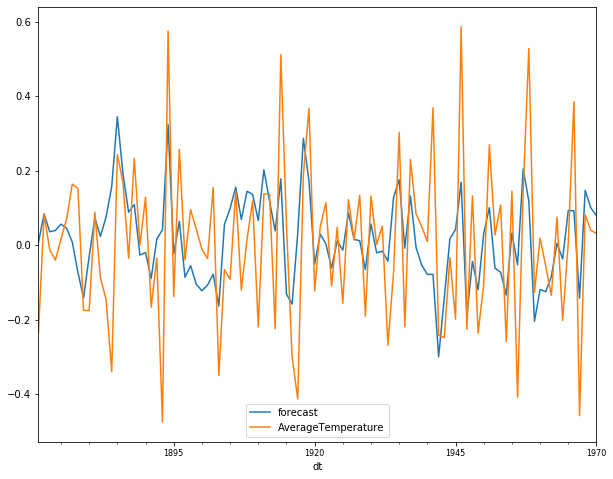

In [1145]:
ARIMA1model.plot_predict(dynamic=False)
plt.show()

In [1146]:
X = Asia_diff.values
training = X[0:100]
train = X[0:100]
test = X[101:]



def StartARIMAForecasting(train, P, D, Q):
    model = ARIMA(train, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction
Actual = [x for x in train]
Predictions = list()
trained = list()
forecasted = list()


for timepoint in range(len(test)):
    ActualValue =  test[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 1,0,1)    
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)
    trained = np.append(train,Predictions)
    forecast=np.empty(89)
    forecast.fill(np.nan)
    forecas = np.append(forecast, Predictions)
    
  
    
    


Actual=0.153205, Predicted=0.063726
Actual=0.275089, Predicted=-0.025939
Actual=-0.403383, Predicted=-0.184062


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Actual=0.203949, Predicted=0.072037
Actual=-0.271868, Predicted=-0.053402
Actual=0.401116, Predicted=0.124158
Actual=0.007110, Predicted=-0.130861
Actual=0.285431, Predicted=-0.122817
Actual=-0.295702, Predicted=-0.284132
Actual=-0.059316, Predicted=-0.086799
Actual=0.001450, Predicted=-0.042895
Actual=0.004315, Predicted=-0.037231
Actual=-0.280194, Predicted=-0.033348
Actual=0.335710, Predicted=0.145787
Actual=-0.108333, Predicted=-0.063368
Actual=0.471353, Predicted=0.013151
Actual=-0.153588, Predicted=-0.279751
Actual=-0.101917, Predicted=-0.163093
Actual=0.290653, Predicted=-0.089031
Actual=-0.280233, Predicted=-0.254170
Actual=-0.230443, Predicted=-0.071018
Actual=0.071746, Predicted=0.075970
Actual=0.406746, Predicted=0.034536
Actual=-0.141424, Predicted=-0.210449
Actual=-0.165474, Predicted=-0.109213
Actual=0.125900, Predicted=0.000296
Actual=0.653793, Predicted=-0.071614


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Actual=-0.263138, Predicted=-0.448669
Actual=-0.217862, Predicted=-0.259146


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Actual=0.137628, Predicted=-0.122092
Actual=0.195320, Predicted=-0.187549
Actual=-0.262750, Predicted=-0.200271
Actual=0.216389, Predicted=-0.029065
Actual=-0.281472, Predicted=-0.129939
Actual=0.254449, Predicted=0.044573
Actual=0.064060, Predicted=-0.091000
Actual=-0.298902, Predicted=-0.105387
Actual=0.296774, Predicted=0.081070
Actual=0.130460, Predicted=-0.088141
Actual=-0.577732, Predicted=-0.141539
Actual=0.157010, Predicted=0.217393
Actual=0.934229, Predicted=0.104445


In [1147]:
mse = mean_squared_error(test, Predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.271056


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmo

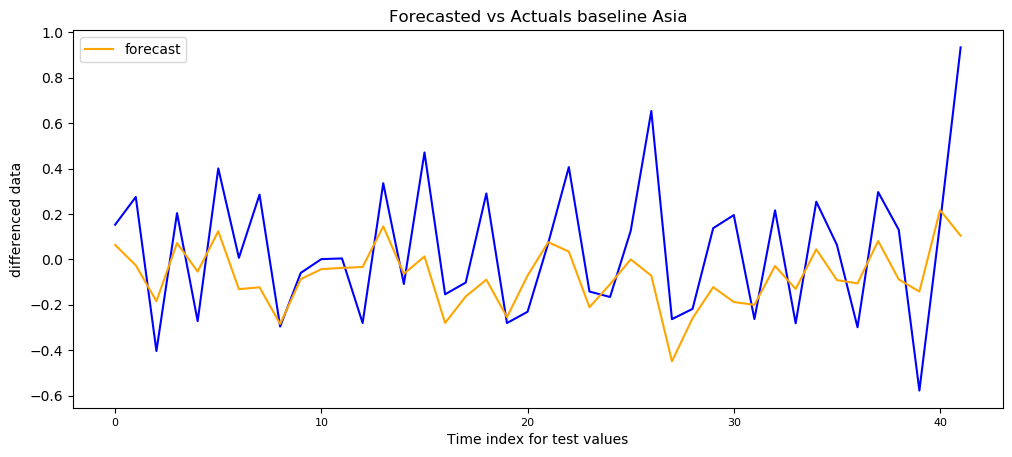

Test RMSE: 0.271


In [1148]:
X = Asia_diff.values
training = X[0:100]
train = X[0:100]
test = X[101:]

history = [x for x in train]
predictions = list()

for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(1,0,1))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat)
	history.append(test[t])

plt.figure(figsize=(12,5), dpi=100)
p1= plt.plot(test, color = 'blue')
p2= plt.plot(predictions, color='orange')
plt.title("Forecasted vs Actuals baseline Asia")
plt.xlabel("Time index for test values")
plt.ylabel("differenced data")
plt.legend(( p2), ['forecast'])

plt.show()

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

In [1149]:
mse = mean_squared_error(test, Predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.271056


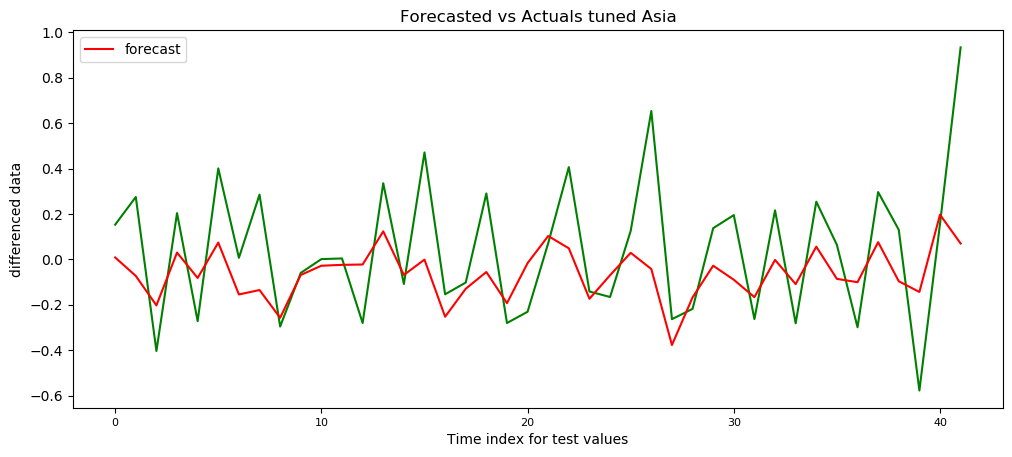

Test RMSE: 0.270


<Figure size 720x576 with 0 Axes>

In [1150]:
X = Asia_diff.values
training = X[0:100]
train = X[0:100]
test = X[101:]

history = [x for x in train]
predictions = list()

for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit(disp=False, transparams=False, trend='nc')
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])

plt.figure(figsize=(12,5), dpi=100)
p1= plt.plot(test, color = 'green')
p2= plt.plot(predictions, color='red')
plt.title("Forecasted vs Actuals tuned Asia")
plt.xlabel("Time index for test values")
plt.ylabel("differenced data")
plt.legend(( p2), ['forecast'])

plt.show()

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.savefig("images/ASIAMODELARIMA.jpeg")

In [164]:
# base is fine for Asia as best model

# Europe ARIMA

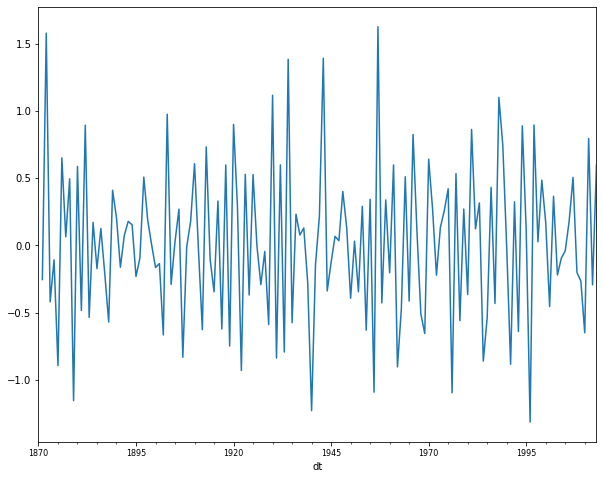

In [1151]:
Eurotemp = resampledEurope['AverageTemperature']
Euro_diff=Eurotemp.diff(periods=1)
Euro_diff.plot()


In [1152]:
Euro_diff.dropna(inplace=True)
result = adfuller(Euro_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.602989
p-value: 0.000000
Critical Values:
	1%: -3.480
	5%: -2.883
	10%: -2.578


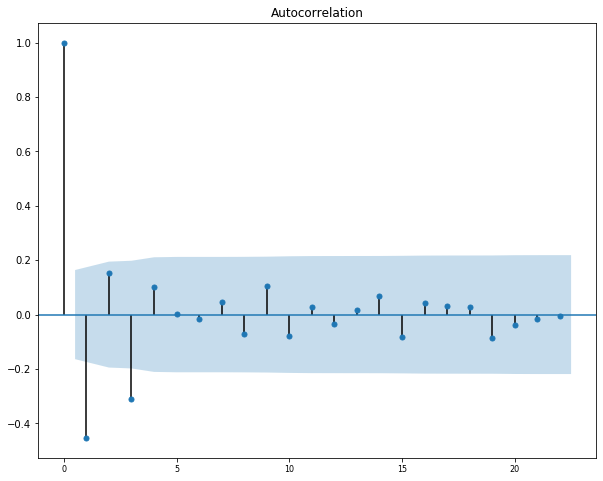

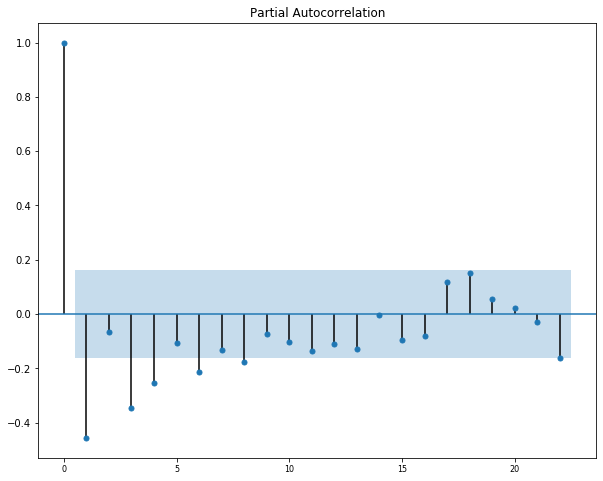

In [1153]:
plot_acf(Euro_diff)
plot_pacf(Euro_diff)
plt.show()

## so far the most adequate and reliable models for the sample are 1,1 as seen by the correlation plots

                              ARMA Model Results                              
Dep. Variable:     AverageTemperature   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                 -60.003
Method:                       css-mle   S.D. of innovations              0.431
Date:                Thu, 19 Sep 2019   AIC                            128.006
Time:                        22:48:11   BIC                            138.427
Sample:                    01-01-1871   HQIC                           132.224
                         - 01-01-1970                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0069      0.002      4.266      0.000       0.004       0.010
ar.L1.AverageTemperature     0.0944      0.100      0.942      0.349      -0.102       0.

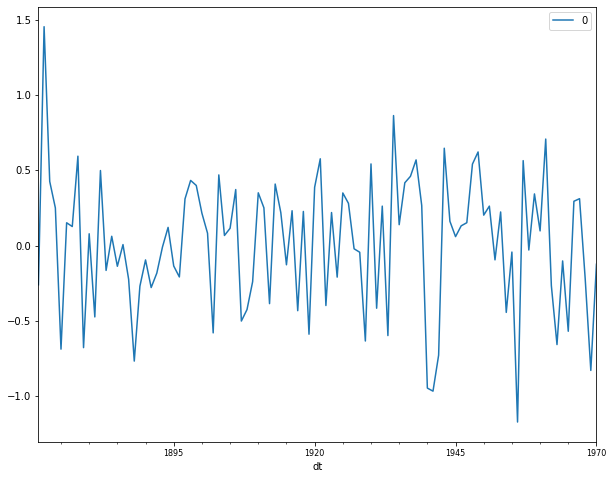

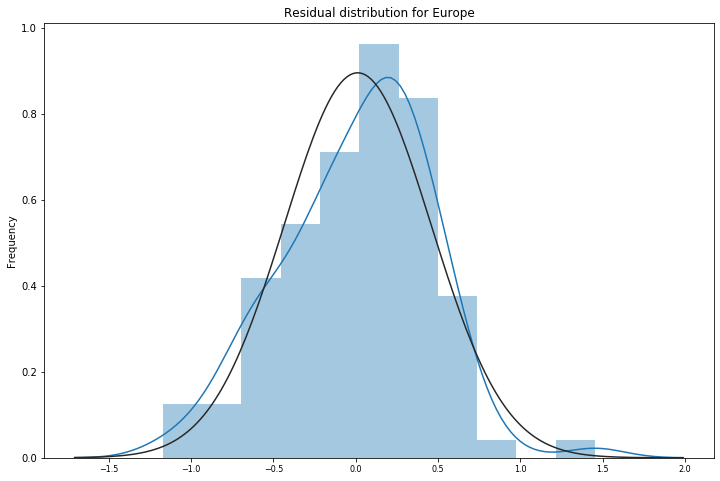

In [1155]:
ARIMA1model = ARIMA(Euro_diff[:'1970'], order=(1,0,1)).fit()
print(ARIMA1model.summary())
resid = ARIMA1model.resid
print(normaltest(resid))

res=DataFrame(ARIMA1model.resid)
res.plot()

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0)

#Now going to plot the distribution using 
plt.ylabel('Frequency')

plt.title('Residual distribution for Europe')
plt.savefig("images/EuropeARIMA.jpeg")

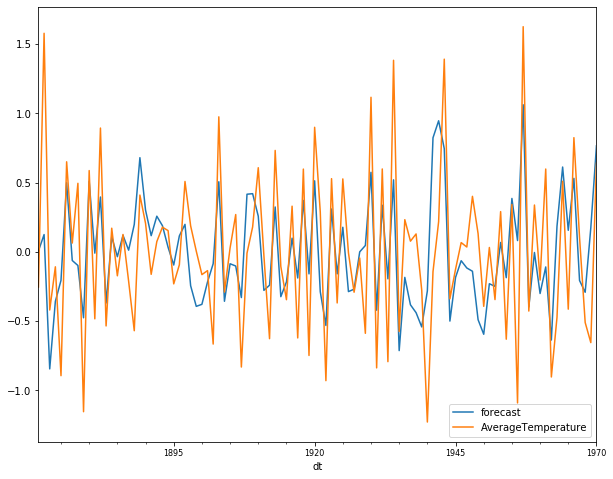

In [1156]:
ARIMA1model.plot_predict(dynamic=False)
plt.show()

In [1157]:
X = Euro_diff.values
training = X[0:100]
train = X[0:100]
test = X[101:]


def StartARIMAForecasting(train, P, D, Q):
	model = ARIMA(train, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction
Actual = [x for x in train]
Predictions = list()
trained = list()
forecasted = list()
blank = np.full(93, np.nan)


for timepoint in range(len(test)):
    ActualValue =  test[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 1,0,1)    
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)
    trained = np.append(blank,Predictions)
    
    
    
    
  
    
    
#Print MSE to see how good the model is




mse = mean_squared_error(test, Predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

Actual=-0.221278, Predicted=0.191101
Actual=0.133825, Predicted=0.382503
Actual=0.257361, Predicted=0.255234
Actual=0.420618, Predicted=0.028416
Actual=-1.094988, Predicted=-0.331497
Actual=0.533632, Predicted=0.648929
Actual=-0.558808, Predicted=0.157387
Actual=0.270298, Predicted=0.645233
Actual=-0.364812, Predicted=0.384406
Actual=0.861267, Predicted=0.677919
Actual=0.122989, Predicted=-0.072101
Actual=0.315481, Predicted=-0.168742
Actual=-0.859715, Predicted=-0.424544
Actual=-0.535695, Predicted=0.329117
Actual=0.431598, Predicted=0.768898
Actual=-0.431712, Predicted=0.375785
Actual=1.099513, Predicted=0.637993
Actual=0.743373, Predicted=-0.209309
Actual=-0.013327, Predicted=-0.804149
Actual=-0.882710, Predicted=-0.730959
Actual=0.323506, Predicted=-0.005893
Actual=-0.640082, Predicted=-0.259679
Actual=0.888213, Predicted=0.264440
Actual=0.110327, Predicted=-0.455906
Actual=-1.312341, Predicted=-0.516215
Actual=0.894651, Predicted=0.563194
Actual=0.026713, Predicted=-0.183468
Actua

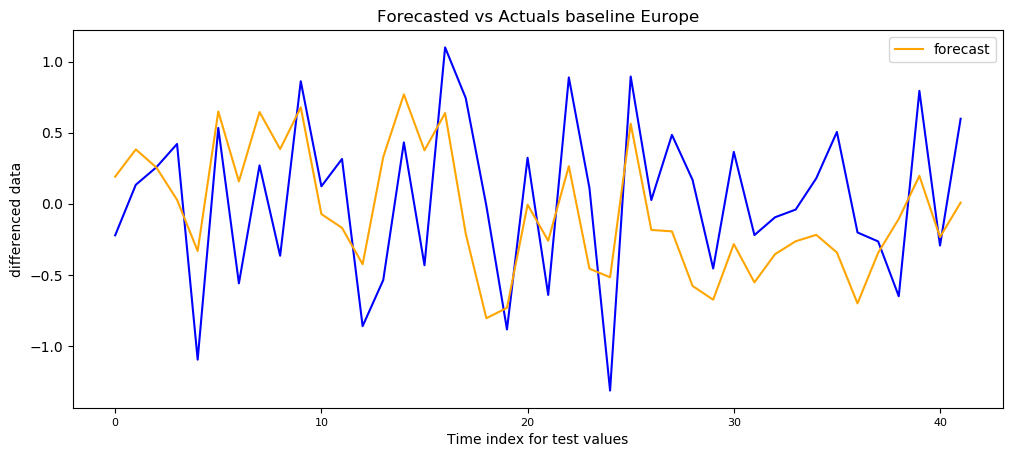

Test RMSE: 0.525


<Figure size 720x576 with 0 Axes>

In [1158]:
X = Euro_diff.values
training = X[0:100]
train = X[0:100]
test = X[101:]

history = [x for x in train]
predictions = list()

for t in range(len(test)):
# fit model
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])

plt.figure(figsize=(12,5), dpi=100)
p1= plt.plot(test, color = 'blue')
p2= plt.plot(predictions, color='orange')
plt.title("Forecasted vs Actuals baseline Europe")
plt.xlabel("Time index for test values")
plt.ylabel("differenced data")
plt.legend(( p2), ['forecast'])

plt.show()

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.savefig("images/OceaniaARIMA.jpeg")

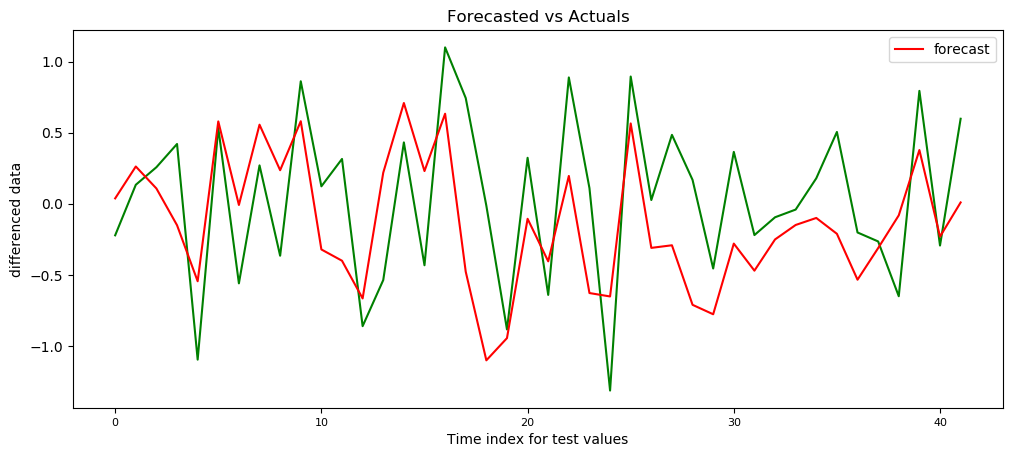

Test RMSE: 0.529


<Figure size 720x576 with 0 Axes>

In [1159]:
X = Euro_diff.values
training = X[0:100]
train = X[0:100]
test = X[101:]

history = [x for x in train]
predictions = list()

for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit(disp=False, transparams=False, trend='nc')
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])

plt.figure(figsize=(12,5), dpi=100)
p1= plt.plot(test, color = 'green')
p2= plt.plot(predictions, color='red')
plt.title("Forecasted vs Actuals")
plt.xlabel("Time index for test values")
plt.ylabel("differenced data")
plt.legend(( p2), ['forecast'])

plt.show()

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.savefig("images/EUROMODELARIMA.jpeg")

In [174]:
# modified ARIMA is much better

# Oceania

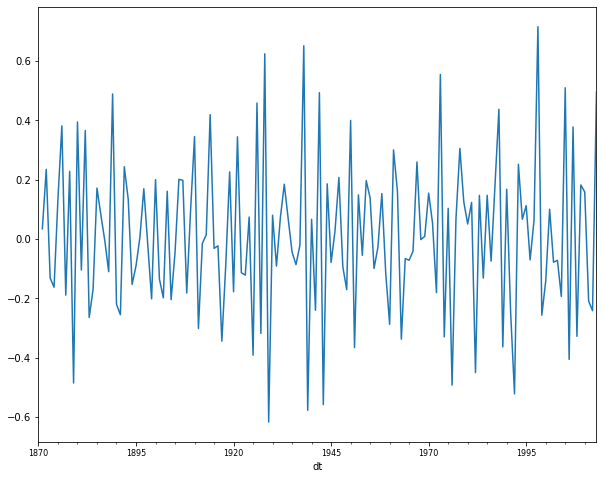

In [1160]:
Oceaniatemp = resampledOceania['AverageTemperature']
Oceania_diff = Oceaniatemp.diff(periods=1)
Oceania_diff.plot()

In [1161]:
Oceania_diff.dropna(inplace=True)
result = adfuller(Oceania_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.337754
p-value: 0.000000
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


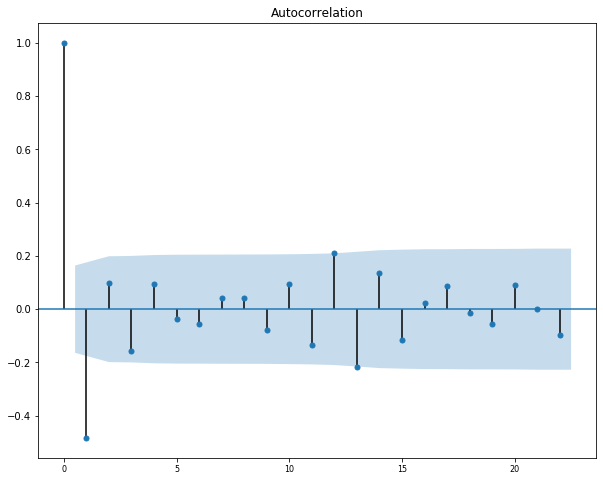

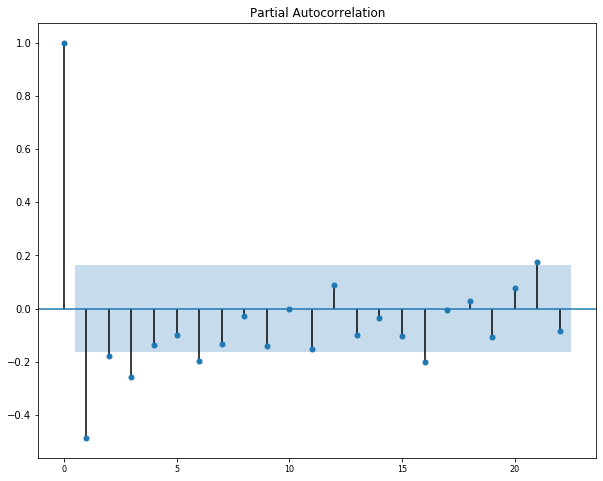

In [1162]:
plot_acf(Oceania_diff)
plot_pacf(Oceania_diff)
plt.show()

                              ARMA Model Results                              
Dep. Variable:     AverageTemperature   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                  21.787
Method:                       css-mle   S.D. of innovations              0.194
Date:                Thu, 19 Sep 2019   AIC                            -35.575
Time:                        22:49:21   BIC                            -25.154
Sample:                    01-01-1871   HQIC                           -31.357
                         - 01-01-1970                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0087      0.004      2.177      0.032       0.001       0.016
ar.L1.AverageTemperature    -0.0072      0.156     -0.046      0.963      -0.313       0.

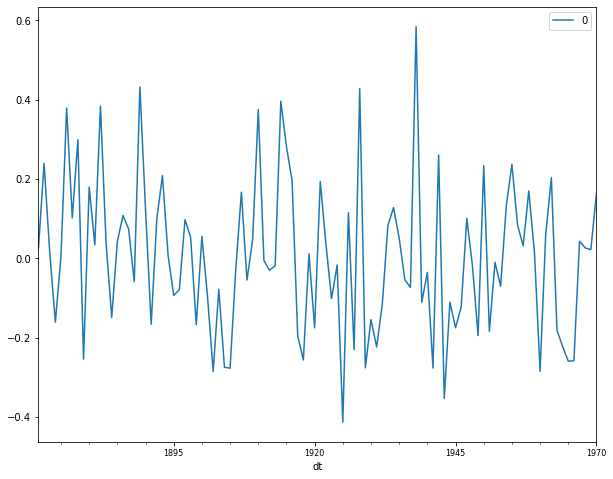

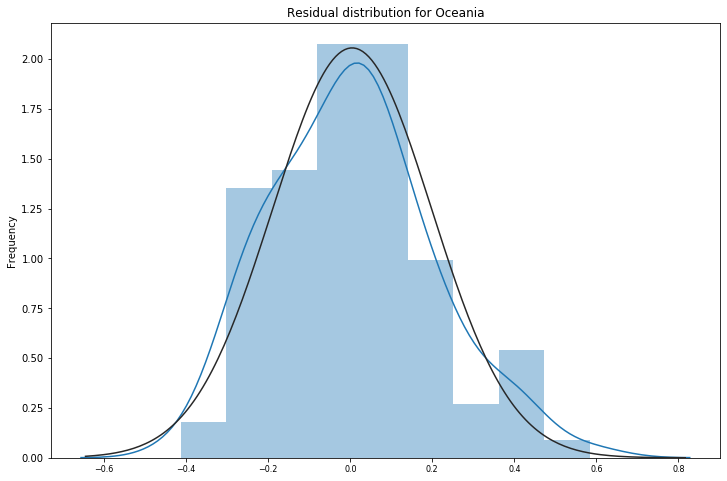

In [1163]:
ARIMA1model = ARIMA(Oceania_diff[:'1970'], order=(1,0,1)).fit()
print(ARIMA1model.summary())
resid = ARIMA1model.resid
print(normaltest(resid))

res=DataFrame(ARIMA1model.resid)
res.plot()

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0)


plt.ylabel('Frequency')
plt.title('Residual distribution for Oceania')
plt.savefig("images/OceaniaARIMA.jpeg")

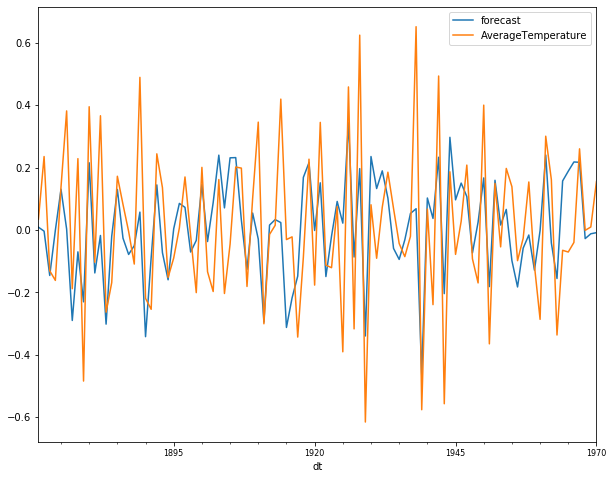

In [1164]:
ARIMA1model.plot_predict(dynamic=False)
plt.show()

In [1165]:
X = Oceania_diff.values
training = X[0:100]
train = X[0:100]
test = X[101:]



def StartARIMAForecasting(train, P, D, Q):
    model = ARIMA(train, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction
Actual = [x for x in train]
Predictions = list()
trained = list()
forecasted = list()
blank = t = np.full(99, np.nan)


for timepoint in range(len(test)):
    ActualValue =  test[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 1,0,1)    
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)
    trained = np.append(blank,Predictions)
    
    
    
    
  
    
    
#Print MSE to see how good the model is



mse = mean_squared_error(test, Predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

Actual=-0.180340, Predicted=-0.124299
Actual=0.554868, Predicted=0.054651
Actual=-0.329389, Predicted=-0.397483
Actual=0.103684, Predicted=-0.036197
Actual=-0.491948, Predicted=-0.090160
Actual=0.069031, Predicted=0.310112
Actual=0.305622, Predicted=0.203546
Actual=0.125587, Predicted=-0.058919
Actual=0.050931, Predicted=-0.143343
Actual=0.123667, Predicted=-0.156538
Actual=-0.449615, Predicted=-0.218992
Actual=0.147372, Predicted=0.161358
Actual=-0.131434, Predicted=0.033298
Actual=0.147653, Predicted=0.137711
Actual=-0.074108, Predicted=0.014610
Actual=0.181330, Predicted=0.078835
Actual=0.437767, Predicted=-0.064960
Actual=-0.363049, Predicted=-0.391530
Actual=0.167997, Predicted=-0.056824
Actual=-0.244514, Predicted=-0.162447
Actual=-0.521309, Predicted=0.052342
Actual=0.252028, Predicted=0.399272
Actual=0.067090, Predicted=0.191542
Actual=0.112701, Predicted=0.139375
Actual=-0.069792, Predicted=0.055016
Actual=0.063097, Predicted=0.112321


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=0.715837, Predicted=0.066456
Actual=-0.256337, Predicted=-0.478609
Actual=-0.141271, Predicted=-0.250825
Actual=0.100708, Predicted=-0.131246
Actual=-0.077767, Predicted=-0.193497
Actual=-0.071382, Predicted=-0.123718
Actual=-0.193156, Predicted=-0.062308
Actual=0.510031, Predicted=0.085198
Actual=-0.405215, Predicted=-0.251464
Actual=0.378132, Predicted=0.027927
Actual=-0.327479, Predicted=-0.198805
Actual=0.182656, Predicted=0.061393
Actual=0.158976, Predicted=-0.066226
Actual=-0.208972, Predicted=-0.164302
Actual=-0.241059, Predicted=0.012706
Actual=0.495651, Predicted=0.188030
RMSE: 0.248449


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


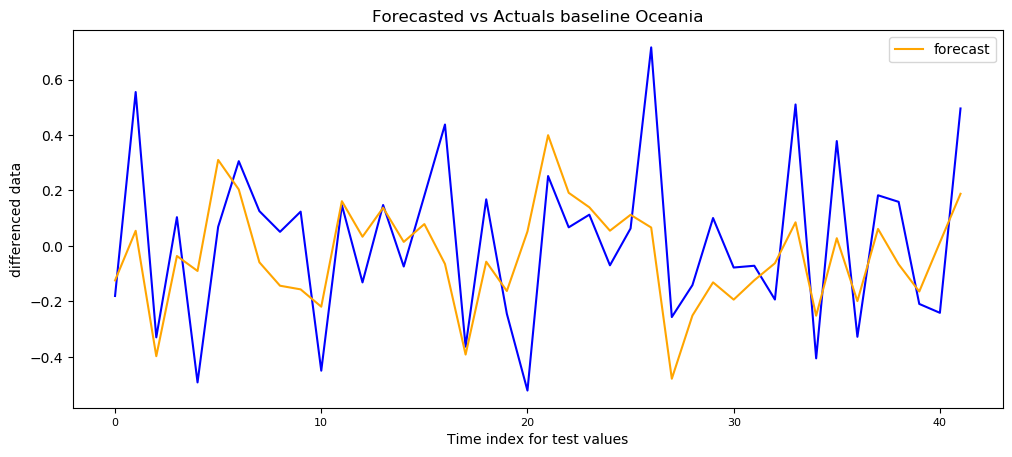

Test RMSE: 0.248


<Figure size 720x576 with 0 Axes>

In [1166]:
X = Oceania_diff.values
training = X[0:100]
train = X[0:100]
test = X[101:]

history = [x for x in train]
predictions = list()

for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])

plt.figure(figsize=(12,5), dpi=100)
p1= plt.plot(test, color = 'blue')
p2= plt.plot(predictions, color='orange')
plt.title("Forecasted vs Actuals baseline Oceania")
plt.xlabel("Time index for test values")
plt.ylabel("differenced data")
plt.legend(( p2), ['forecast'])

plt.show()

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.savefig("images/OceaniaMODELARIMA.jpeg")

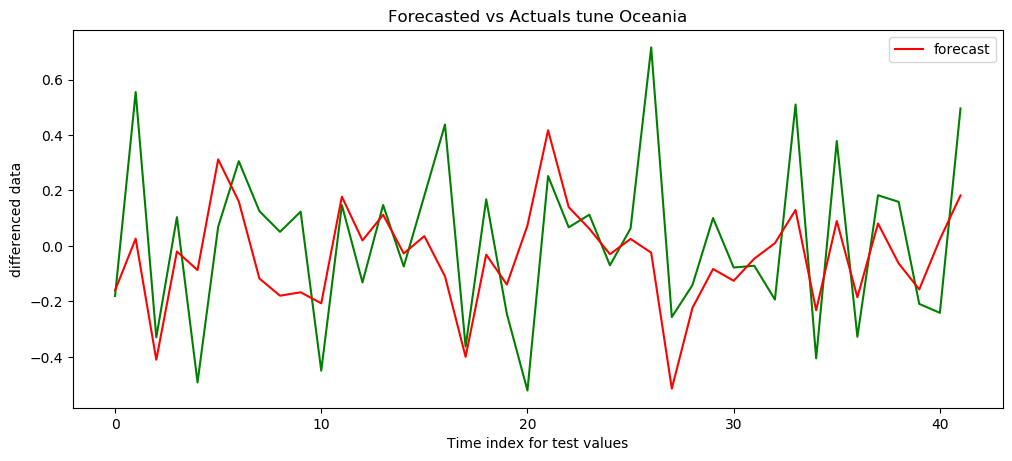

Test RMSE: 0.258


In [674]:
X = Oceania_diff.values
training = X[0:100]
train = X[0:100]
test = X[101:]

history = [x for x in train]
predictions = list()

for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit(disp=False, transparams=False, trend='nc')
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])

plt.figure(figsize=(12,5), dpi=100)
p1= plt.plot(test, color = 'green')
p2= plt.plot(predictions, color='red')
plt.title("Forecasted vs Actuals tune Oceania")
plt.xlabel("Time index for test values")
plt.ylabel("differenced data")
plt.legend(( p2), ['forecast'])

plt.show()

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

In [183]:
# Basic model has performed better

# North America

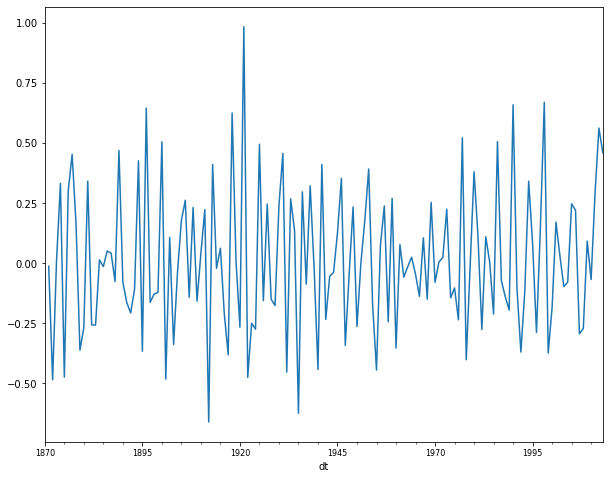

In [1167]:
Northtemp = resampledNorth['AverageTemperature']
North_diff = Northtemp.diff(periods=1)
North_diff.plot()

In [1168]:
North_diff.dropna(inplace=True)
result = adfuller(North_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.376678
p-value: 0.000004
Critical Values:
	1%: -3.480
	5%: -2.883
	10%: -2.578


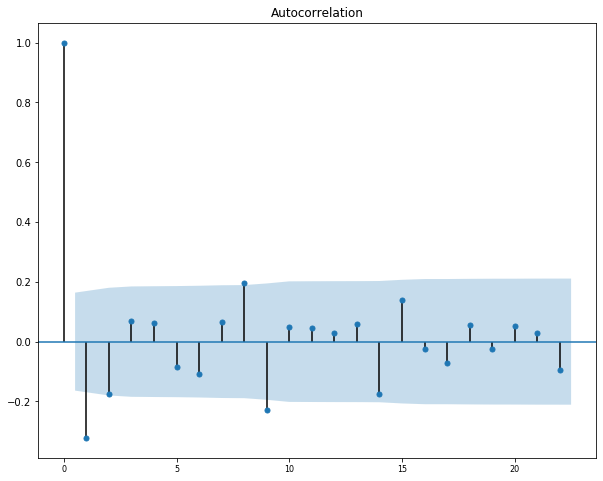

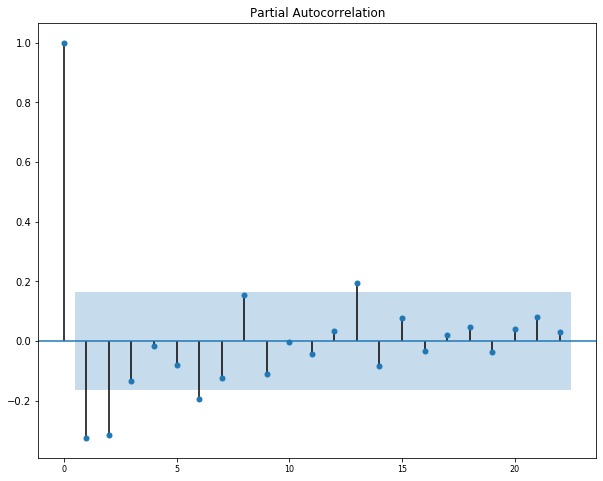

In [1169]:
plot_acf(North_diff)
plot_pacf(North_diff)
plt.show()

In [1170]:
# based off what we have seen it is very likely that this will be a anomalous spike in terms of correlation 
# it could be considered spurious however it could still be likely
# we will take the MA function as 1 give the fitting of the AR aspect too

                              ARMA Model Results                              
Dep. Variable:     AverageTemperature   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                  -1.454
Method:                       css-mle   S.D. of innovations              0.244
Date:                Thu, 19 Sep 2019   AIC                             10.908
Time:                        22:49:57   BIC                             21.328
Sample:                    01-01-1871   HQIC                            15.125
                         - 01-01-1970                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0040      0.004      0.920      0.360      -0.005       0.012
ar.L1.AverageTemperature     0.1403      0.121      1.164      0.247      -0.096       0.

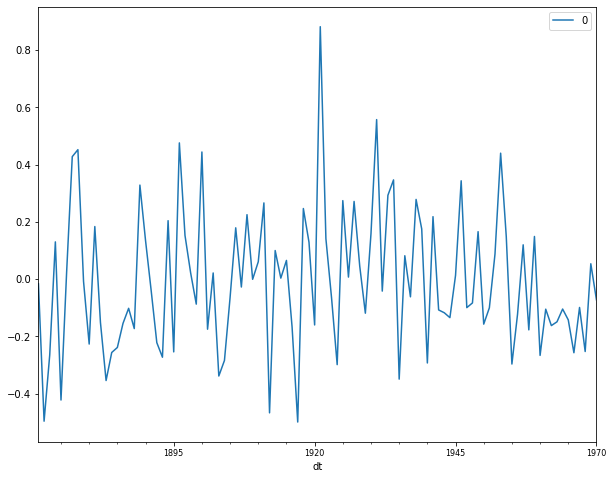

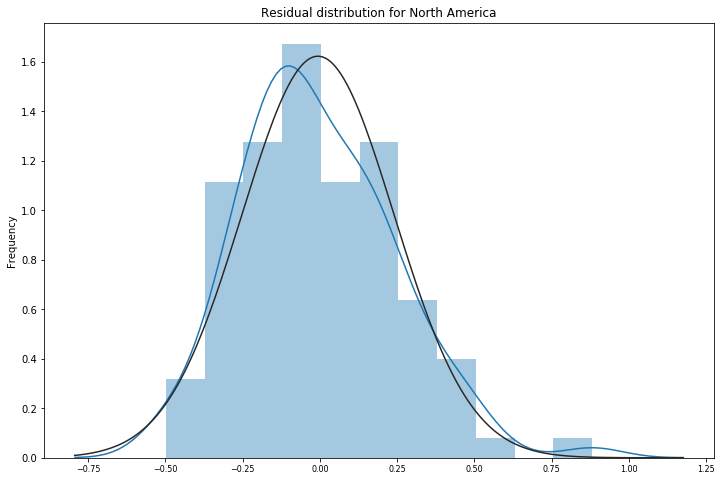

In [1171]:
ARIMA1model = ARIMA(North_diff[:'1970'], order=(1,0,1)).fit()
print(ARIMA1model.summary())
resid = ARIMA1model.resid
print(normaltest(resid))

res=DataFrame(ARIMA1model.resid)
res.plot()

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0)


plt.ylabel('Frequency')
plt.title('Residual distribution for North America')
plt.savefig("images/NorthARIMA.jpeg")

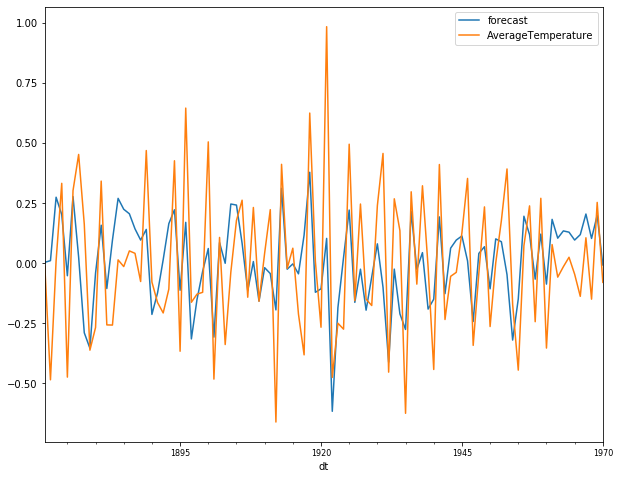

In [1172]:
ARIMA1model.plot_predict(dynamic=False)
plt.show()

In [1173]:
X = North_diff.values
training = X[0:100]
train = X[0:100]
test = X[101:]



def StartARIMAForecasting(train, P, D, Q):
    model = ARIMA(train, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction
Actual = [x for x in train]
Predictions = list()
trained = list()
forecasted = list()
blank = t = np.full(99, np.nan)


for timepoint in range(len(test)):
    ActualValue =  test[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 1,0,1)    
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)
    trained = np.append(blank,Predictions)
    
    
    
    
  
    
    
#Print MSE to see how good the model is


mse = mean_squared_error(test, Predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

Actual=0.024151, Predicted=0.054385
Actual=0.225409, Predicted=0.031594
Actual=-0.143575, Predicted=-0.124255
Actual=-0.102388, Predicted=-0.001161
Actual=-0.235574, Predicted=0.074460
Actual=0.522777, Predicted=0.230653
Actual=-0.401693, Predicted=-0.171003
Actual=-0.005389, Predicted=0.146886
Actual=0.381059, Predicted=0.129757
Actual=0.114218, Predicted=-0.163206
Actual=-0.275601, Predicted=-0.213691
Actual=0.110627, Predicted=0.019755
Actual=0.005766, Predicted=-0.059715
Actual=-0.211256, Predicted=-0.051486
Actual=0.506677, Predicted=0.113242
Actual=-0.072240, Predicted=-0.271280
Actual=-0.139108, Predicted=-0.172109
Actual=-0.194770, Predicted=-0.041826
Actual=0.659585, Predicted=0.108725
Actual=-0.104931, Predicted=-0.384900
Actual=-0.369525, Predicted=-0.234124
Actual=-0.117879, Predicted=0.070220
Actual=0.341962, Predicted=0.144494
Actual=0.083035, Predicted=-0.116464
Actual=-0.287842, Predicted=-0.151687
Actual=0.149457, Predicted=0.083986
Actual=0.670325, Predicted=-0.031366

In [1174]:
# p value of 1 indicates a slightly better fitting model although it is cautious to consider the differences in some


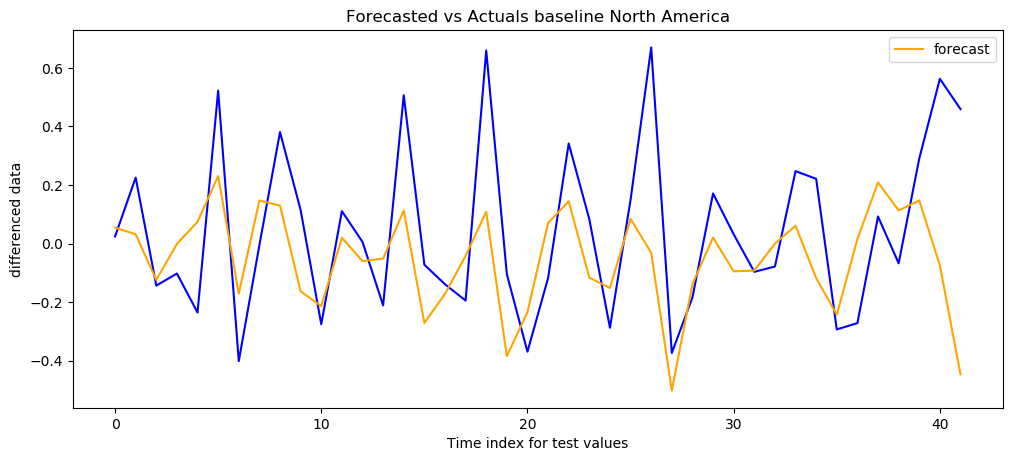

Test RMSE: 0.282


In [675]:
X=North_diff.values
training = X[0:100]
train = X[0:100]
test = X[101:]

history = [x for x in train]
predictions = list()

for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(1,0,1))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat)
	history.append(test[t])

plt.figure(figsize=(12,5), dpi=100)
p1= plt.plot(test, color = 'blue')
p2= plt.plot(predictions, color='orange')
plt.title("Forecasted vs Actuals baseline North America")
plt.xlabel("Time index for test values")
plt.ylabel("differenced data")
plt.legend(( p2), ['forecast'])

plt.show()

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

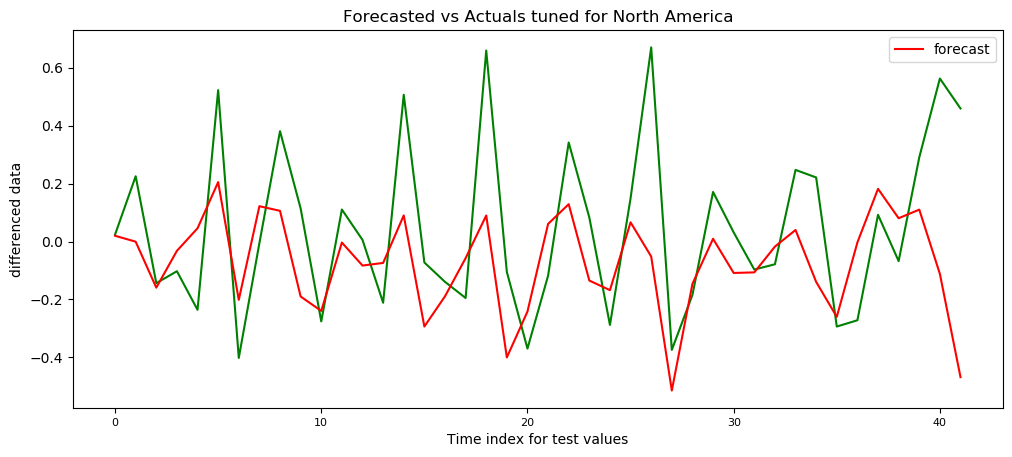

Test RMSE: 0.290


<Figure size 720x576 with 0 Axes>

In [1184]:
X = North_diff.values
training = X[0:100]
train = X[0:100]
test = X[101:]

history = [x for x in train]
predictions = list()

for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit(disp=False, transparams=False, trend='nc')
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])

plt.figure(figsize=(12,5), dpi=100)
p1= plt.plot(test, color = 'green')
p2= plt.plot(predictions, color='red')
plt.title("Forecasted vs Actuals tuned for North America")
plt.xlabel("Time index for test values")
plt.ylabel("differenced data")
plt.legend(( p2), ['forecast'])

plt.show()

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.savefig("images/NORTHMODELARIMA.jpeg")

In [194]:
# basic performed a lot better

# South America

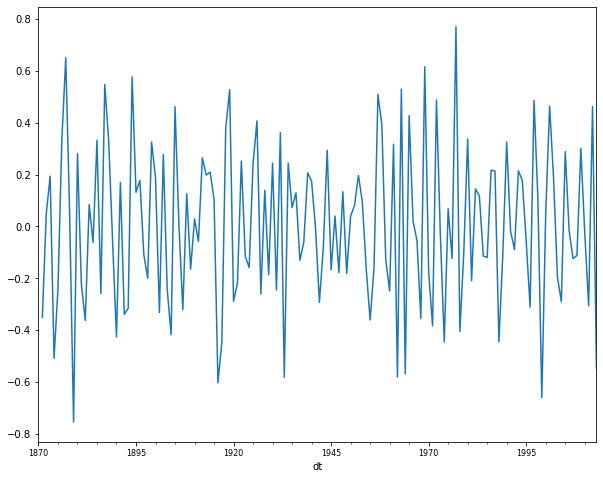

In [1176]:
Southtemp = resampledSouth['AverageTemperature']
South_diff = Southtemp.diff(periods=1)
South_diff.plot()


In [1177]:
South_diff.dropna(inplace=True)
result = adfuller(South_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.619100
p-value: 0.000000
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.578


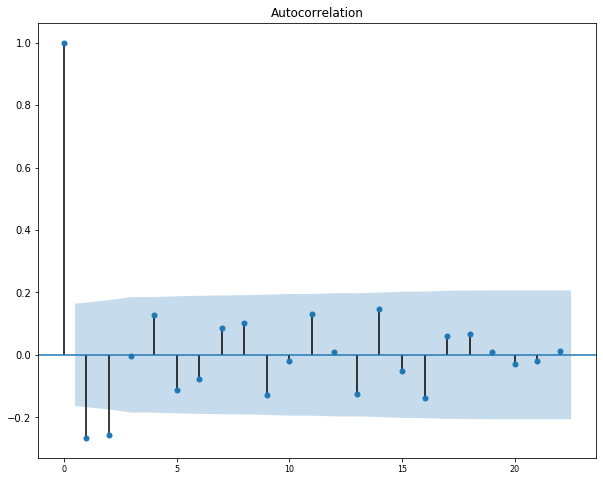

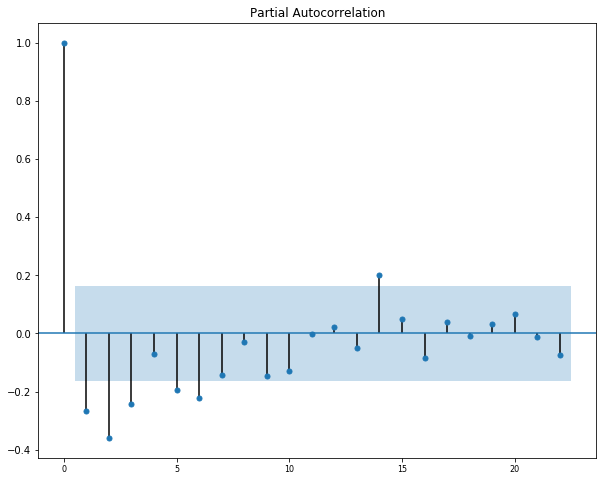

In [1178]:
plot_acf(South_diff)
plot_pacf(South_diff)
plt.show()

                              ARMA Model Results                              
Dep. Variable:     AverageTemperature   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                  -5.520
Method:                       css-mle   S.D. of innovations              0.251
Date:                Thu, 19 Sep 2019   AIC                             19.040
Time:                        22:50:20   BIC                             29.460
Sample:                    01-01-1871   HQIC                            23.257
                         - 01-01-1970                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0083      0.001      6.687      0.000       0.006       0.011
ar.L1.AverageTemperature     0.3158      0.097      3.244      0.002       0.125       0.

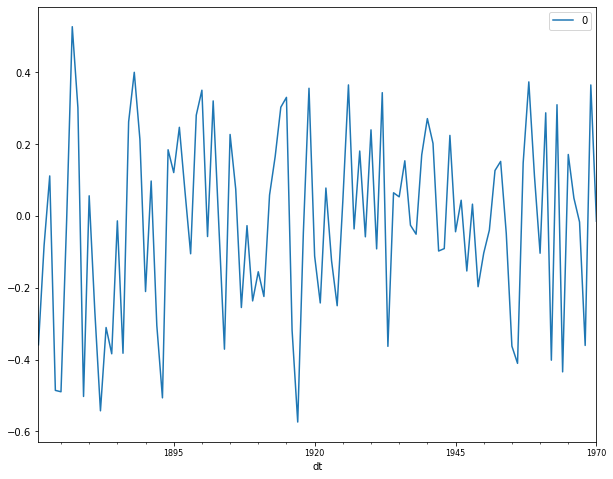

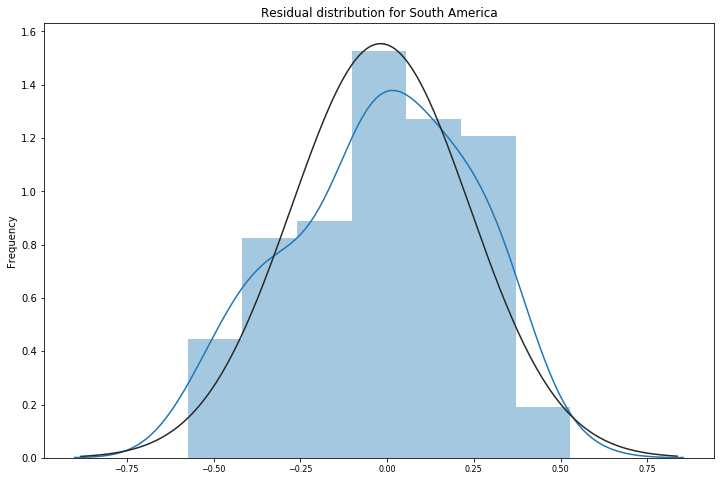

In [1179]:
ARIMA1model = ARIMA(South_diff[:'1970'], order=(1,0,1)).fit()
print(ARIMA1model.summary())
resid = ARIMA1model.resid
print(normaltest(resid))

res=DataFrame(ARIMA1model.resid)
res.plot()

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0)


plt.ylabel('Frequency')
plt.title('Residual distribution for South America')
plt.savefig("images/SouthARIMA.jpeg")

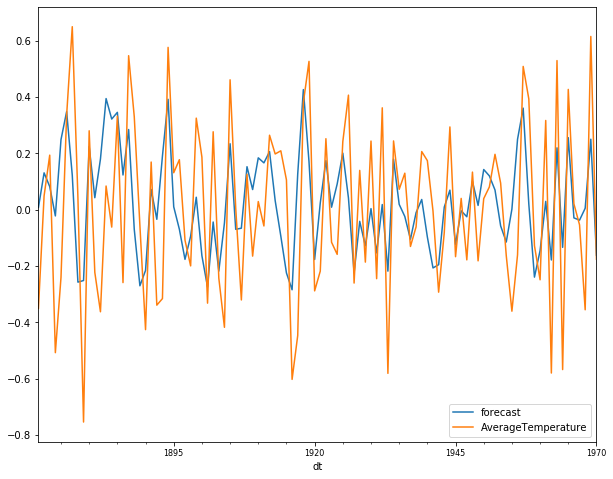

In [1180]:
ARIMA1model.plot_predict(dynamic=False)
plt.show()

In [1181]:
X = South_diff.values
training = X[0:100]
train = X[0:100]
test = X[101:]

def StartARIMAForecasting(train, P, D, Q):
	model = ARIMA(train, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction
Actual = [x for x in train]
Predictions = list()
trained = list()
forecasted = list()
blank = t = np.full(99, np.nan)


for timepoint in range(len(test)):
    ActualValue =  test[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 1,0,1)    
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)
    trained = np.append(blank,Predictions)
    
    
    
    
  
    
    
#Print MSE to see how good the model is


mse = mean_squared_error(test, Predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

Actual=0.487636, Predicted=-0.035425
Actual=-0.032229, Predicted=-0.345814
Actual=-0.446165, Predicted=-0.293259
Actual=0.068170, Predicted=0.003987
Actual=-0.123401, Predicted=-0.035129
Actual=0.770445, Predicted=0.051235
Actual=-0.405335, Predicted=-0.442878
Actual=-0.100483, Predicted=-0.155005
Actual=0.337402, Predicted=-0.079197
Actual=-0.209312, Predicted=-0.284380
Actual=0.144614, Predicted=-0.132536
Actual=0.117149, Predicted=-0.211112
Actual=-0.114465, Predicted=-0.264257
Actual=-0.119804, Predicted=-0.175703
Actual=0.217344, Predicted=-0.090555
Actual=0.213320, Predicted=-0.210696
Actual=-0.445180, Predicted=-0.314588


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Actual=-0.108936, Predicted=-0.038171
Actual=0.325738, Predicted=0.032718
Actual=-0.019062, Predicted=-0.155140
Actual=-0.089414, Predicted=-0.130099
Actual=0.214578, Predicted=-0.066321


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Actual=0.177362, Predicted=-0.182885


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Actual=-0.057564, Predicted=-0.267495


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Actual=-0.311304, Predicted=-0.214555


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Actual=0.486999, Predicted=-0.026107
Actual=0.104665, Predicted=-0.212716
Actual=-0.659893, Predicted=-0.235833
Actual=0.050759, Predicted=0.173776
Actual=0.463787, Predicted=0.131185
Actual=0.189502, Predicted=-0.144116
Actual=-0.195922, Predicted=-0.229932
Actual=-0.289980, Predicted=-0.081461
Actual=0.288354, Predicted=0.104397
Actual=-0.015905, Predicted=-0.066705
Actual=-0.124109, Predicted=-0.041273
Actual=-0.111691, Predicted=0.045321
Actual=0.300357, Predicted=0.115084
Actual=-0.023575, Predicted=-0.066597
Actual=-0.306258, Predicted=-0.036882
Actual=0.461901, Predicted=0.159453
Actual=-0.547230, Predicted=-0.127222
RMSE: 0.278306


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmo

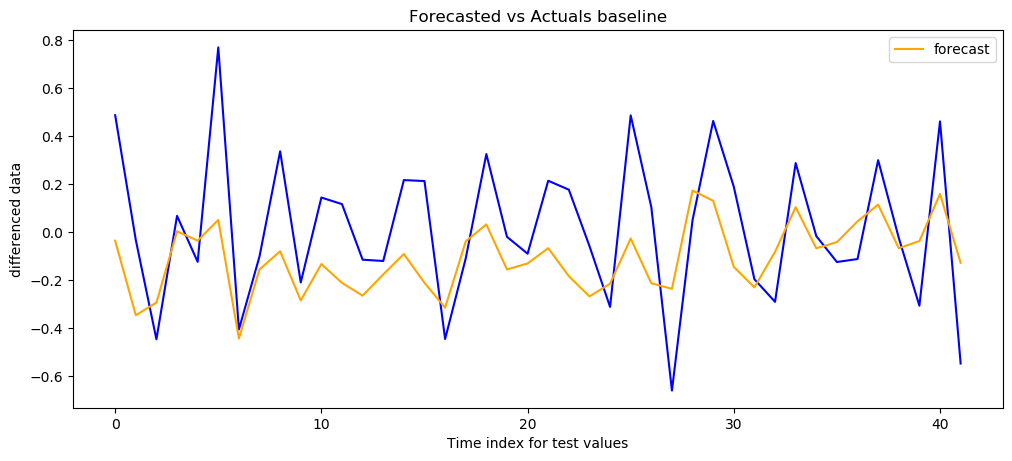

Test RMSE: 0.278


In [677]:
X=South_diff.values
training = X[0:100]
train = X[0:100]
test = X[101:]

history = [x for x in train]
predictions = list()

for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])

plt.figure(figsize=(12,5), dpi=100)
p1= plt.plot(test, color = 'blue')
p2= plt.plot(predictions, color='orange')
plt.title("Forecasted vs Actuals baseline")
plt.xlabel("Time index for test values")
plt.ylabel("differenced data")
plt.legend(( p2), ['forecast'])

plt.show()

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: overflow encountered in square
  Z_mat, R_mat, T_mat)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-pack

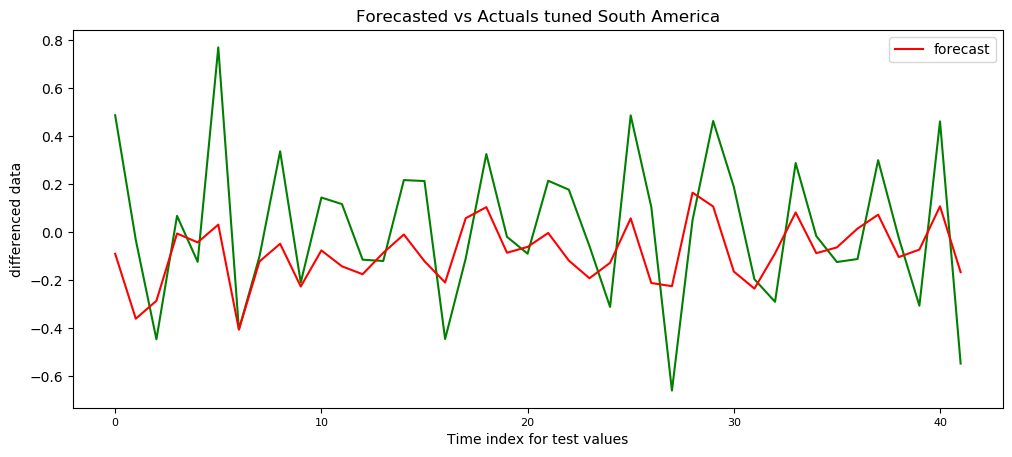

Test RMSE: 0.268


<Figure size 720x576 with 0 Axes>

In [1183]:
X = South_diff.values
training = X[0:100]
train = X[0:100]
test = X[101:]

history = [x for x in train]
predictions = list()

for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit(disp=False, transparams=False, trend='nc')
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])

plt.figure(figsize=(12,5), dpi=100)
p1= plt.plot(test, color = 'green')
p2= plt.plot(predictions, color='red')
plt.title("Forecasted vs Actuals tuned South America")
plt.xlabel("Time index for test values")
plt.ylabel("differenced data")
plt.legend(( p2), ['forecast'])

plt.show()

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.savefig("images/SOUTHMODELARIMA.jpeg")

In [203]:
# modified is better

# Using LSTMs 

In [210]:
resampledAfrica.dtypes

AverageTemperature               float64
AverageTemperatureUncertainty    float64
Latitude                         float64
Longitude                        float64
dtype: object

## There was a need to install Tensorflow through the Anaconda suite to enable the use of Keras through its backend

In [211]:

import tensorflow as tf


In [212]:
from tensorflow.python import keras

In [213]:

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow.python.keras.callbacks import EarlyStopping


# Africa 

In [ ]:
# # best and lowest RMSE found at 50N and 1000E

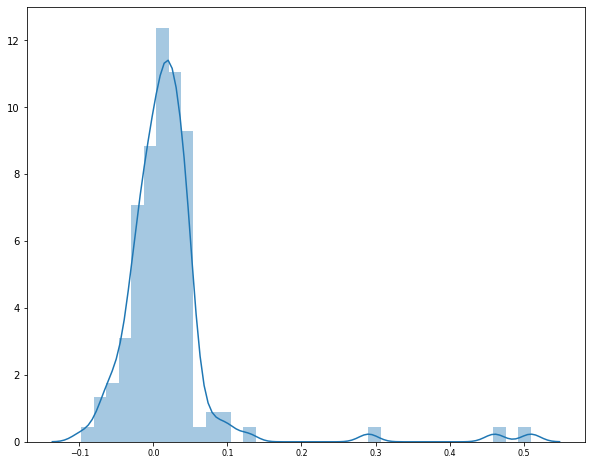

In [1185]:
sns.distplot(rolling_mean_diff.values)


In [1186]:
len(rolling_mean_diff)

134

## Train an testing splits 

In [1187]:
trainsetA =resampledAfrica[:'1972'].values
testsetA= resampledAfrica['1973':].values

scaler = MinMaxScaler(feature_range=(0, 1))
trainset = scaler.fit_transform(trainsetA)
testset = scaler.fit_transform(testsetA)

In [1232]:
trainset = rolling_mean_diff[:'1972']

testset = rolling_mean_diff['1973':]


#trainset=np.reshape(training, (-1, 1))
#testset=np.reshape(testing, (-1, 1))

def to_sequences(lookbacksize, obs):
    x = []
    y=[]
    for i in range (len(obs)-lookback-1):
        window=obs[i:(i+lookback)]
        post_window = obs[i+lookback]
        window = [[x] for x in window]
        x.append(window)
        y.append(post_window)
    return np.array(x), np.array(y)



In [1233]:
lookback=5
x_train, y_train = to_sequences(lookback, trainset)
x_test, y_test = to_sequences(lookback, testset)

print('training set {}' .format(x_train.shape))
print('test set {}' .format(x_test.shape))

training set (87, 5, 1)
test set (35, 5, 1)


## Dimensionality is seen

### the below was taken and constantly tweaked and tuned to find the best parameters for the data

In [1234]:
model=Sequential()
model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor], verbose=2, epochs=500, batch_size=5)
model.summary()

Train on 87 samples, validate on 35 samples
Epoch 1/500
87/87 - 27s - loss: 0.0017 - val_loss: 0.0014
Epoch 2/500
87/87 - 1s - loss: 0.0016 - val_loss: 7.5551e-04
Epoch 3/500
87/87 - 1s - loss: 0.0014 - val_loss: 8.1495e-04
Epoch 4/500
87/87 - 1s - loss: 0.0013 - val_loss: 7.8222e-04
Epoch 5/500
87/87 - 1s - loss: 0.0014 - val_loss: 0.0011
Epoch 6/500
87/87 - 1s - loss: 0.0014 - val_loss: 7.1647e-04
Epoch 7/500
87/87 - 1s - loss: 0.0014 - val_loss: 7.1992e-04
Epoch 8/500
87/87 - 1s - loss: 0.0013 - val_loss: 6.9821e-04
Epoch 9/500
87/87 - 2s - loss: 0.0013 - val_loss: 8.5246e-04
Epoch 10/500
87/87 - 2s - loss: 0.0013 - val_loss: 7.8846e-04
Epoch 11/500
87/87 - 1s - loss: 0.0012 - val_loss: 0.0011
Epoch 12/500
87/87 - 1s - loss: 0.0015 - val_loss: 7.8333e-04
Epoch 13/500
87/87 - 1s - loss: 0.0012 - val_loss: 7.1224e-04
Epoch 14/500
87/87 - 1s - loss: 0.0013 - val_loss: 7.5288e-04
Epoch 15/500
87/87 - 1s - loss: 0.0013 - val_loss: 7.0870e-04
Epoch 16/500
87/87 - 2s - loss: 0.0011 - val_l

In [1235]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)


In [1236]:
train_predict

array([[-0.00294325],
       [-0.0217189 ],
       [ 0.00630841],
       [-0.01271277],
       [-0.01378037],
       [ 0.00271366],
       [-0.01049322],
       [-0.011924  ],
       [ 0.00252985],
       [-0.0004909 ],
       [ 0.01543765],
       [ 0.04247047],
       [ 0.02286254],
       [ 0.03047196],
       [ 0.01898379],
       [ 0.01841258],
       [ 0.03504615],
       [ 0.03050781],
       [ 0.01947778],
       [ 0.01418873],
       [ 0.00168206],
       [ 0.00557583],
       [ 0.0042604 ],
       [-0.00744877],
       [ 0.00510929],
       [ 0.00114595],
       [-0.00625612],
       [-0.00759515],
       [ 0.0068021 ],
       [ 0.01909527],
       [ 0.03623979],
       [ 0.02671543],
       [ 0.01914264],
       [ 0.02364229],
       [ 0.01291987],
       [ 0.0202611 ],
       [ 0.019793  ],
       [ 0.02146847],
       [ 0.01529429],
       [ 0.00752433],
       [ 0.00385452],
       [-0.00014667],
       [ 0.01488296],
       [ 0.01765159],
       [ 0.02134528],
       [ 0

In [1237]:
print('Train Mean Absolute Error:', mean_absolute_error(y_train[:], train_predict[:]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[:], train_predict[:])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[:], test_predict[:]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[:], test_predict[:])))

Train Mean Absolute Error: 0.02664738984517495
Train Root Mean Squared Error: 0.034474895727043264
Test Mean Absolute Error: 0.022016208683368583
Test Root Mean Squared Error: 0.026474079293543014


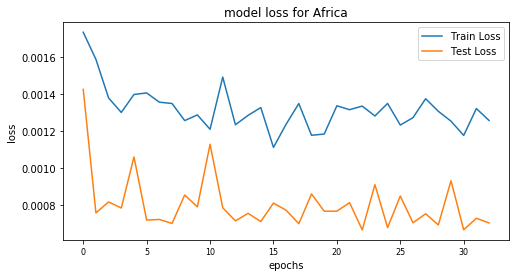

In [1243]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss for Africa')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

plt.savefig("images/lossAfrica.jpeg")

In [1196]:
train_predict

array([[-1.01663778e-02],
       [-3.19353230e-02],
       [-1.12726837e-02],
       [-1.57715622e-02],
       [-1.71338618e-02],
       [-6.58609997e-03],
       [-1.48335034e-02],
       [-1.58228856e-02],
       [-6.78217039e-03],
       [-7.75460247e-03],
       [ 3.81031283e-03],
       [ 2.34158114e-02],
       [ 1.23244552e-02],
       [ 1.57700218e-02],
       [ 7.03078136e-03],
       [ 5.22890594e-03],
       [ 1.73408110e-02],
       [ 1.56378243e-02],
       [ 8.36119987e-03],
       [ 3.02098505e-03],
       [-6.76758401e-03],
       [-4.72034700e-03],
       [-4.85876575e-03],
       [-1.25948675e-02],
       [-4.79566213e-03],
       [-6.66507520e-03],
       [-1.16018290e-02],
       [-1.31924124e-02],
       [-4.01731580e-03],
       [ 6.35095499e-03],
       [ 1.97667740e-02],
       [ 1.46499956e-02],
       [ 7.79134687e-03],
       [ 9.25481413e-03],
       [ 1.97357754e-03],
       [ 6.77323900e-03],
       [ 7.11390004e-03],
       [ 8.31936859e-03],
       [ 4.5

Text(0.5, 0, 'datapoints')

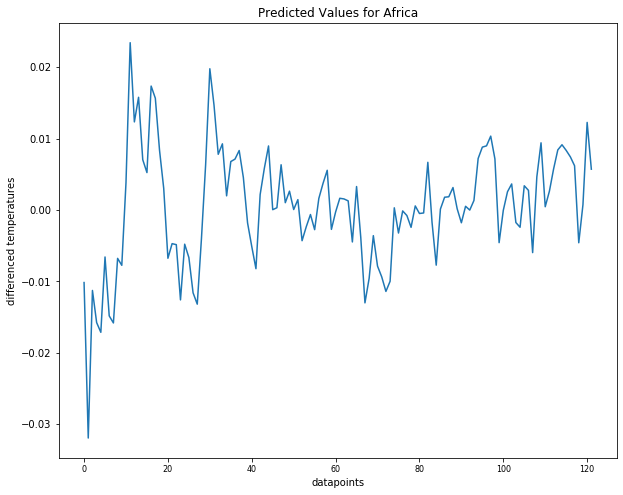

In [1197]:
predicted = np.append(train_predict,test_predict)
plt.plot(predicted)
plt.title('Predicted Values for Africa')
plt.ylabel('differenced temperatures')
plt.xlabel('datapoints')

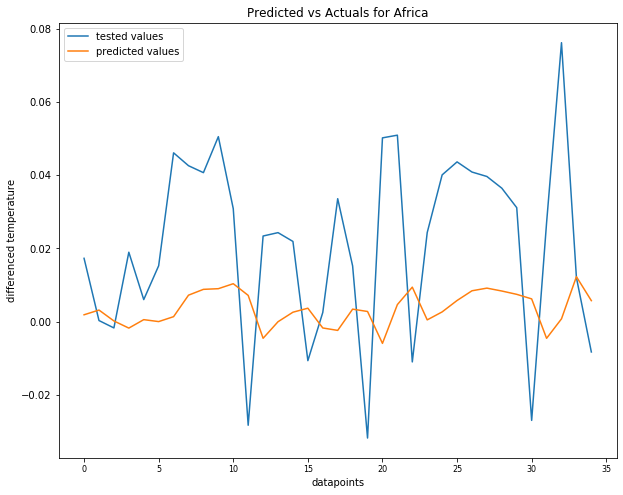

In [1198]:
plt.plot(y_test, label= 'tested values')
plt.plot(test_predict, label = 'predicted values') # needs apppending
plt.title('Predicted vs Actuals for Africa')
plt.ylabel('differenced temperature')
plt.xlabel('datapoints')
plt.legend(loc='upper left')
plt.savefig("images/AfricaLSTM.jpeg")

In [229]:
len(y_test)

37

# Asia

In [ ]:
# best and lowest RMSE found at 50N and 1000E

In [230]:
Asia_diff

dt
1871-01-01   -0.235420
1872-01-01    0.083305
1873-01-01   -0.013166
1874-01-01   -0.040503
1875-01-01    0.015976
1876-01-01    0.070836
1877-01-01    0.163399
1878-01-01    0.152133
1879-01-01   -0.175016
1880-01-01   -0.175996
1881-01-01    0.088525
1882-01-01   -0.088541
1883-01-01   -0.145807
1884-01-01   -0.339861
1885-01-01    0.242918
1886-01-01    0.167883
1887-01-01   -0.035469
1888-01-01    0.232510
1889-01-01   -0.001156
1890-01-01    0.128476
1891-01-01   -0.167017
1892-01-01   -0.034677
1893-01-01   -0.475067
1894-01-01    0.574406
1895-01-01   -0.138095
1896-01-01    0.257031
1897-01-01   -0.039641
1898-01-01    0.094895
1899-01-01    0.042232
1900-01-01   -0.011287
                ...   
1984-01-01   -0.280194
1985-01-01    0.335710
1986-01-01   -0.108333
1987-01-01    0.471353
1988-01-01   -0.153588
1989-01-01   -0.101917
1990-01-01    0.290653
1991-01-01   -0.280233
1992-01-01   -0.230443
1993-01-01    0.071746
1994-01-01    0.406746
1995-01-01   -0.141424
1996-01-

In [1244]:
trainset = Asia_diff[:'1970']

testset = Asia_diff['1971':]


#trainset=np.reshape(training, (-1, 1))
#testset=np.reshape(testing, (-1, 1))

def to_sequences(lookbacksize, obs):
    x = []
    y=[]
    for i in range (len(obs)-lookback-1):
        window=obs[i:(i+lookback)]
        post_window = obs[i+lookback]
        window = [[x] for x in window]
        x.append(window)
        y.append(post_window)
    return np.array(x), np.array(y)

lookback=5
x_train, y_train = to_sequences(lookback, trainset)
x_test, y_test = to_sequences(lookback, testset)

print('training set {}' .format(x_train.shape))
print('test set {}' .format(x_test.shape))

training set (94, 5, 1)
test set (37, 5, 1)


In [1245]:
model=Sequential()
model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor], verbose=2, epochs=1000, batch_size=5)
model.summary()

Train on 94 samples, validate on 37 samples
Epoch 1/1000
94/94 - 25s - loss: 0.0463 - val_loss: 0.0691
Epoch 2/1000
94/94 - 1s - loss: 0.0434 - val_loss: 0.0663
Epoch 3/1000
94/94 - 1s - loss: 0.0423 - val_loss: 0.0642
Epoch 4/1000
94/94 - 1s - loss: 0.0425 - val_loss: 0.0629
Epoch 5/1000
94/94 - 1s - loss: 0.0404 - val_loss: 0.0615
Epoch 6/1000
94/94 - 1s - loss: 0.0403 - val_loss: 0.0602
Epoch 7/1000
94/94 - 1s - loss: 0.0408 - val_loss: 0.0595
Epoch 8/1000
94/94 - 1s - loss: 0.0383 - val_loss: 0.0589
Epoch 9/1000
94/94 - 1s - loss: 0.0398 - val_loss: 0.0583
Epoch 10/1000
94/94 - 1s - loss: 0.0421 - val_loss: 0.0583
Epoch 11/1000
94/94 - 1s - loss: 0.0405 - val_loss: 0.0584
Epoch 12/1000
94/94 - 0s - loss: 0.0409 - val_loss: 0.0576
Epoch 13/1000
94/94 - 1s - loss: 0.0404 - val_loss: 0.0577
Epoch 14/1000
94/94 - 0s - loss: 0.0411 - val_loss: 0.0575
Epoch 15/1000
94/94 - 0s - loss: 0.0392 - val_loss: 0.0578
Epoch 16/1000
94/94 - 1s - loss: 0.0420 - val_loss: 0.0575
Epoch 17/1000
94/94 

In [1246]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
print('Train Mean Absolute Error:', mean_absolute_error(y_train[:], train_predict[:]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[:], train_predict[:])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[:], test_predict[:]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[:], test_predict[:])))

Train Mean Absolute Error: 0.15384498616991785
Train Root Mean Squared Error: 0.19557906308258047
Test Mean Absolute Error: 0.1884869308443677
Test Root Mean Squared Error: 0.2379789323892231


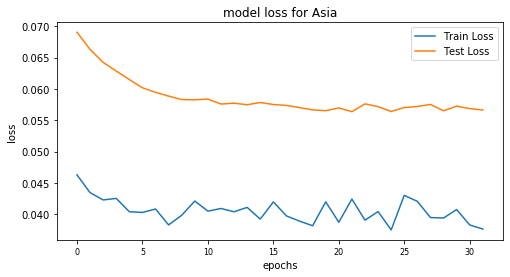

In [1247]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss for Asia')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

plt.savefig("images/Asialoss.jpeg")

Text(0.5, 0, 'datapoints')

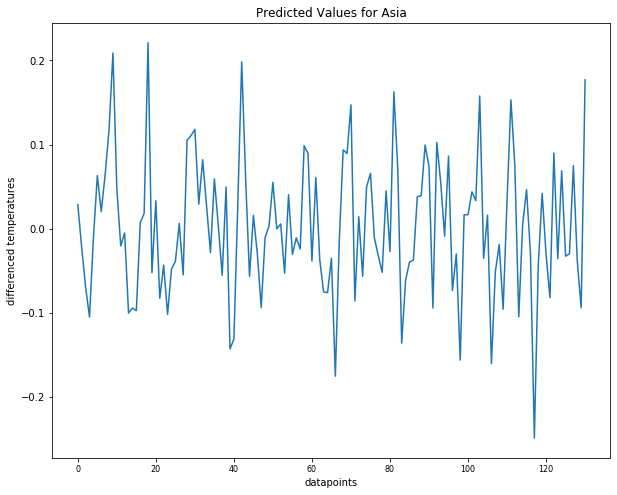

In [1248]:
predicted = np.append(train_predict,test_predict)
plt.plot(predicted)
plt.title('Predicted Values for Asia')
plt.ylabel('differenced temperatures')
plt.xlabel('datapoints')

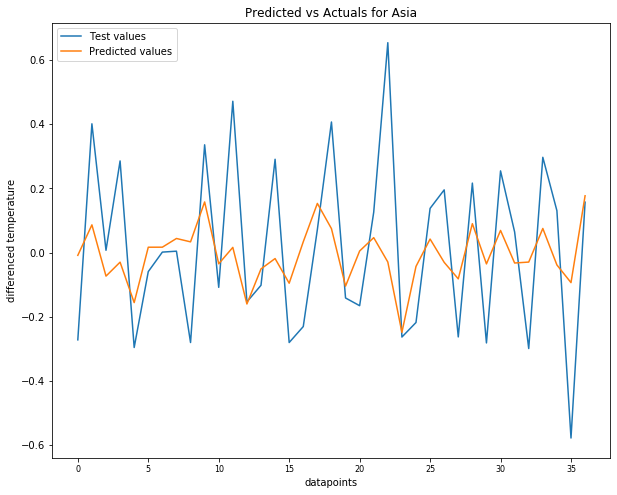

In [1249]:
plt.plot(y_test, label= 'Test values')
plt.plot(test_predict, label= 'Predicted values')
plt.title('Predicted vs Actuals for Asia')
plt.ylabel('differenced temperature')
plt.xlabel('datapoints')
plt.legend(loc='upper left')
plt.savefig("images/AsiaLSTM.jpeg")

# Europe

In [ ]:
# best and lowest RMSE found at 200N and 1000E

In [237]:
Euro_diff

dt
1871-01-01   -0.253547
1872-01-01    1.577343
1873-01-01   -0.419497
1874-01-01   -0.107823
1875-01-01   -0.893444
1876-01-01    0.649921
1877-01-01    0.063552
1878-01-01    0.494663
1879-01-01   -1.153494
1880-01-01    0.586659
1881-01-01   -0.483294
1882-01-01    0.893507
1883-01-01   -0.534587
1884-01-01    0.170697
1885-01-01   -0.172779
1886-01-01    0.125484
1887-01-01   -0.211872
1888-01-01   -0.569061
1889-01-01    0.409860
1890-01-01    0.205796
1891-01-01   -0.162109
1892-01-01    0.074088
1893-01-01    0.178314
1894-01-01    0.153389
1895-01-01   -0.230964
1896-01-01   -0.093313
1897-01-01    0.507933
1898-01-01    0.187772
1899-01-01    0.005360
1900-01-01   -0.164220
                ...   
1984-01-01   -0.859715
1985-01-01   -0.535695
1986-01-01    0.431598
1987-01-01   -0.431712
1988-01-01    1.099513
1989-01-01    0.743373
1990-01-01   -0.013327
1991-01-01   -0.882710
1992-01-01    0.323506
1993-01-01   -0.640082
1994-01-01    0.888213
1995-01-01    0.110327
1996-01-

In [1250]:
trainset = Euro_diff[:'1970']

testset = Euro_diff['1971':]


#trainset=np.reshape(training, (-1, 1))
#testset=np.reshape(testing, (-1, 1))

def to_sequences(lookbacksize, obs):
    x = []
    y=[]
    for i in range (len(obs)-lookback-1):
        window=obs[i:(i+lookback)]
        post_window = obs[i+lookback]
        window = [[x] for x in window]
        x.append(window)
        y.append(post_window)
    return np.array(x), np.array(y)

lookback=5
x_train, y_train = to_sequences(lookback, trainset)
x_test, y_test = to_sequences(lookback, testset)

print('training set {}' .format(x_train.shape))
print('test set {}' .format(x_test.shape))

training set (94, 5, 1)
test set (37, 5, 1)


In [1251]:
model=Sequential()
model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor], verbose=2, epochs=1000, batch_size=5)
model.summary()

Train on 94 samples, validate on 37 samples
Epoch 1/1000
94/94 - 32s - loss: 0.3205 - val_loss: 0.3264
Epoch 2/1000
94/94 - 1s - loss: 0.2985 - val_loss: 0.3108
Epoch 3/1000
94/94 - 2s - loss: 0.2913 - val_loss: 0.2927
Epoch 4/1000
94/94 - 1s - loss: 0.2783 - val_loss: 0.2770
Epoch 5/1000
94/94 - 2s - loss: 0.2549 - val_loss: 0.2752
Epoch 6/1000
94/94 - 2s - loss: 0.2509 - val_loss: 0.2624
Epoch 7/1000
94/94 - 2s - loss: 0.2401 - val_loss: 0.2658
Epoch 8/1000
94/94 - 2s - loss: 0.2341 - val_loss: 0.2555
Epoch 9/1000
94/94 - 2s - loss: 0.2308 - val_loss: 0.2620
Epoch 10/1000
94/94 - 2s - loss: 0.2200 - val_loss: 0.2477
Epoch 11/1000
94/94 - 2s - loss: 0.2217 - val_loss: 0.2434
Epoch 12/1000
94/94 - 2s - loss: 0.2377 - val_loss: 0.2392
Epoch 13/1000
94/94 - 2s - loss: 0.2377 - val_loss: 0.2549
Epoch 14/1000
94/94 - 2s - loss: 0.2361 - val_loss: 0.2431
Epoch 15/1000
94/94 - 2s - loss: 0.2271 - val_loss: 0.2492
Epoch 16/1000
94/94 - 2s - loss: 0.2208 - val_loss: 0.2477
Epoch 17/1000
94/94 

In [1252]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
print('Train Mean Absolute Error:', mean_absolute_error(y_train[:], train_predict[:]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[:], train_predict[:])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[:], test_predict[:]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[:], test_predict[:])))

Train Mean Absolute Error: 0.3266713161874083
Train Root Mean Squared Error: 0.41349839862475884
Test Mean Absolute Error: 0.41654110850249776
Test Root Mean Squared Error: 0.49901997514596136


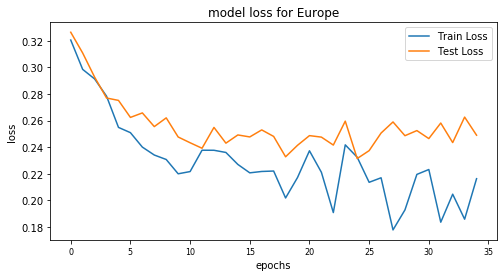

In [1253]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss for Europe')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.savefig("images/Euroloss.jpeg")

Text(0.5, 0, 'datapoints')

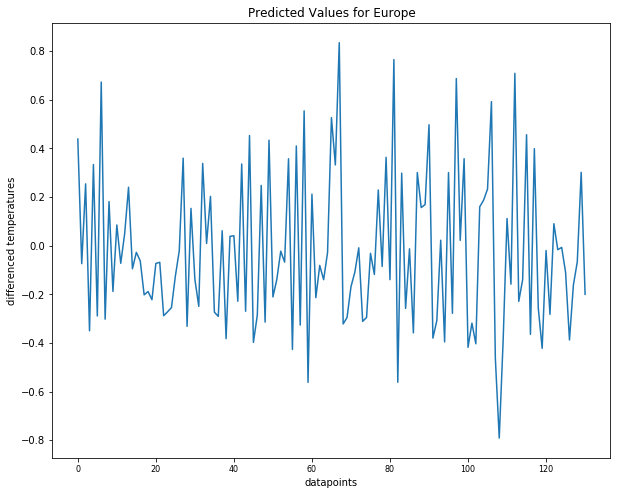

In [1254]:
predicted = np.append(train_predict,test_predict)
plt.plot(predicted)
plt.title('Predicted Values for Europe')
plt.ylabel('differenced temperatures')
plt.xlabel('datapoints')

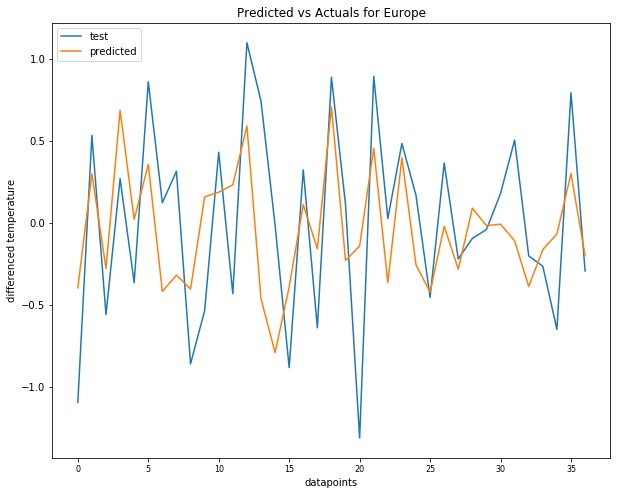

In [1255]:
plt.plot(y_test, label='test')
plt.plot(test_predict, label='predicted')
plt.title('Predicted vs Actuals for Europe')
plt.ylabel('differenced temperature')
plt.xlabel('datapoints')
plt.legend(loc='upper left')
plt.savefig("images/EuroLSTM.jpeg")

# Oceania

In [549]:
# # best and lowest RMSE found at 50N with 500 E

In [244]:
Oceania_diff

dt
1871-01-01    0.034662
1872-01-01    0.235186
1873-01-01   -0.131030
1874-01-01   -0.162034
1875-01-01    0.136886
1876-01-01    0.381505
1877-01-01   -0.188620
1878-01-01    0.228453
1879-01-01   -0.484862
1880-01-01    0.394938
1881-01-01   -0.103891
1882-01-01    0.366003
1883-01-01   -0.263955
1884-01-01   -0.169066
1885-01-01    0.171990
1886-01-01    0.081507
1887-01-01   -0.005052
1888-01-01   -0.109618
1889-01-01    0.489139
1890-01-01   -0.219608
1891-01-01   -0.254726
1892-01-01    0.243872
1893-01-01    0.135351
1894-01-01   -0.152660
1895-01-01   -0.090031
1896-01-01    0.006024
1897-01-01    0.169684
1898-01-01   -0.018104
1899-01-01   -0.201253
1900-01-01    0.200493
                ...   
1984-01-01   -0.131434
1985-01-01    0.147653
1986-01-01   -0.074108
1987-01-01    0.181330
1988-01-01    0.437767
1989-01-01   -0.363049
1990-01-01    0.167997
1991-01-01   -0.244514
1992-01-01   -0.521309
1993-01-01    0.252028
1994-01-01    0.067090
1995-01-01    0.112701
1996-01-

In [1317]:
trainset = Oceania_diff[:'1970']

testset = Oceania_diff['1971':]


#trainset=np.reshape(training, (-1, 1))
#testset=np.reshape(testing, (-1, 1))

def to_sequences(lookbacksize, obs):
    x = []
    y=[]
    for i in range (len(obs)-lookback-1):
        window=obs[i:(i+lookback)]
        post_window = obs[i+lookback]
        window = [[x] for x in window]
        x.append(window)
        y.append(post_window)
    return np.array(x), np.array(y)

lookback=5
x_train, y_train = to_sequences(lookback, trainset)
x_test, y_test = to_sequences(lookback, testset)

print('training set {}' .format(x_train.shape))
print('test set {}' .format(x_test.shape))

training set (94, 5, 1)
test set (37, 5, 1)


In [1318]:
model=Sequential()
model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor], verbose=2, epochs=500, batch_size=5)
model.summary()

Train on 94 samples, validate on 37 samples
Epoch 1/500
94/94 - 34s - loss: 0.0645 - val_loss: 0.0772
Epoch 2/500
94/94 - 1s - loss: 0.0610 - val_loss: 0.0750
Epoch 3/500
94/94 - 1s - loss: 0.0585 - val_loss: 0.0729
Epoch 4/500
94/94 - 1s - loss: 0.0559 - val_loss: 0.0708
Epoch 5/500
94/94 - 1s - loss: 0.0538 - val_loss: 0.0692
Epoch 6/500
94/94 - 1s - loss: 0.0538 - val_loss: 0.0680
Epoch 7/500
94/94 - 0s - loss: 0.0498 - val_loss: 0.0670
Epoch 8/500
94/94 - 0s - loss: 0.0530 - val_loss: 0.0659
Epoch 9/500
94/94 - 0s - loss: 0.0459 - val_loss: 0.0656
Epoch 10/500
94/94 - 0s - loss: 0.0505 - val_loss: 0.0656
Epoch 11/500
94/94 - 0s - loss: 0.0455 - val_loss: 0.0658
Epoch 12/500
94/94 - 1s - loss: 0.0462 - val_loss: 0.0653
Epoch 13/500
94/94 - 1s - loss: 0.0489 - val_loss: 0.0652
Epoch 14/500
94/94 - 1s - loss: 0.0466 - val_loss: 0.0656
Epoch 15/500
94/94 - 1s - loss: 0.0465 - val_loss: 0.0653
Epoch 16/500
94/94 - 1s - loss: 0.0412 - val_loss: 0.0661
Epoch 17/500
94/94 - 1s - loss: 0.04

In [1319]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
print('Train Mean Absolute Error:', mean_absolute_error(y_train[:], train_predict[:]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[:], train_predict[:])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[:], test_predict[:]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[:], test_predict[:])))

Train Mean Absolute Error: 0.15547432080217882
Train Root Mean Squared Error: 0.19802242360550998
Test Mean Absolute Error: 0.20064906270126248
Test Root Mean Squared Error: 0.2596598745448824


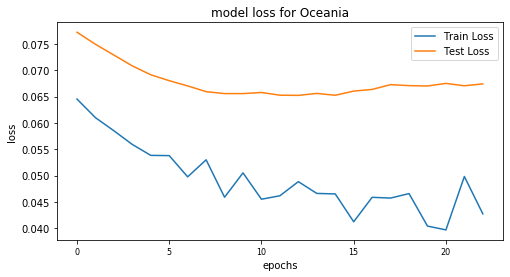

In [1320]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss for Oceania')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

plt.savefig("images/oceanialoss.jpeg");

Text(0.5, 0, 'datapoints')

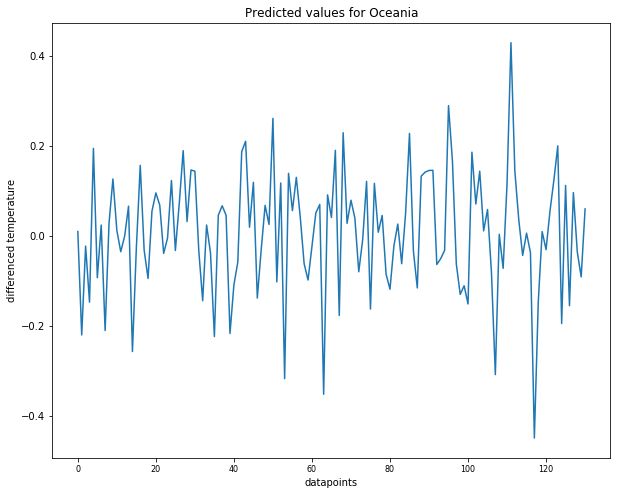

In [1260]:
predicted = np.append(train_predict,test_predict)
plt.plot(predicted)
plt.title('Predicted values for Oceania')
plt.ylabel('differenced temperature')
plt.xlabel('datapoints')


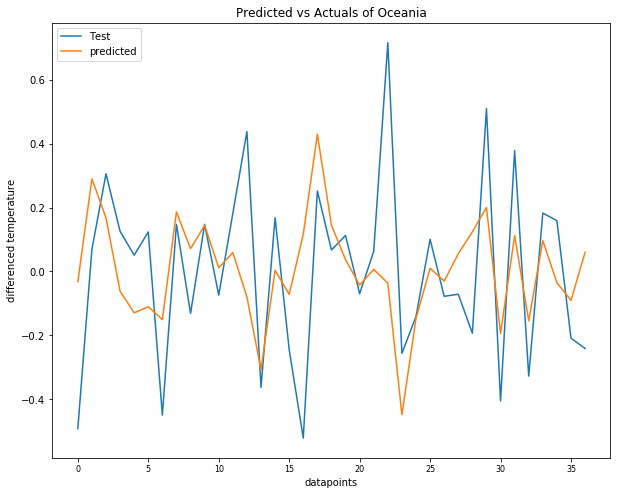

In [1261]:
plt.plot(y_test, label='Test')
plt.plot(test_predict, label='predicted')
plt.title('Predicted vs Actuals of Oceania')
plt.ylabel('differenced temperature')
plt.xlabel('datapoints')
plt.legend(loc='upper left')
plt.savefig("images/oceanialstm.jpeg")

# North America 

In [542]:
# best and lowest RMSE found at 50 N and 500 E

In [251]:
North_diff

dt
1871-01-01   -0.012548
1872-01-01   -0.484946
1873-01-01    0.010198
1874-01-01    0.332836
1875-01-01   -0.473841
1876-01-01    0.302424
1877-01-01    0.453089
1878-01-01    0.162639
1879-01-01   -0.361618
1880-01-01   -0.267216
1881-01-01    0.342077
1882-01-01   -0.256478
1883-01-01   -0.257158
1884-01-01    0.014169
1885-01-01   -0.013685
1886-01-01    0.051561
1887-01-01    0.041458
1888-01-01   -0.075882
1889-01-01    0.469332
1890-01-01   -0.078058
1891-01-01   -0.163472
1892-01-01   -0.206710
1893-01-01   -0.107572
1894-01-01    0.426766
1895-01-01   -0.366111
1896-01-01    0.646010
1897-01-01   -0.162307
1898-01-01   -0.128420
1899-01-01   -0.120826
1900-01-01    0.505322
                ...   
1984-01-01    0.005766
1985-01-01   -0.211256
1986-01-01    0.506677
1987-01-01   -0.072240
1988-01-01   -0.139108
1989-01-01   -0.194770
1990-01-01    0.659585
1991-01-01   -0.104931
1992-01-01   -0.369525
1993-01-01   -0.117879
1994-01-01    0.341962
1995-01-01    0.083035
1996-01-

In [1262]:
trainset = North_diff[:'1970']

testset = North_diff['1971':]


#trainset=np.reshape(training, (-1, 1))
#testset=np.reshape(testing, (-1, 1))

def to_sequences(lookbacksize, obs):
    x = []
    y=[]
    for i in range (len(obs)-lookback-1):
        window=obs[i:(i+lookback)]
        post_window = obs[i+lookback]
        window = [[x] for x in window]
        x.append(window)
        y.append(post_window)
    return np.array(x), np.array(y)

lookback=5
x_train, y_train = to_sequences(lookback, trainset)
x_test, y_test = to_sequences(lookback, testset)

print('training set {}' .format(x_train.shape))
print('test set {}' .format(x_test.shape))

training set (94, 5, 1)
test set (37, 5, 1)


In [1263]:
model=Sequential()
model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor], verbose=2, epochs=500, batch_size=5)
model.summary()

Train on 94 samples, validate on 37 samples
Epoch 1/500
94/94 - 31s - loss: 0.0959 - val_loss: 0.0889
Epoch 2/500
94/94 - 1s - loss: 0.0917 - val_loss: 0.0855
Epoch 3/500
94/94 - 1s - loss: 0.0865 - val_loss: 0.0835
Epoch 4/500
94/94 - 1s - loss: 0.0850 - val_loss: 0.0807
Epoch 5/500
94/94 - 1s - loss: 0.0814 - val_loss: 0.0774
Epoch 6/500
94/94 - 1s - loss: 0.0808 - val_loss: 0.0754
Epoch 7/500
94/94 - 1s - loss: 0.0776 - val_loss: 0.0763
Epoch 8/500
94/94 - 1s - loss: 0.0760 - val_loss: 0.0730
Epoch 9/500
94/94 - 1s - loss: 0.0748 - val_loss: 0.0711
Epoch 10/500
94/94 - 1s - loss: 0.0716 - val_loss: 0.0710
Epoch 11/500
94/94 - 1s - loss: 0.0690 - val_loss: 0.0698
Epoch 12/500
94/94 - 1s - loss: 0.0684 - val_loss: 0.0688
Epoch 13/500
94/94 - 1s - loss: 0.0660 - val_loss: 0.0682
Epoch 14/500
94/94 - 1s - loss: 0.0670 - val_loss: 0.0673
Epoch 15/500
94/94 - 1s - loss: 0.0732 - val_loss: 0.0669
Epoch 16/500
94/94 - 1s - loss: 0.0781 - val_loss: 0.0687
Epoch 17/500
94/94 - 1s - loss: 0.07

In [1264]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
print('Train Mean Absolute Error:', mean_absolute_error(y_train[:], train_predict[:]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[:], train_predict[:])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[:], test_predict[:]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[:], test_predict[:])))

Train Mean Absolute Error: 0.19843971181105974
Train Root Mean Squared Error: 0.25295139923078974
Test Mean Absolute Error: 0.20748910559152245
Test Root Mean Squared Error: 0.25803805979644534


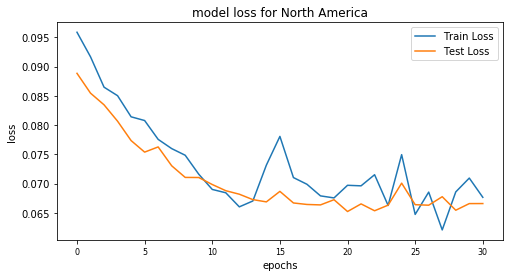

In [1266]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss for North America')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

plt.savefig("images/Northloss.jpeg")

Text(0.5, 0, 'datapoints')

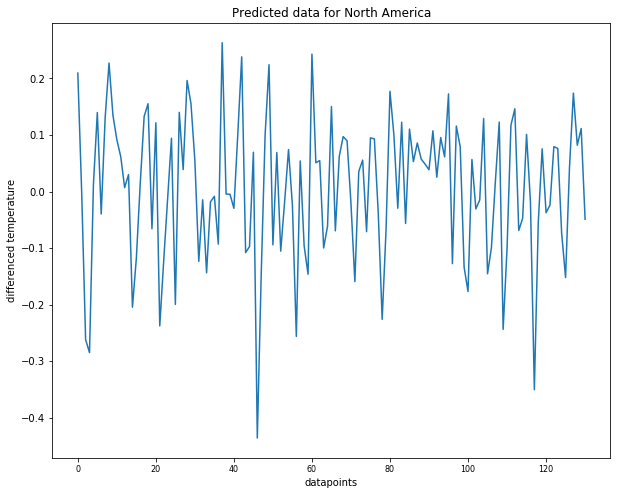

In [1267]:
predicted = np.append(train_predict,test_predict)
plt.plot(predicted)
plt.title('Predicted data for North America')
plt.ylabel('differenced temperature')
plt.xlabel('datapoints')


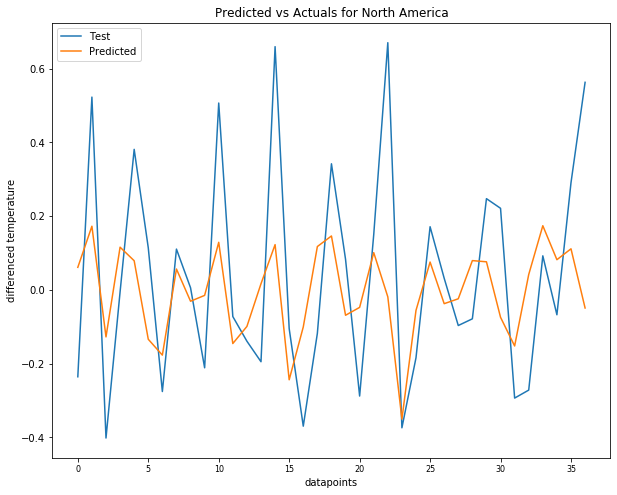

In [1269]:
plt.plot(y_test, label='Test')
plt.plot(test_predict, label='Predicted')
plt.title('Predicted vs Actuals for North America')
plt.ylabel('differenced temperature')
plt.xlabel('datapoints')
plt.legend(loc='upper left')
plt.savefig("images/NorthLSTM.jpeg")

# South America 

In [1270]:
# best and lowest RMSE found at 200 N with 1000E

In [1271]:
trainset = South_diff[:'1970']

testset = South_diff['1971':]


#trainset=np.reshape(training, (-1, 1))
#testset=np.reshape(testing, (-1, 1))

def to_sequences(lookbacksize, obs):
    x = []
    y=[]
    for i in range (len(obs)-lookback-1):
        window=obs[i:(i+lookback)]
        post_window = obs[i+lookback]
        window = [[x] for x in window]
        x.append(window)
        y.append(post_window)
    return np.array(x), np.array(y)

lookback=5
x_train, y_train = to_sequences(lookback, trainset)
x_test, y_test = to_sequences(lookback, testset)

print('training set {}' .format(x_train.shape))
print('test set {}' .format(x_test.shape))

training set (94, 5, 1)
test set (37, 5, 1)


In [1272]:
model=Sequential()
model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor], verbose=2, epochs=1000, batch_size=5)
model.summary()

Train on 94 samples, validate on 37 samples
Epoch 1/1000
94/94 - 29s - loss: 0.0921 - val_loss: 0.0808
Epoch 2/1000
94/94 - 1s - loss: 0.0853 - val_loss: 0.0775
Epoch 3/1000
94/94 - 1s - loss: 0.0806 - val_loss: 0.0704
Epoch 4/1000
94/94 - 2s - loss: 0.0839 - val_loss: 0.0680
Epoch 5/1000
94/94 - 2s - loss: 0.0809 - val_loss: 0.0690
Epoch 6/1000
94/94 - 2s - loss: 0.0776 - val_loss: 0.0698
Epoch 7/1000
94/94 - 2s - loss: 0.0793 - val_loss: 0.0690
Epoch 8/1000
94/94 - 1s - loss: 0.0817 - val_loss: 0.0669
Epoch 9/1000
94/94 - 2s - loss: 0.0798 - val_loss: 0.0670
Epoch 10/1000
94/94 - 2s - loss: 0.0874 - val_loss: 0.0665
Epoch 11/1000
94/94 - 2s - loss: 0.0776 - val_loss: 0.0640
Epoch 12/1000
94/94 - 2s - loss: 0.0748 - val_loss: 0.0640
Epoch 13/1000
94/94 - 2s - loss: 0.0767 - val_loss: 0.0652
Epoch 14/1000
94/94 - 2s - loss: 0.0765 - val_loss: 0.0624
Epoch 15/1000
94/94 - 1s - loss: 0.0757 - val_loss: 0.0602
Epoch 16/1000
94/94 - 1s - loss: 0.0799 - val_loss: 0.0636
Epoch 17/1000
94/94 

In [1273]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
print('Train Mean Absolute Error:', mean_absolute_error(y_train[:], train_predict[:]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[:], train_predict[:])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[:], test_predict[:]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[:], test_predict[:])))

Train Mean Absolute Error: 0.2250588752872535
Train Root Mean Squared Error: 0.26736130506980976
Test Mean Absolute Error: 0.20490522662109165
Test Root Mean Squared Error: 0.2474819490069344


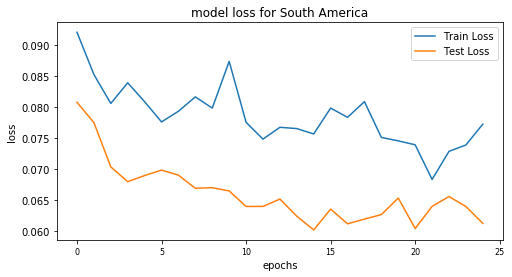

In [1274]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss for South America')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

plt.savefig("images/SOUTHloss.jpeg");

Text(0.5, 0, 'datapoints')

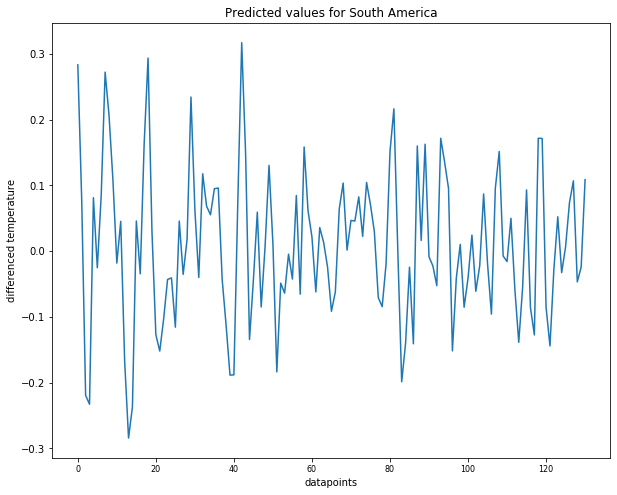

In [1275]:
predicted = np.append(train_predict,test_predict)
plt.plot(predicted)
plt.title('Predicted values for South America')
plt.ylabel('differenced temperature')
plt.xlabel('datapoints')

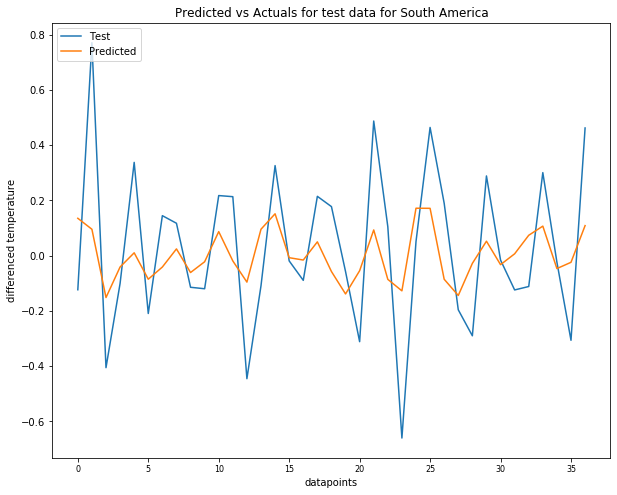

In [1276]:
plt.plot(y_test, label = 'Test')
plt.plot(test_predict, label = 'Predicted')
plt.title('Predicted vs Actuals for test data for South America')
plt.ylabel('differenced temperature')
plt.xlabel('datapoints')
plt.legend(loc='upper left')
plt.savefig("images/SOUTHlstm.jpeg")

### Finally the found and trained RMSEs could be plotted 


In [1231]:
results = {'LSTM':[0.0261268724804941, 0.2328611979162056, 0.489619810813572, 0.258611449489806, 0.255818607589263, 0.247325094348101],
           'ARIMA':[0.029,0.27,0.525,0.248,0.282,0.268],
           'MLR': [0.29345387, 0.279189233,0.425709444, 0.26441528, 0.334876623, 0.26412479]}
rf=pd.DataFrame(results, index=['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America'])
rf

LSTM  ARIMA       MLR
Africa         0.026127  0.029  0.293454
Asia           0.232861  0.270  0.279189
Europe         0.489620  0.525  0.425709
Oceania        0.258611  0.248  0.264415
North America  0.255819  0.282  0.334877
South America  0.247325  0.268  0.264125

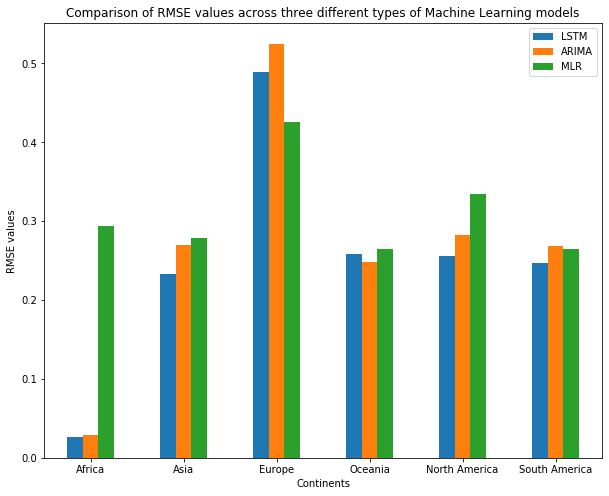

In [802]:
ax =rf.plot.bar(rot=0)
plt.rcParams['figure.figsize']=(10,8)
plt.xlabel('Continents')
plt.ylabel('RMSE values')
plt.title('Comparison of RMSE values across three different types of Machine Learning models')
plt.savefig("images/RMSEcomparison.jpeg")

### Machine properties for tests run

In [1424]:
 import platform
platform.machine()


'x86_64'

In [1425]:
platform.version()

'Darwin Kernel Version 18.6.0: Thu Apr 25 23:16:27 PDT 2019; root:xnu-4903.261.4~2/RELEASE_X86_64'

In [1426]:
platform.platform()



'Darwin-18.6.0-x86_64-i386-64bit'

In [1427]:
platform.uname()

uname_result(system='Darwin', node='Nikhils-MacBook-Air.local', release='18.6.0', version='Darwin Kernel Version 18.6.0: Thu Apr 25 23:16:27 PDT 2019; root:xnu-4903.261.4~2/RELEASE_X86_64', machine='x86_64', processor='i386')

In [1428]:


platform.processor()

'i386'

## Concepts for codes and original processes additionally referenced within the Bibliography 


Brownlee, J. (2019) How to Backtest Machine Learning Models for Time Series Forecasting. Machine Learning Mastery. [Online] [Accessed on 1st September 2019] 
https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

Brownlee, J. (2019) How to Develop LSTM Models for Time Series Forecasting. Machine Learning Mastery. [Online] [Accessed on 10th September 2019] 
https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

Brownlee, J. (2019) How to Diagnose Overfitting and Underfitting of LSTM Models. Machine Learning Mastery. [Online] [Accessed on 15th September 2019] https://machinelearningmastery.com/diagnose-overfitting-underfitting-lstm-models/

Brownlee, J. (2019) How to Tune ARIMA Parameters in Python. Machine Learning Mastery. [Online] [Accessed 8th September 2019] https://machinelearningmastery.com/tune-arima-parameters-python/

Brownlee, J. (2019) How to Tune LSTM Hyperparameters with Keras for Time Series Forecasting. Machine Learning Mastery. [Online] [Accessed 15th September 2019] 
https://machinelearningmastery.com/tune-lstm-hyperparameters-keras-time-series-forecasting/

Brownlee, J. (2019) Multivariate Time Series Forecasting with LSTMs in Keras. Machine Learning Mastery. [Online] [Accessed on 14th September 2019] 
https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/




##


Colah (2015) Understanding LSTM Networks. GithubPages. [Online] [Accessed 9th September 2019] https://colah.github.io/posts/2015-08-Understanding-LSTMs/

Chatterjee, S. (2019) lstm time series. Towards Data Science. Medium. [Online] [Accessed on 7th September 2019] https://medium.com/search?q=lstm%20time%20series

Jain, A. (2016) A comphrensive beginner’s guide to create Time Series Forecast (with Codes in Python and R). Analytics Vidhya. [Online] [Accessed 1st September 2019] 
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

Keras Documentation (2019) Getting started with the Keras Sequential Model. [Online] [Accessed on 14th September 2019] https://keras.io/getting-started/sequential-model-guide/


Khandelwal, R. (2019) Multivariate Time Series using RNN with Keras. Medium. [Online] [Accessed on 10th September 2019] 
https://medium.com/datadriveninvestor/multivariate-time-series-using-rnn-with-keras-7f78f4488679

Kompella, R. (2018) Using LSTMs to forecast time-series. Towards Data Science. Medium. [Online] [Accessed on 9th September 2019] 
 	https://towardsdatascience.com/using-lstms-to-forecast-time-series-4ab688386b1f


Li, S. (2018) An End-to-End Project on Time Series Analysis and Forecasting with Python. Towards Data Science. Medium. [Online] [Accessed 29th August 2019]
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b


Li, S. (2019) Time Series Analysis, Visualization & Forecasting with LSTM. Towards Data Science. Medium. [Online] [Accessed 8th September 2019]
https://towardsdatascience.com/time-series-analysis-visualization-forecasting-with-lstm-77a905180eba

Prabhakaran, S. (2019) ARIMA Model – Complete Guide to Time Series Forecasting in Python. Machine Learning Plus. [Online] [Accessed on 6th September 2019] 
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

Regression Analysis in NCSS (2019) Multiple Regression. NCSS. [Online] [Accessed on 2nd September 2019] http://ncss.wpengine.netdna-cdn.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Multiple_Regression.pdf

Sangarshanan (2018) Time series Forecasting – ARIMA models. Towards Data Science. [Online] [Accessed on 8th September 2019] https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06

Sergeev, D. (2018) Open Machine Learning Course. Topic 9. Part 1. Time series analysis in Python. Medium. [Online] [Accessed 30th August 2019]
https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3

Sigma Coding (2019) Multiple Regression Analysis in Python | Part 5. Youtube. [Online] [Accessed 1st September 2019] https://www.youtube.com/watch?v=j1sjqEStECQ&t=133s


Singh, A, (2018) A Multivariate Time Series Guide to Forecasting and Modeling (with Python codes). Analytics Vidhya. [Online] [Accessed on 2nd September 2019]  https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

Srivastava, P. (2017) Essentials of Deep Learning: Introduction to Long Short Term Memory. Analytics Vidhya. [Online] [Accessed on 7th September 2019]
https://www.analyticsvidhya.com/blog/2017/12/fundamentals-of-deep-learning-introduction-to-lstm/

XLSTAT (2011) Ordinary Least Squares regression or Linear regression. Youtube.  [Online] [Accessed 3rd September 2019] https://www.youtube.com/watch?v=VZkXjh0m1Rg
![image.png](attachment:image.png)